# Business Problem
How to increase profit for the next 6 month?


# Import Libraries

In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
from google.colab import files
# files.download('.csv')

import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler    # Transform features by scaling each feature to a given range  #Sensitive with outlier, scaling using Min (0) and Max (1), Result between range 0 and 1
from sklearn.preprocessing import StandardScaler  # Transform features by scaling each feature to a given range  #Standard deviation, count range from mean to standard deviation
from sklearn.preprocessing import RobustScaler    # Transform features by scaling each feature to a given range  #If there is any outlier we can use RobustScaler
from sklearn import cluster                       # library that contains algorithms for segmenting
# from silhoutte import silhoutte_analysis        # used to study the separation distance between the resulting clusters
pd.set_option('display.float_format', lambda x: '%.2f' % x)   # 2 decimal after komma

In [ ]:
pd.set_option('max_columns',None)

# Import Dataset

In [ ]:
# Input DataCoSupplyChainDataset Url;
dataset_url = 'https://docs.google.com/spreadsheets/d/1MPacDfJ8Ly09T7ZZ1Y0-_jCAgnpy0tqSj-mCcqPd5ew/edit#gid=159080492'
dataset_url_trf = dataset_url.replace('/edit#gid=', '/export?format=csv&gid=')
# Load DataCoSupplyChainDataset
df_dataset = pd.read_csv(dataset_url_trf)
# To get the DataCoSupplyChainDataset Info
df_ori = df_dataset.copy()
df_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Data Cleaning

## Dataset Data

### Removing Irrelevant Value

In [ ]:
# drop column that doesnt have value
df_dataset.drop(['Late_delivery_risk','Category Id', 'Customer Email','Customer Fname','Customer Password','Customer Lname','Customer Street','Department Id',
                 'Latitude','Longitude','Order Item Cardprod Id','Order Customer Id','Product Card Id','Product Category Id','Product Status','Product Image',], 
                axis=1,inplace = True)

### Handling Missing Values

In [ ]:
# to check missing values in dataset
df_dataset.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Id                           0
Customer Segment                      0
Customer State                        0
Customer Zipcode                      3
Department Name                       0
Market                                0
Order City                            0
Order Country                         0
order date (DateOrders)               0
Order Id                              0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0


In [ ]:
# drop column that doesnt have value
df_dataset.drop(['Customer Zipcode','Order Zipcode', 'Product Description'], axis=1,inplace = True)
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Id                    180519 non-null  int64  
 10  Customer Segment               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Department Name               

### Remove Duplicates Values

In [ ]:
# to check duplicated data in dataset
df_dataset.duplicated().sum()

0

In [ ]:
# To get the dataset Info
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Id                    180519 non-null  int64  
 10  Customer Segment               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Department Name               

### Convert Data Types

In [ ]:
# Convert data type from data frame 

# Convert id colomn from Int to String
df_dataset[['Customer Id','Order Id','Order Item Id']] = df_dataset[['Customer Id','Order Id','Order Item Id']].astype(str) 

df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Id                    180519 non-null  object 
 10  Customer Segment               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Department Name               

In [ ]:
df_dataset.rename(columns = {'Days for shipping (real)':'Days for shipping','Days for shipment (scheduled)':'Days for shipment',
                             'order date (DateOrders)':'order date','shipping date (DateOrders)':'shipping date' }, inplace = True)
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Type                      180519 non-null  object 
 1   Days for shipping         180519 non-null  int64  
 2   Days for shipment         180519 non-null  int64  
 3   Benefit per order         180519 non-null  float64
 4   Sales per customer        180519 non-null  float64
 5   Delivery Status           180519 non-null  object 
 6   Category Name             180519 non-null  object 
 7   Customer City             180519 non-null  object 
 8   Customer Country          180519 non-null  object 
 9   Customer Id               180519 non-null  object 
 10  Customer Segment          180519 non-null  object 
 11  Customer State            180519 non-null  object 
 12  Department Name           180519 non-null  object 
 13  Market                    180519 non-null  o

In [ ]:
 # Convert date colomn to datetime
df_dataset[['order date','shipping date']] = df_dataset[['order date','shipping date']].apply(pd.to_datetime)

df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Type                      180519 non-null  object        
 1   Days for shipping         180519 non-null  int64         
 2   Days for shipment         180519 non-null  int64         
 3   Benefit per order         180519 non-null  float64       
 4   Sales per customer        180519 non-null  float64       
 5   Delivery Status           180519 non-null  object        
 6   Category Name             180519 non-null  object        
 7   Customer City             180519 non-null  object        
 8   Customer Country          180519 non-null  object        
 9   Customer Id               180519 non-null  object        
 10  Customer Segment          180519 non-null  object        
 11  Customer State            180519 non-null  object        
 12  De

In [ ]:
df_dataset['year'] = df_dataset['order date'].apply(lambda x: str(x)[:4])

In [ ]:
df_dataset['month'] = df_dataset['order date'].apply(lambda x: str(x)[:7])

In [ ]:
df_dataset['date'] = df_dataset['order date'].apply(lambda x: str(x)[:10])

### String Manipulation

**Payment type Column**

In [ ]:
# to payment type and its counts
df_dataset['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [ ]:
grafik_type2 = df_dataset.groupby(['year','month','date','Type'])['Order Id'].count().reset_index()
grafik_type2.head()

year    month        date      Type  Order Id
0  2015  2015-01  2015-01-01      CASH        34
1  2015  2015-01  2015-01-01     DEBIT        42
2  2015  2015-01  2015-01-01   PAYMENT        52
3  2015  2015-01  2015-01-01  TRANSFER        40
4  2015  2015-01  2015-01-02      CASH        14

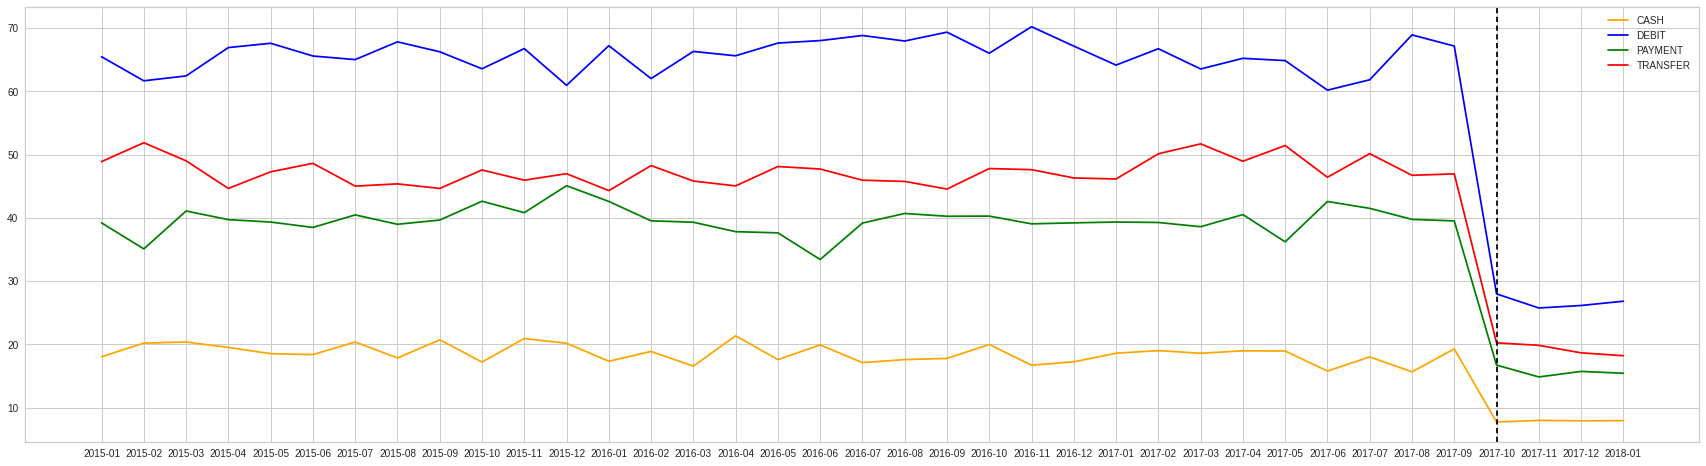

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_type2[(grafik_type2['Type']=='CASH')].groupby(['month']).mean().reset_index()['month'],
         grafik_type2[(grafik_type2['Type']=='CASH')].groupby(['month']).mean().reset_index()['Order Id'],
         label='CASH', color = 'orange')
plt.plot(grafik_type2[(grafik_type2['Type']=='DEBIT')].groupby(['month']).mean().reset_index()['month'],
         grafik_type2[(grafik_type2['Type']=='DEBIT')].groupby(['month']).mean().reset_index()['Order Id'],
         label='DEBIT', color = 'Blue')
plt.plot(grafik_type2[(grafik_type2['Type']=='PAYMENT')].groupby(['month']).mean().reset_index()['month'],
         grafik_type2[(grafik_type2['Type']=='PAYMENT')].groupby(['month']).mean().reset_index()['Order Id'],
         label='PAYMENT', color = 'green')
plt.plot(grafik_type2[(grafik_type2['Type']=='TRANSFER')].groupby(['month']).mean().reset_index()['month'],
         grafik_type2[(grafik_type2['Type']=='TRANSFER')].groupby(['month']).mean().reset_index()['Order Id'],
         label='TRANSFER', color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

**Category Name Column**

In [ ]:
# to Category Name and its counts
df_dataset['Category Name'].value_counts().head(5)

## line chart top 5 per tahun

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Name: Category Name, dtype: int64

In [ ]:
grafik_cn2 = df_dataset.groupby(['year','month','date','Category Name'])['Order Id'].count().reset_index()
grafik_cn2.head()

year    month        date        Category Name  Order Id
0  2015  2015-01  2015-01-01          Accessories         4
1  2015  2015-01  2015-01-01  Baseball & Softball         1
2  2015  2015-01  2015-01-01     Camping & Hiking        20
3  2015  2015-01  2015-01-01     Cardio Equipment         9
4  2015  2015-01  2015-01-01               Cleats        25

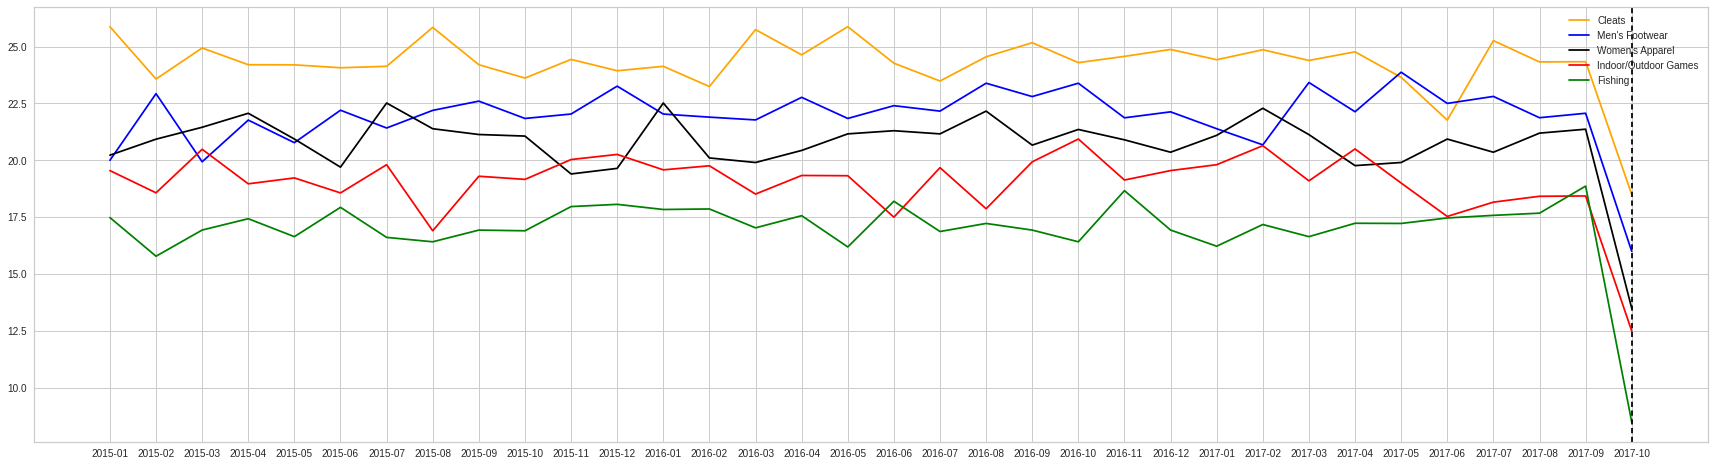

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_cn2[(grafik_cn2['Category Name']=='Cleats')].groupby(['month']).mean().reset_index()['month'],
         grafik_cn2[(grafik_cn2['Category Name']=='Cleats')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Cleats', color = 'orange')
plt.plot(grafik_cn2[(grafik_cn2['Category Name']=="Men's Footwear")].groupby(['month']).mean().reset_index()['month'],
         grafik_cn2[(grafik_cn2['Category Name']=="Men's Footwear")].groupby(['month']).mean().reset_index()['Order Id'],
         label="Men's Footwear", color = 'blue')
plt.plot(grafik_cn2[(grafik_cn2['Category Name']=="Women's Apparel")].groupby(['month']).mean().reset_index()['month'],
         grafik_cn2[(grafik_cn2['Category Name']=="Women's Apparel")].groupby(['month']).mean().reset_index()['Order Id'],
         label="Women's Apparel", color = 'black')
plt.plot(grafik_cn2[(grafik_cn2['Category Name']=='Indoor/Outdoor Games')].groupby(['month']).mean().reset_index()['month'],
         grafik_cn2[(grafik_cn2['Category Name']=='Indoor/Outdoor Games')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Indoor/Outdoor Games', color = 'red')
plt.plot(grafik_cn2[(grafik_cn2['Category Name']=='Fishing')].groupby(['month']).mean().reset_index()['month'],
         grafik_cn2[(grafik_cn2['Category Name']=='Fishing')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Fishing', color = 'green')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 

plt.show()

**Customer City Column**

In [ ]:
# to Customer City and its counts
df_dataset['Customer City'].value_counts().head(5)

## line chart top 5 per tahun

Caguas         66770
Chicago         3885
Los Angeles     3417
Brooklyn        3412
New York        1816
Name: Customer City, dtype: int64

In [ ]:
grafik_ccity2 = df_dataset.groupby(['year','month','date','Customer City'])['Order Id'].count().reset_index()
grafik_ccity2.head()

year    month        date  Customer City  Order Id
0  2015  2015-01  2015-01-01        Antioch         1
1  2015  2015-01  2015-01-01        Augusta         3
2  2015  2015-01  2015-01-01  Bowling Green         4
3  2015  2015-01  2015-01-01          Bronx         4
4  2015  2015-01  2015-01-01         Caguas        59

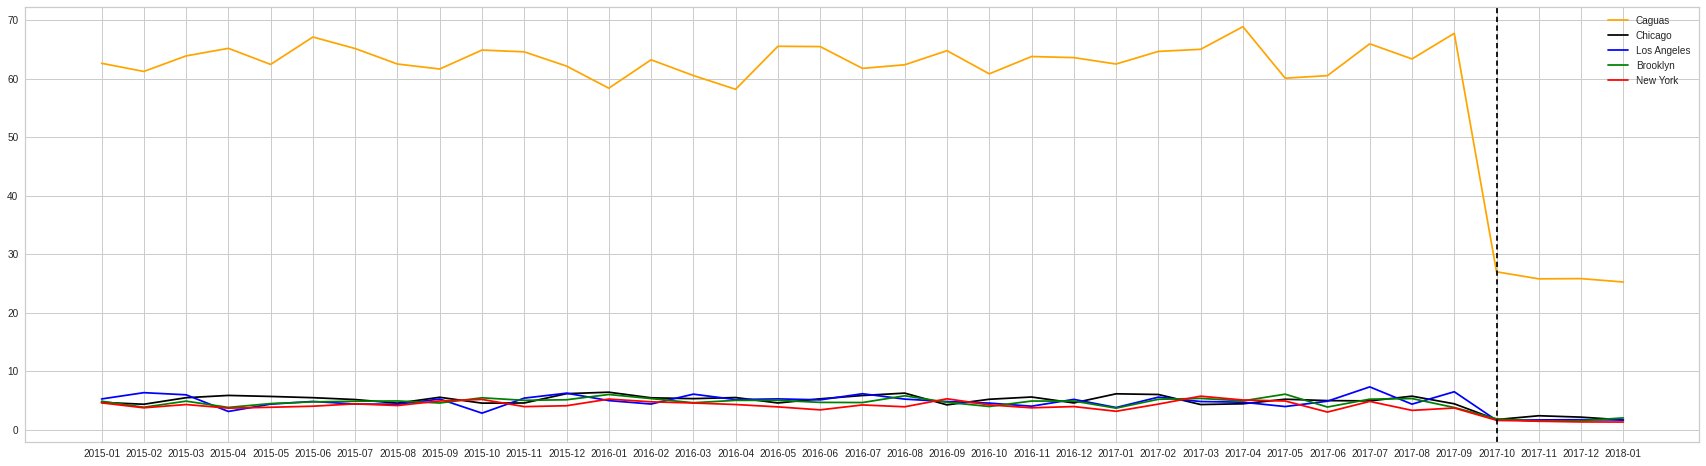

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_ccity2[(grafik_ccity2['Customer City']=='Caguas')].groupby(['month']).mean().reset_index()['month'],
         grafik_ccity2[(grafik_ccity2['Customer City']=='Caguas')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Caguas', color = 'orange')
plt.plot(grafik_ccity2[(grafik_ccity2['Customer City']=='Chicago')].groupby(['month']).mean().reset_index()['month'],
         grafik_ccity2[(grafik_ccity2['Customer City']=='Chicago')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Chicago', color = 'Black')
plt.plot(grafik_ccity2[(grafik_ccity2['Customer City']=='Los Angeles')].groupby(['month']).mean().reset_index()['month'],
         grafik_ccity2[(grafik_ccity2['Customer City']=='Los Angeles')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Los Angeles', color = 'Blue')
plt.plot(grafik_ccity2[(grafik_ccity2['Customer City']=='Brooklyn')].groupby(['month']).mean().reset_index()['month'],
         grafik_ccity2[(grafik_ccity2['Customer City']=='Brooklyn')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Brooklyn', color = 'Green')
plt.plot(grafik_ccity2[(grafik_ccity2['Customer City']=='New York')].groupby(['month']).mean().reset_index()['month'],
         grafik_ccity2[(grafik_ccity2['Customer City']=='New York')].groupby(['month']).mean().reset_index()['Order Id'],
         label='New York', color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

**Customer Country Column**

In [ ]:
# to Customer Country and its counts
df_dataset['Customer Country'].value_counts()

## line chart per tahun

EE. UU.        111146
Puerto Rico     69373
Name: Customer Country, dtype: int64

In [ ]:
grafik_cc2 = df_dataset.groupby(['year','month','date','Customer Country'])['Order Id'].count().reset_index()
grafik_cc2.head()

year    month        date Customer Country  Order Id
0  2015  2015-01  2015-01-01          EE. UU.       104
1  2015  2015-01  2015-01-01      Puerto Rico        64
2  2015  2015-01  2015-01-02          EE. UU.       117
3  2015  2015-01  2015-01-02      Puerto Rico        37
4  2015  2015-01  2015-01-03          EE. UU.       102

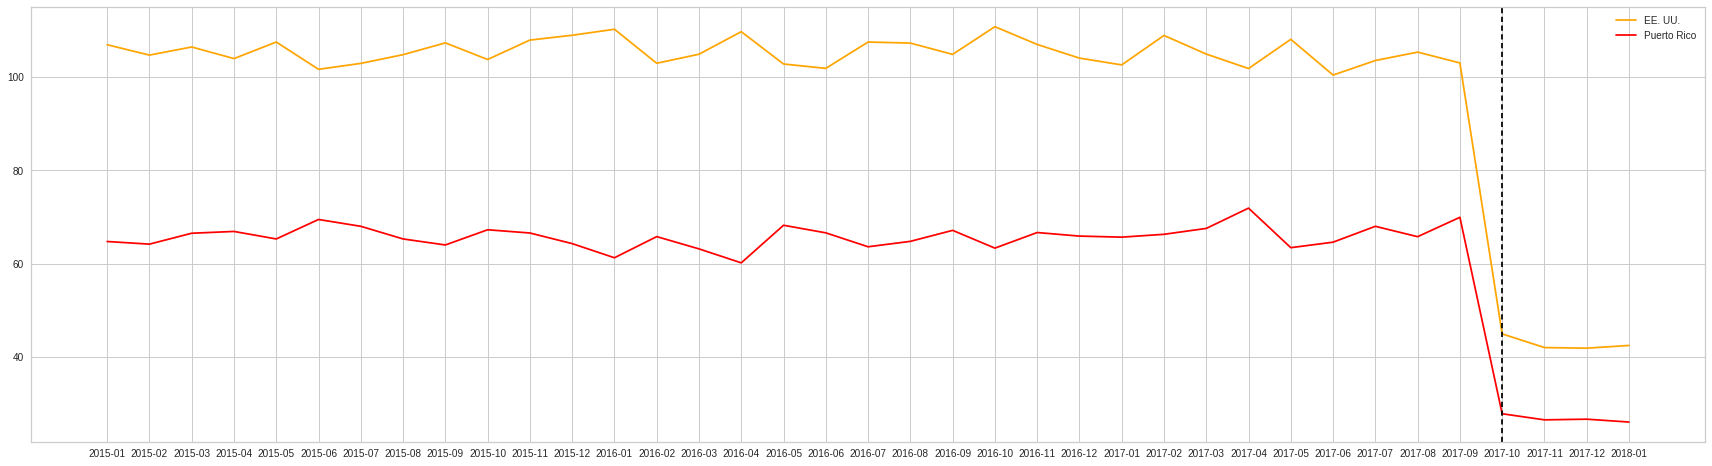

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_cc2[(grafik_cc2['Customer Country']=='EE. UU.')].groupby(['month']).mean().reset_index()['month'],
         grafik_cc2[(grafik_cc2['Customer Country']=='EE. UU.')].groupby(['month']).mean().reset_index()['Order Id'],
         label='EE. UU.', color = 'orange')
plt.plot(grafik_cc2[(grafik_cc2['Customer Country']=='Puerto Rico')].groupby(['month']).mean().reset_index()['month'],
         grafik_cc2[(grafik_cc2['Customer Country']=='Puerto Rico')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Puerto Rico', color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

**Customer Segment Column**

In [ ]:
# to Customer Segment and its counts
df_dataset['Customer Segment'].value_counts()

### line chart per tahun

Consumer       93504
Corporate      54789
Home Office    32226
Name: Customer Segment, dtype: int64

In [ ]:
grafik_cs2 = df_dataset.groupby(['year','month','date','Customer Segment'])['Order Id'].count().reset_index()
grafik_cs2.head()

year    month        date Customer Segment  Order Id
0  2015  2015-01  2015-01-01         Consumer        96
1  2015  2015-01  2015-01-01        Corporate        44
2  2015  2015-01  2015-01-01      Home Office        28
3  2015  2015-01  2015-01-02         Consumer        58
4  2015  2015-01  2015-01-02        Corporate        59

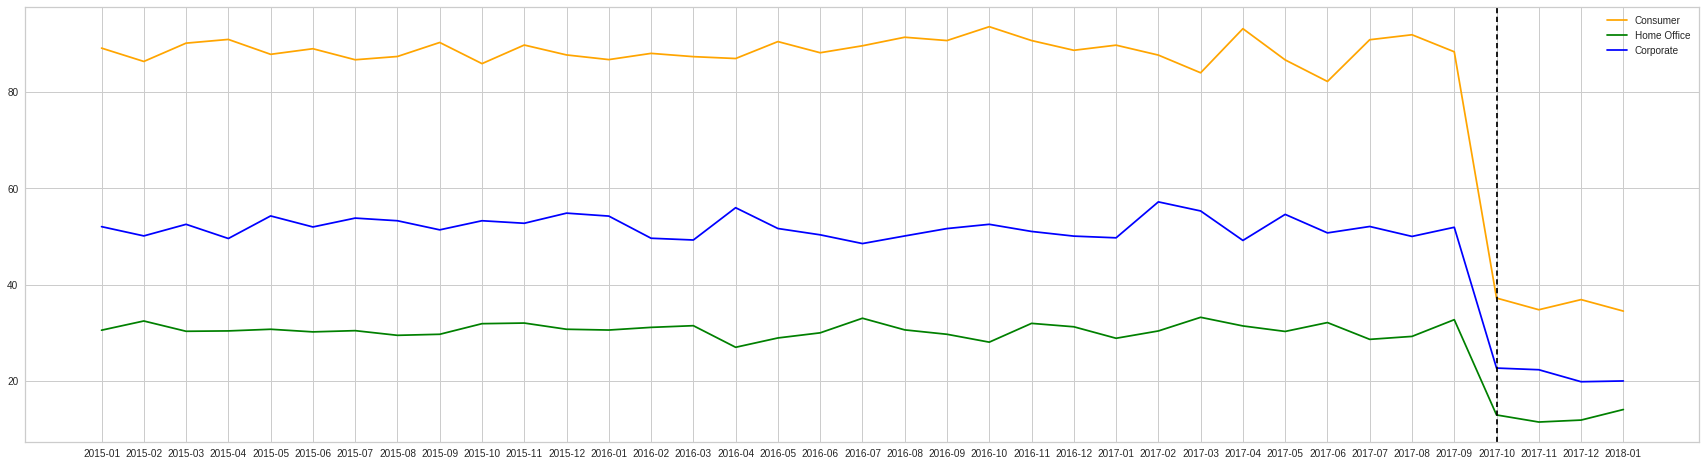

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_cs2[(grafik_cs2['Customer Segment']=='Consumer')].groupby(['month']).mean().reset_index()['month'],
         grafik_cs2[(grafik_cs2['Customer Segment']=='Consumer')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Consumer', color = 'orange')
plt.plot(grafik_cs2[(grafik_cs2['Customer Segment']=='Home Office')].groupby(['month']).mean().reset_index()['month'],
         grafik_cs2[(grafik_cs2['Customer Segment']=='Home Office')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Home Office', color = 'green')
plt.plot(grafik_cs2[(grafik_cs2['Customer Segment']=='Corporate')].groupby(['month']).mean().reset_index()['month'],
         grafik_cs2[(grafik_cs2['Customer Segment']=='Corporate')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Corporate', color = 'blue')
plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

**Customer State Column**

In [ ]:
# to Customer State and its counts
df_dataset['Customer State'].value_counts().head(5)

## line chart top 5 per tahun

PR    69373
CA    29223
NY    11327
TX     9103
IL     7631
Name: Customer State, dtype: int64

In [ ]:
grafik_cst2 = df_dataset.groupby(['year','month','date','Customer State'])['Order Id'].count().reset_index()
grafik_cst2.head()

year    month        date Customer State  Order Id
0  2015  2015-01  2015-01-01             AR         1
1  2015  2015-01  2015-01-01             CA        16
2  2015  2015-01  2015-01-01             FL        17
3  2015  2015-01  2015-01-01             GA         3
4  2015  2015-01  2015-01-01             IL         8

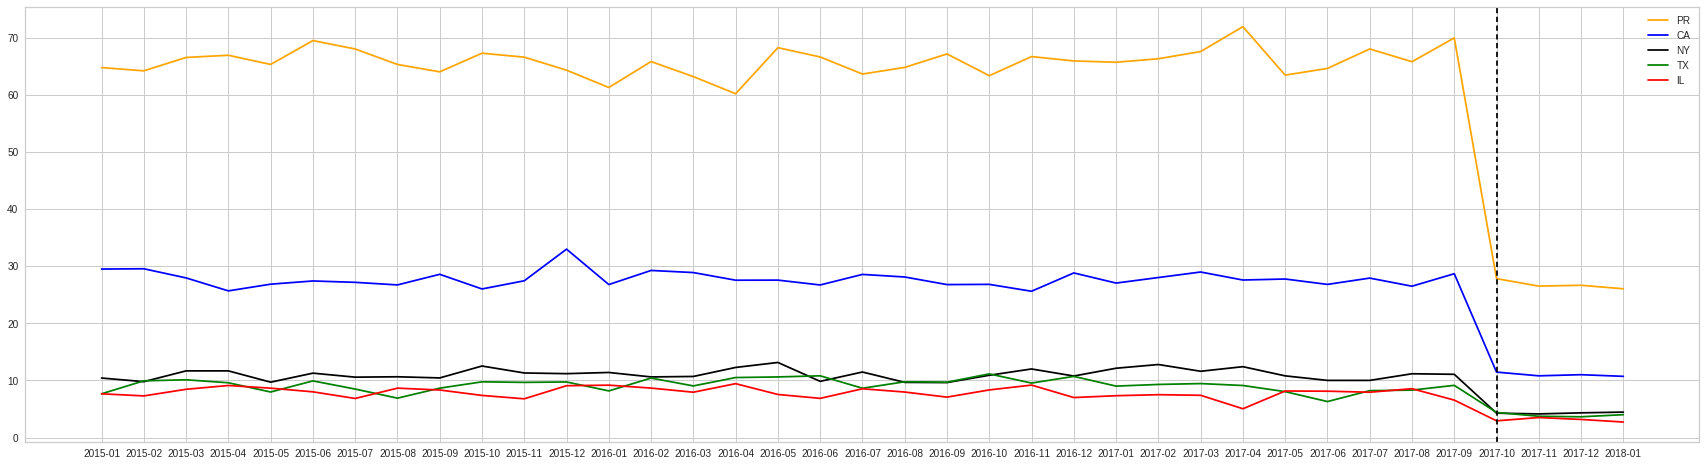

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_cst2[(grafik_cst2['Customer State']=='PR')].groupby(['month']).mean().reset_index()['month'],
         grafik_cst2[(grafik_cst2['Customer State']=='PR')].groupby(['month']).mean().reset_index()['Order Id'],
         label='PR', color = 'orange')
plt.plot(grafik_cst2[(grafik_cst2['Customer State']=='CA')].groupby(['month']).mean().reset_index()['month'],
         grafik_cst2[(grafik_cst2['Customer State']=='CA')].groupby(['month']).mean().reset_index()['Order Id'],
         label='CA', color = 'Blue')
plt.plot(grafik_cst2[(grafik_cst2['Customer State']=='NY')].groupby(['month']).mean().reset_index()['month'],
         grafik_cst2[(grafik_cst2['Customer State']=='NY')].groupby(['month']).mean().reset_index()['Order Id'],
         label='NY', color = 'black')
plt.plot(grafik_cst2[(grafik_cst2['Customer State']=='TX')].groupby(['month']).mean().reset_index()['month'],
         grafik_cst2[(grafik_cst2['Customer State']=='TX')].groupby(['month']).mean().reset_index()['Order Id'],
         label='TX', color = 'green')
plt.plot(grafik_cst2[(grafik_cst2['Customer State']=='IL')].groupby(['month']).mean().reset_index()['month'],
         grafik_cst2[(grafik_cst2['Customer State']=='IL')].groupby(['month']).mean().reset_index()['Order Id'],
         label='IL', color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

**Department Name Column**

In [ ]:
# to Department Name and its counts
df_dataset['Department Name'].value_counts()

### ## line chart per tahun

Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: Department Name, dtype: int64

In [ ]:
grafik_dn2 = df_dataset.groupby(['year','month','date','Department Name'])['Order Id'].count().reset_index()
grafik_dn2.head()

year    month        date Department Name  Order Id
0  2015  2015-01  2015-01-01         Apparel        44
1  2015  2015-01  2015-01-01        Fan Shop        72
2  2015  2015-01  2015-01-01         Fitness         3
3  2015  2015-01  2015-01-01        Footwear        11
4  2015  2015-01  2015-01-01            Golf        26

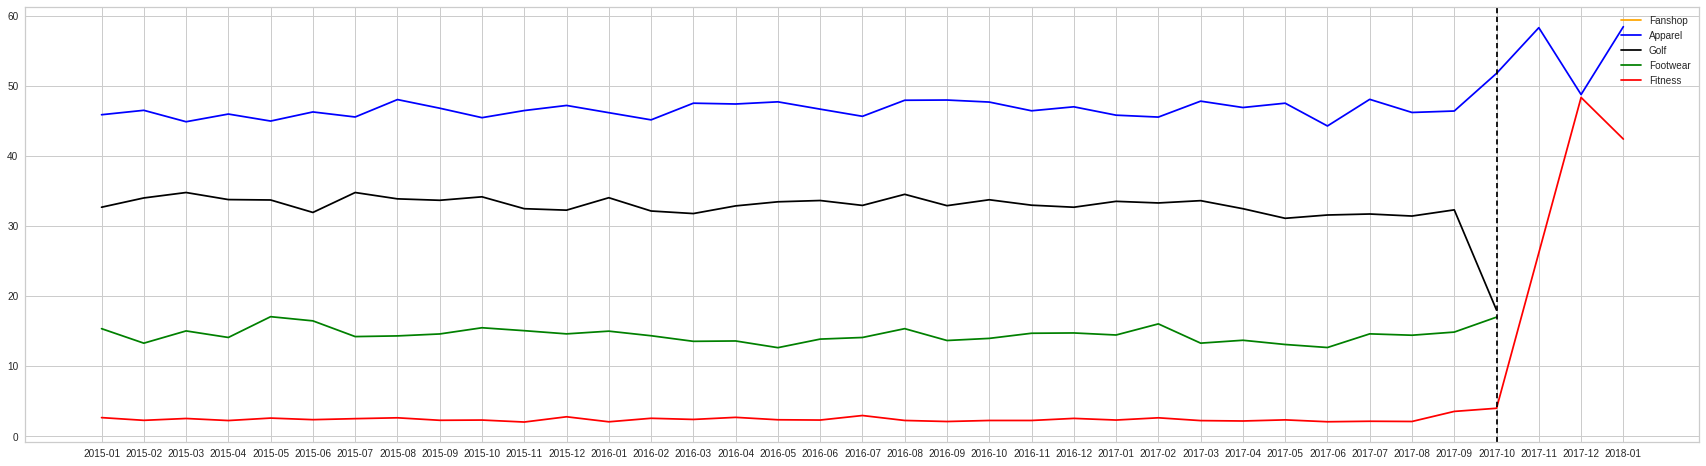

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_dn2[(grafik_dn2['Department Name']=='Fanshop')].groupby(['month']).mean().reset_index()['month'],
         grafik_dn2[(grafik_dn2['Department Name']=='Fanshop')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Fanshop', color = 'orange')
plt.plot(grafik_dn2[(grafik_dn2['Department Name']=='Apparel')].groupby(['month']).mean().reset_index()['month'],
         grafik_dn2[(grafik_dn2['Department Name']=='Apparel')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Apparel', color = 'Blue')
plt.plot(grafik_dn2[(grafik_dn2['Department Name']=='Golf')].groupby(['month']).mean().reset_index()['month'],
         grafik_dn2[(grafik_dn2['Department Name']=='Golf')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Golf', color = 'Black')
plt.plot(grafik_dn2[(grafik_dn2['Department Name']=='Footwear')].groupby(['month']).mean().reset_index()['month'],
         grafik_dn2[(grafik_dn2['Department Name']=='Footwear')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Footwear', color = 'Green')

plt.plot(grafik_dn2[(grafik_dn2['Department Name']=='Fitness')].groupby(['month']).mean().reset_index()['month'],
         grafik_dn2[(grafik_dn2['Department Name']=='Fitness')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Fitness', color = 'red')


plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

**Market Column**

In [ ]:
# to Market and its counts
df_dataset['Market'].value_counts()

### ## line chart per tahun

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [ ]:
# make a dataframe copy
grafik_market = df_dataset.copy()

# extract MonthYear of time purchased
grafik_market['order date'] = grafik_market['order date'].dt.strftime('%Y').astype('datetime64')

# create new data frame to get the number of order
grafik_market = grafik_market.groupby('order date')['Market'].value_counts()
grafik_market

order date  Market      
2015-01-01  LATAM           25775
            Europe          24914
            Pacific Asia    11961
2016-01-01  USCA            25681
            Pacific Asia    22641
            Africa          10356
            Europe           3872
2017-01-01  LATAM           25819
            Europe          21466
            Pacific Asia     4535
            Africa           1258
            USCA              118
2018-01-01  Pacific Asia     2123
Name: Market, dtype: int64

In [ ]:
grafik_m2 = df_dataset.groupby(['year','month','date','Market'])['Order Id'].count().reset_index()
grafik_m2.head()

year    month        date Market  Order Id
0  2015  2015-01  2015-01-01  LATAM       168
1  2015  2015-01  2015-01-02  LATAM       154
2  2015  2015-01  2015-01-03  LATAM       179
3  2015  2015-01  2015-01-04  LATAM       191
4  2015  2015-01  2015-01-05  LATAM       160

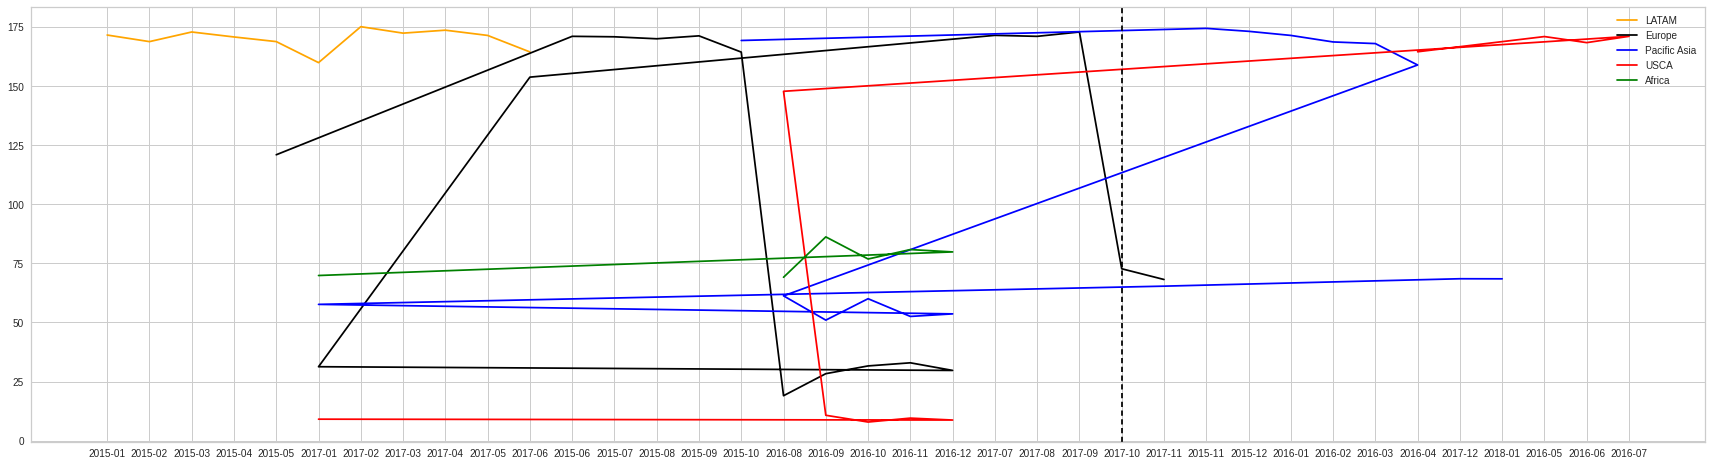

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_m2[(grafik_m2['Market']=='LATAM')].groupby(['month']).mean().reset_index()['month'],
         grafik_m2[(grafik_m2['Market']=='LATAM')].groupby(['month']).mean().reset_index()['Order Id'],
         label='LATAM', color = 'orange')
plt.plot(grafik_m2[(grafik_m2['Market']=='Europe')].groupby(['month']).mean().reset_index()['month'],
         grafik_m2[(grafik_m2['Market']=='Europe')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Europe', color = 'black')
plt.plot(grafik_m2[(grafik_m2['Market']=='Pacific Asia')].groupby(['month']).mean().reset_index()['month'],
         grafik_m2[(grafik_m2['Market']=='Pacific Asia')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Pacific Asia', color = 'blue')
plt.plot(grafik_m2[(grafik_m2['Market']=='USCA')].groupby(['month']).mean().reset_index()['month'],
         grafik_m2[(grafik_m2['Market']=='USCA')].groupby(['month']).mean().reset_index()['Order Id'],
         label='USCA', color = 'red')
plt.plot(grafik_m2[(grafik_m2['Market']=='Africa')].groupby(['month']).mean().reset_index()['month'],
         grafik_m2[(grafik_m2['Market']=='Africa')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Africa', color = 'green')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

In [ ]:
grafik_m2[(grafik_m2['Market']=='Pacific Asia')].groupby(['month']).mean().reset_index()

month  Order Id
0   2015-10    169.38
1   2015-11    174.50
2   2015-12    173.26
3   2016-01    171.52
4   2016-02    168.76
5   2016-03    168.06
6   2016-04    159.00
7   2016-08     61.29
8   2016-09     51.00
9   2016-10     60.06
10  2016-11     52.57
11  2016-12     53.65
12  2017-01     57.67
13  2017-11     65.38
14  2017-12     68.52
15  2018-01     68.48

**Order City Column**

In [ ]:
# to Order City and its counts
df_dataset['Order City'].value_counts().head(5)

### ## line chart per tahun top 5

Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
Name: Order City, dtype: int64

In [ ]:
grafik_oc2 = df_dataset.groupby(['year','month','date','Order City'])['Order Id'].count().reset_index()
grafik_oc2.head()

year    month        date     Order City  Order Id
0  2015  2015-01  2015-01-01       Artemisa         3
1  2015  2015-01  2015-01-01          Bello         1
2  2015  2015-01  2015-01-01       Brasília         7
3  2015  2015-01  2015-01-01       Coyoacán         3
4  2015  2015-01  2015-01-01  Dos Quebradas        12

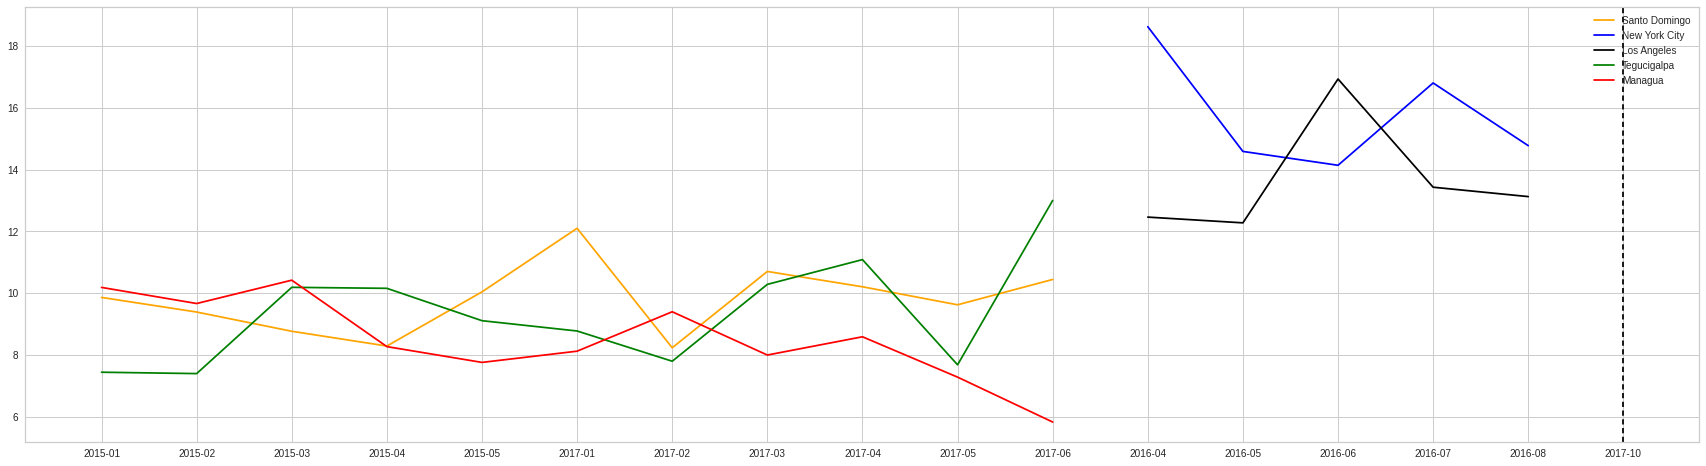

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_oc2[(grafik_oc2['Order City']=='Santo Domingo')].groupby(['month']).mean().reset_index()['month'],
         grafik_oc2[(grafik_oc2['Order City']=='Santo Domingo')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Santo Domingo', color = 'orange')
plt.plot(grafik_oc2[(grafik_oc2['Order City']=='New York City')].groupby(['month']).mean().reset_index()['month'],
         grafik_oc2[(grafik_oc2['Order City']=='New York City')].groupby(['month']).mean().reset_index()['Order Id'],
         label='New York City', color = 'Blue')
plt.plot(grafik_oc2[(grafik_oc2['Order City']=='Los Angeles')].groupby(['month']).mean().reset_index()['month'],
         grafik_oc2[(grafik_oc2['Order City']=='Los Angeles')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Los Angeles', color = 'Black')
plt.plot(grafik_oc2[(grafik_oc2['Order City']=='Tegucigalpa')].groupby(['month']).mean().reset_index()['month'],
         grafik_oc2[(grafik_oc2['Order City']=='Tegucigalpa')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Tegucigalpa', color = 'Green')
plt.plot(grafik_oc2[(grafik_oc2['Order City']=='Managua')].groupby(['month']).mean().reset_index()['month'],
         grafik_oc2[(grafik_oc2['Order City']=='Managua')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Managua', color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

# **Order Country Column**

In [ ]:
# to Order Country and its counts
df_dataset['Order Country'].value_counts().head(5)

### ## line chart per tahun top 5

Estados Unidos    24840
Francia           13222
México            13172
Alemania           9564
Australia          8497
Name: Order Country, dtype: int64

In [ ]:
grafik_ocou2 = df_dataset.groupby(['year','month','date','Order Country'])['Order Id'].count().reset_index()
grafik_ocou2.head()

year    month        date Order Country  Order Id
0  2015  2015-01  2015-01-01        Brasil        36
1  2015  2015-01  2015-01-01         Chile         1
2  2015  2015-01  2015-01-01      Colombia        15
3  2015  2015-01  2015-01-01          Cuba         5
4  2015  2015-01  2015-01-01      Honduras        26

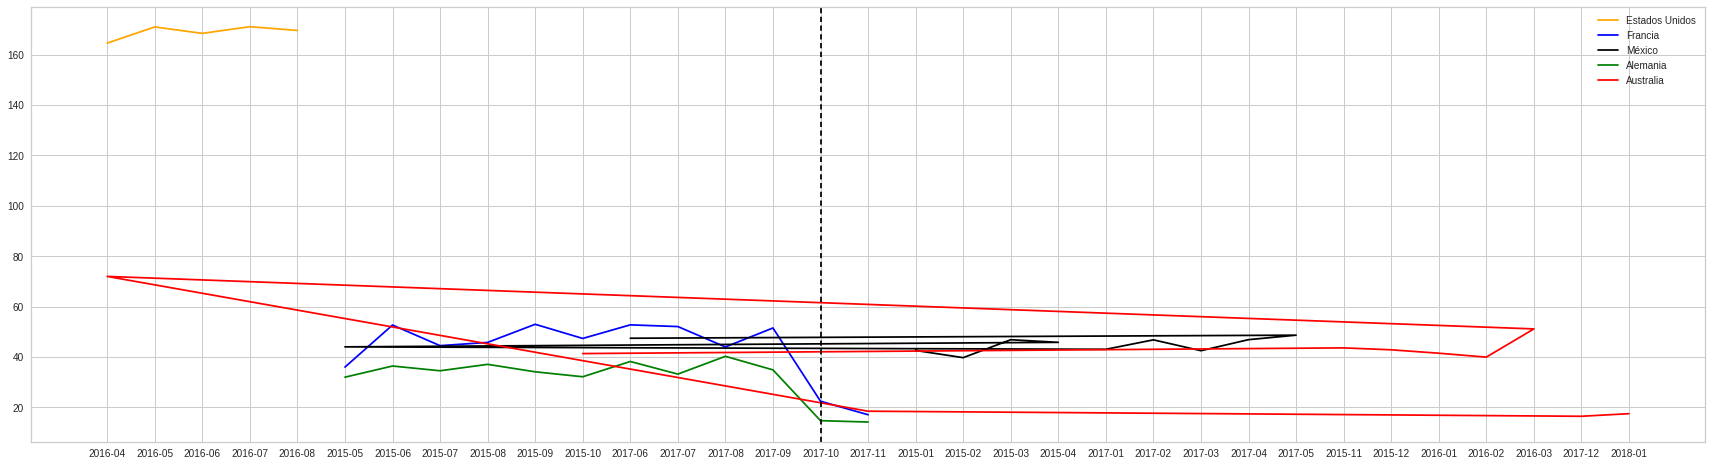

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_ocou2[(grafik_ocou2['Order Country']=='Estados Unidos')].groupby(['month']).mean().reset_index()['month'],
         grafik_ocou2[(grafik_ocou2['Order Country']=='Estados Unidos')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Estados Unidos', color = 'orange')
plt.plot(grafik_ocou2[(grafik_ocou2['Order Country']=='Francia')].groupby(['month']).mean().reset_index()['month'],
         grafik_ocou2[(grafik_ocou2['Order Country']=='Francia')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Francia', color = 'Blue')
plt.plot(grafik_ocou2[(grafik_ocou2['Order Country']=='México')].groupby(['month']).mean().reset_index()['month'],
         grafik_ocou2[(grafik_ocou2['Order Country']=='México')].groupby(['month']).mean().reset_index()['Order Id'],
         label='México', color = 'Black')
plt.plot(grafik_ocou2[(grafik_ocou2['Order Country']=='Alemania')].groupby(['month']).mean().reset_index()['month'],
         grafik_ocou2[(grafik_ocou2['Order Country']=='Alemania')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Alemania', color = 'green')
plt.plot(grafik_ocou2[(grafik_ocou2['Order Country']=='Australia')].groupby(['month']).mean().reset_index()['month'],
         grafik_ocou2[(grafik_ocou2['Order Country']=='Australia')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Australia', color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

# **Order Region Column**

In [ ]:
# to Order Region and its counts
df_dataset['Order Region'].value_counts().head()

### ## line chart per tahun top 5 

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Name: Order Region, dtype: int64

In [ ]:
grafik_oreg2 = df_dataset.groupby(['year','month','date','Order Region'])['Order Id'].count().reset_index()
grafik_oreg2.head()

year    month        date     Order Region  Order Id
0  2015  2015-01  2015-01-01        Caribbean        16
1  2015  2015-01  2015-01-01  Central America       100
2  2015  2015-01  2015-01-01    South America        52
3  2015  2015-01  2015-01-02        Caribbean        33
4  2015  2015-01  2015-01-02  Central America        70

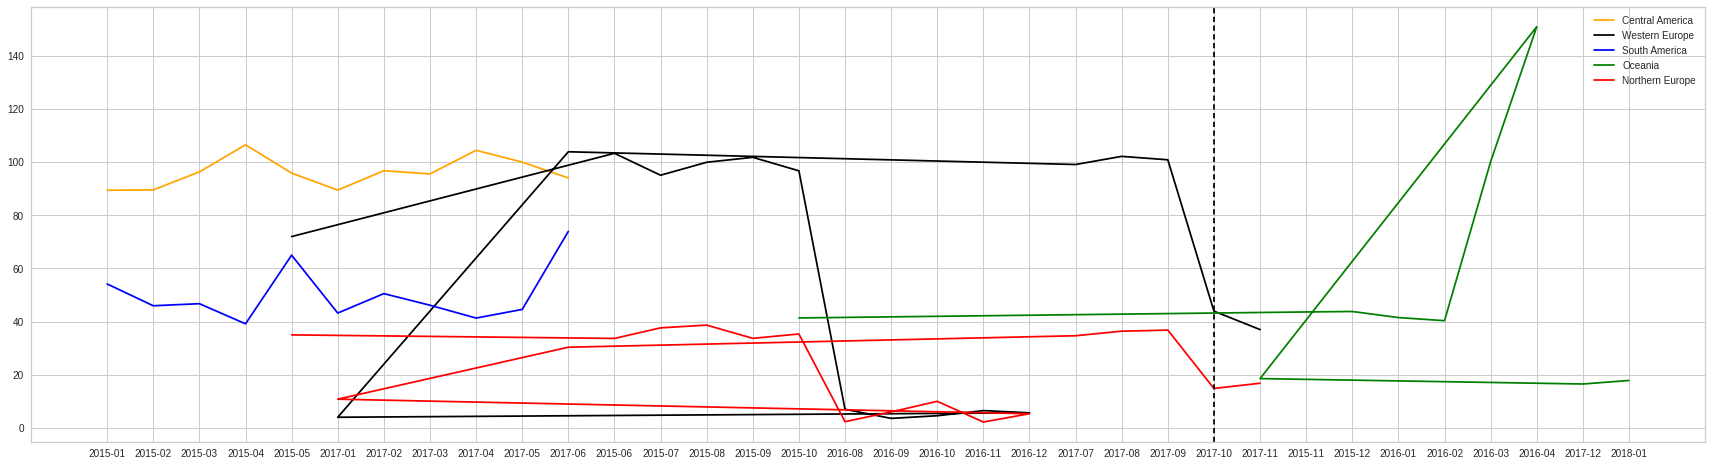

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_oreg2[(grafik_oreg2['Order Region']=='Central America')].groupby(['month']).mean().reset_index()['month'],
         grafik_oreg2[(grafik_oreg2['Order Region']=='Central America')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Central America', color = 'orange')
plt.plot(grafik_oreg2[(grafik_oreg2['Order Region']=='Western Europe')].groupby(['month']).mean().reset_index()['month'],
         grafik_oreg2[(grafik_oreg2['Order Region']=='Western Europe')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Western Europe', color = 'Black')
plt.plot(grafik_oreg2[(grafik_oreg2['Order Region']=='South America')].groupby(['month']).mean().reset_index()['month'],
         grafik_oreg2[(grafik_oreg2['Order Region']=='South America')].groupby(['month']).mean().reset_index()['Order Id'],
         label='South America', color = 'Blue')
plt.plot(grafik_oreg2[(grafik_oreg2['Order Region']=='Oceania')].groupby(['month']).mean().reset_index()['month'],
         grafik_oreg2[(grafik_oreg2['Order Region']=='Oceania')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Oceania', color = 'green')
plt.plot(grafik_oreg2[(grafik_oreg2['Order Region']=='Northern Europe')].groupby(['month']).mean().reset_index()['month'],
         grafik_oreg2[(grafik_oreg2['Order Region']=='Northern Europe')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Northern Europe', color = 'red')


plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

# **Order State Column**

In [ ]:
# to Order State and its counts
df_dataset['Order State'].value_counts().head()

### ## line chart per tahun top 5

Inglaterra                     6722
California                     4966
Isla de Francia                4580
Renania del Norte-Westfalia    3303
San Salvador                   3055
Name: Order State, dtype: int64

In [ ]:
grafik_ost2 = df_dataset.groupby(['year','month','date','Order State'])['Order Id'].count().reset_index()
grafik_ost2.head()

year    month        date          Order State  Order Id
0  2015  2015-01  2015-01-01            Antioquía         3
1  2015  2015-01  2015-01-01             Artemisa         3
2  2015  2015-01  2015-01-01            Atlántida         4
3  2015  2015-01  2015-01-01  Baja California Sur         3
4  2015  2015-01  2015-01-01                Ceará         3

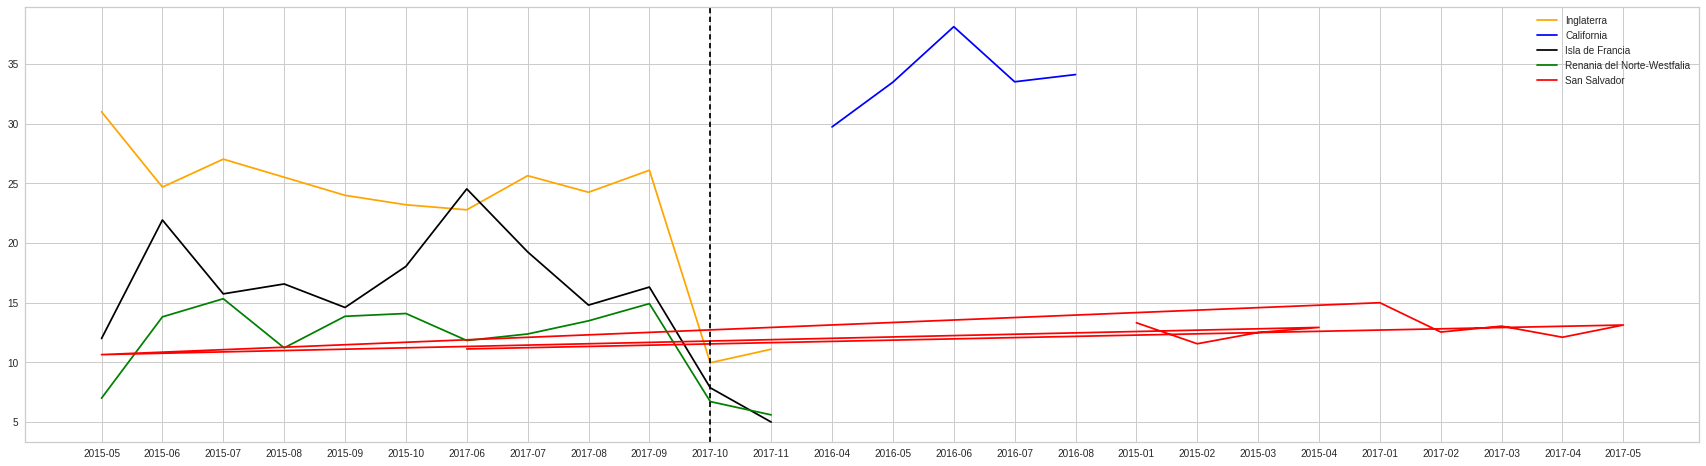

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_ost2[(grafik_ost2['Order State']=='Inglaterra')].groupby(['month']).mean().reset_index()['month'],
         grafik_ost2[(grafik_ost2['Order State']=='Inglaterra')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Inglaterra', color = 'orange')
plt.plot(grafik_ost2[(grafik_ost2['Order State']=='California')].groupby(['month']).mean().reset_index()['month'],
         grafik_ost2[(grafik_ost2['Order State']=='California')].groupby(['month']).mean().reset_index()['Order Id'],
         label='California', color = 'Blue')
plt.plot(grafik_ost2[(grafik_ost2['Order State']=='Isla de Francia')].groupby(['month']).mean().reset_index()['month'],
         grafik_ost2[(grafik_ost2['Order State']=='Isla de Francia')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Isla de Francia', color = 'Black')
plt.plot(grafik_ost2[(grafik_ost2['Order State']=='Renania del Norte-Westfalia')].groupby(['month']).mean().reset_index()['month'],
         grafik_ost2[(grafik_ost2['Order State']=='Renania del Norte-Westfalia')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Renania del Norte-Westfalia', color = 'Green')
plt.plot(grafik_ost2[(grafik_ost2['Order State']=='San Salvador')].groupby(['month']).mean().reset_index()['month'],
         grafik_ost2[(grafik_ost2['Order State']=='San Salvador')].groupby(['month']).mean().reset_index()['Order Id'],
         label='San Salvador', color = 'Red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

**Order Status Column**

In [ ]:
# to Order Status and its counts
df_dataset['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [ ]:
# to replace string into new values
df_dataset['Order Status'] = df_dataset['Order Status'].str.replace('CLOSED','COMPLETE')
df_dataset['Order Status'] = df_dataset['Order Status'].str.replace('PENDING_PAYMENT','PENDING')
df_dataset['Order Status'] = df_dataset['Order Status'].str.replace('ON_HOLD','PENDING')
df_dataset['Order Status'] = df_dataset['Order Status'].str.replace('PAYMENT_REVIEW','PROCESSING')

# to see the data after we manipulate
df_dataset['Order Status'].value_counts()

### ## line chart per tahun

COMPLETE           79107
PENDING            69863
PROCESSING         23795
SUSPECTED_FRAUD     4062
CANCELED            3692
Name: Order Status, dtype: int64

In [ ]:
# make a dataframe copy
grafik_os = df_dataset.copy()

# extract MonthYear of time purchased
grafik_os['order date'] = grafik_os['order date'].dt.strftime('%Y').astype('datetime64')

# create new data frame to get the number of order
grafik_os = grafik_os.groupby('order date')['Order Status'].value_counts()
grafik_os

order date  Order Status   
2015-01-01  COMPLETE           27405
            PENDING            24368
            PROCESSING          8181
            SUSPECTED_FRAUD     1385
            CANCELED            1311
2016-01-01  COMPLETE           27712
            PENDING            23978
            PROCESSING          8236
            SUSPECTED_FRAUD     1376
            CANCELED            1248
2017-01-01  COMPLETE           23034
            PENDING            20716
            PROCESSING          7098
            SUSPECTED_FRAUD     1260
            CANCELED            1088
2018-01-01  COMPLETE             956
            PENDING              801
            PROCESSING           280
            CANCELED              45
            SUSPECTED_FRAUD       41
Name: Order Status, dtype: int64

In [ ]:
grafik_os2 = df_dataset.groupby(['year','month','date','Order Status'])['Order Id'].count().reset_index()
grafik_os2.head()

year    month        date     Order Status  Order Id
0  2015  2015-01  2015-01-01         CANCELED         2
1  2015  2015-01  2015-01-01         COMPLETE        70
2  2015  2015-01  2015-01-01          PENDING        68
3  2015  2015-01  2015-01-01       PROCESSING        27
4  2015  2015-01  2015-01-01  SUSPECTED_FRAUD         1

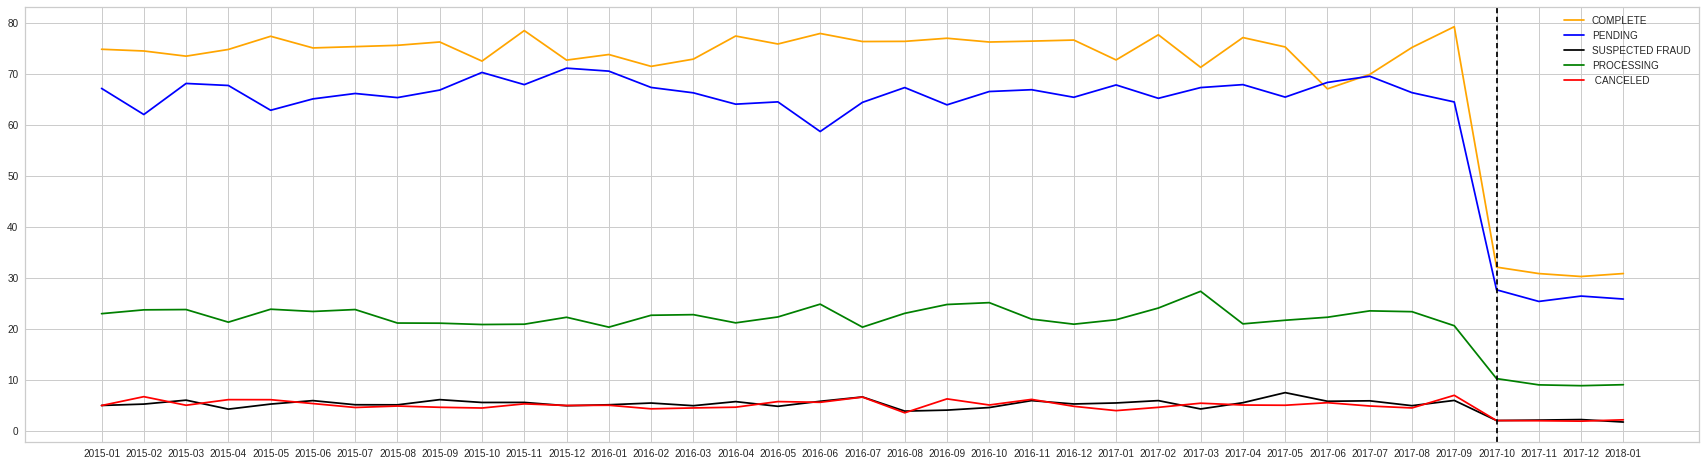

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_os2[(grafik_os2['Order Status']=='COMPLETE')].groupby(['month']).mean().reset_index()['month'],
         grafik_os2[(grafik_os2['Order Status']=='COMPLETE')].groupby(['month']).mean().reset_index()['Order Id'],
         label='COMPLETE', color = 'orange')
plt.plot(grafik_os2[(grafik_os2['Order Status']=='PENDING')].groupby(['month']).mean().reset_index()['month'],
         grafik_os2[(grafik_os2['Order Status']=='PENDING')].groupby(['month']).mean().reset_index()['Order Id'],
         label='PENDING', color = 'Blue')
plt.plot(grafik_os2[(grafik_os2['Order Status']=='SUSPECTED_FRAUD')].groupby(['month']).mean().reset_index()['month'],
         grafik_os2[(grafik_os2['Order Status']=='SUSPECTED_FRAUD')].groupby(['month']).mean().reset_index()['Order Id'],
         label='SUSPECTED FRAUD', color = 'Black')
plt.plot(grafik_os2[(grafik_os2['Order Status']=='PROCESSING')].groupby(['month']).mean().reset_index()['month'],
         grafik_os2[(grafik_os2['Order Status']=='PROCESSING')].groupby(['month']).mean().reset_index()['Order Id'],
         label='PROCESSING', color = 'Green')
plt.plot(grafik_os2[(grafik_os2['Order Status']=='CANCELED')].groupby(['month']).mean().reset_index()['month'],
         grafik_os2[(grafik_os2['Order Status']=='CANCELED')].groupby(['month']).mean().reset_index()['Order Id'],
         label=' CANCELED', color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2))


plt.show()

## **Product Name Column**

In [ ]:
# to Product Name and its counts
df_dataset['Product Name'].value_counts().head(5)

### ## line chart per tahun top 5

Perfect Fitness Perfect Rip Deck             24515
Nike Men's CJ Elite 2 TD Football Cleat      22246
Nike Men's Dri-FIT Victory Golf Polo         21035
O'Brien Men's Neoprene Life Vest             19298
Field & Stream Sportsman 16 Gun Fire Safe    17325
Name: Product Name, dtype: int64

In [ ]:
grafik_pn2 = df_dataset.groupby(['year','month','date','Product Name'])['Order Id'].count().reset_index()
grafik_pn2.head()

year    month        date                                   Product Name  \
0  2015  2015-01  2015-01-01  Bridgestone e6 Straight Distance NFL San Dieg   
1  2015  2015-01  2015-01-01  Bridgestone e6 Straight Distance NFL Tennesse   
2  2015  2015-01  2015-01-01                        Clicgear 8.0 Shoe Brush   
3  2015  2015-01  2015-01-01  Diamondback Women's Serene Classic Comfort Bi   
4  2015  2015-01  2015-01-01      Field & Stream Sportsman 16 Gun Fire Safe   

   Order Id  
0         1  
1         1  
2         1  
3        20  
4        15

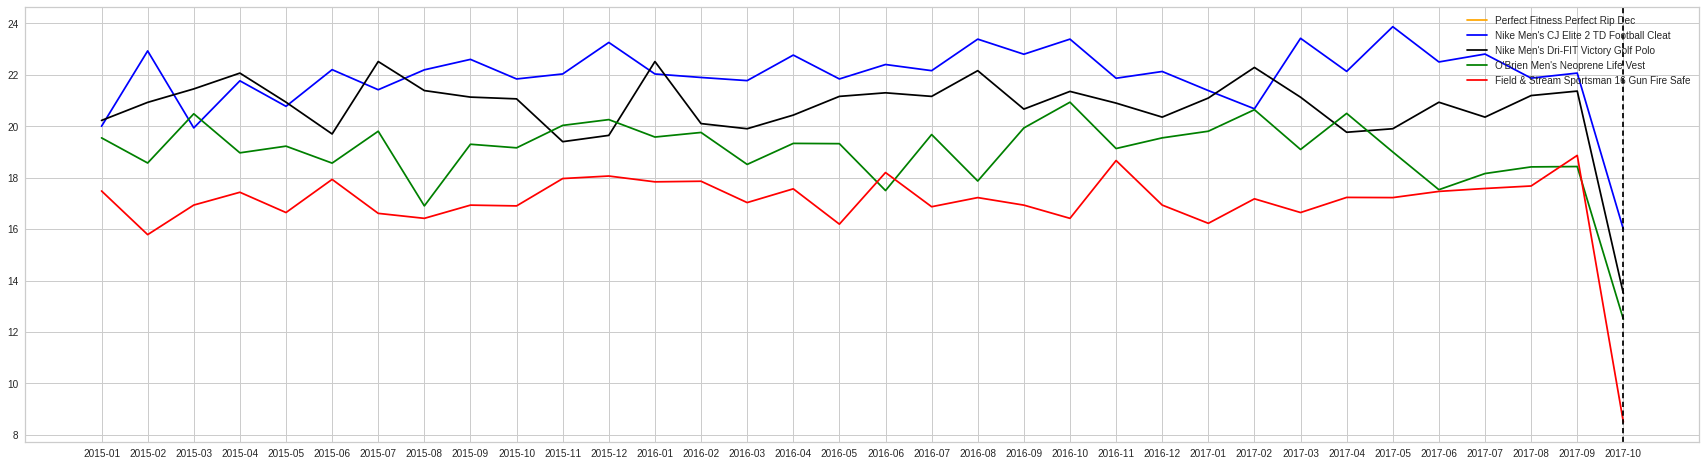

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_pn2[(grafik_pn2['Product Name']=='Perfect Fitness Perfect Rip Dec')].groupby(['month']).mean().reset_index()['month'],
         grafik_pn2[(grafik_pn2['Product Name']=='Perfect Fitness Perfect Rip Dec')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Perfect Fitness Perfect Rip Dec', color = 'orange')
plt.plot(grafik_pn2[(grafik_pn2['Product Name']=="Nike Men's CJ Elite 2 TD Football Cleat")].groupby(['month']).mean().reset_index()['month'],
         grafik_pn2[(grafik_pn2['Product Name']=="Nike Men's CJ Elite 2 TD Football Cleat")].groupby(['month']).mean().reset_index()['Order Id'],
         label="Nike Men's CJ Elite 2 TD Football Cleat", color = 'Blue')
plt.plot(grafik_pn2[(grafik_pn2['Product Name']=="Nike Men's Dri-FIT Victory Golf Polo")].groupby(['month']).mean().reset_index()['month'],
         grafik_pn2[(grafik_pn2['Product Name']=="Nike Men's Dri-FIT Victory Golf Polo")].groupby(['month']).mean().reset_index()['Order Id'],
         label="Nike Men's Dri-FIT Victory Golf Polo", color = 'Black')
plt.plot(grafik_pn2[(grafik_pn2['Product Name']=="O'Brien Men's Neoprene Life Vest")].groupby(['month']).mean().reset_index()['month'],
         grafik_pn2[(grafik_pn2['Product Name']=="O'Brien Men's Neoprene Life Vest")].groupby(['month']).mean().reset_index()['Order Id'],
         label="O'Brien Men's Neoprene Life Vest", color = 'green')
plt.plot(grafik_pn2[(grafik_pn2['Product Name']=="Field & Stream Sportsman 16 Gun Fire Safe")].groupby(['month']).mean().reset_index()['month'],
         grafik_pn2[(grafik_pn2['Product Name']=="Field & Stream Sportsman 16 Gun Fire Safe")].groupby(['month']).mean().reset_index()['Order Id'],
         label="Field & Stream Sportsman 16 Gun Fire Safe", color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2)) 


plt.show()

**Shipping Mode Column**

In [ ]:
# to Shipping Mode and its counts
df_dataset['Shipping Mode'].value_counts()

### ## line chart per tahun

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

In [ ]:
# make a dataframe copy
grafik_sm = df_dataset.copy()

# extract MonthYear of time purchased
grafik_sm['order date'] = grafik_sm['order date'].dt.strftime('%Y').astype('datetime64')

# create new data frame to get the number of order
grafik_sm = grafik_sm.groupby('order date')['Shipping Mode'].value_counts()
grafik_sm

order date  Shipping Mode 
2015-01-01  Standard Class    37421
            Second Class      12241
            First Class        9673
            Same Day           3315
2016-01-01  Standard Class    37177
            Second Class      12174
            First Class        9792
            Same Day           3407
2017-01-01  Standard Class    31924
            Second Class      10356
            First Class        8021
            Same Day           2895
2018-01-01  Standard Class     1230
            Second Class        445
            First Class         328
            Same Day            120
Name: Shipping Mode, dtype: int64

In [ ]:
grafik_sm2 = df_dataset.groupby(['year','month','date','Shipping Mode'])['Order Id'].count().reset_index()
grafik_sm2.head()

year    month        date   Shipping Mode  Order Id
0  2015  2015-01  2015-01-01     First Class        23
1  2015  2015-01  2015-01-01    Second Class        25
2  2015  2015-01  2015-01-01  Standard Class       120
3  2015  2015-01  2015-01-02     First Class         7
4  2015  2015-01  2015-01-02        Same Day         1

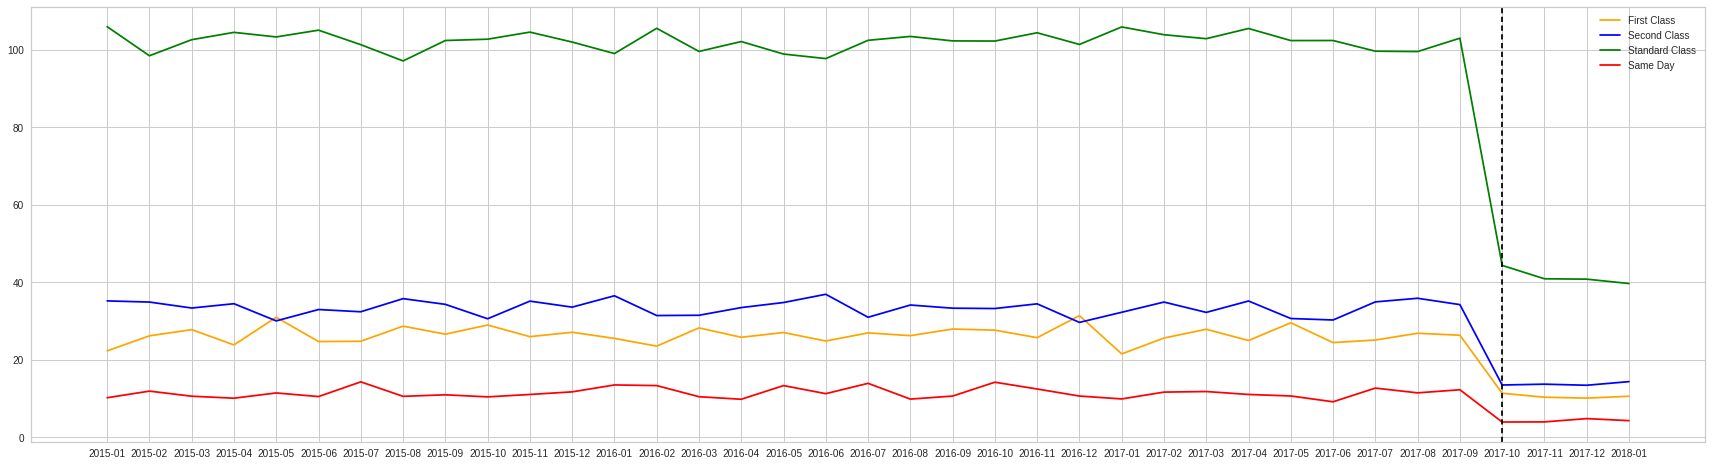

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_sm2[(grafik_sm2['Shipping Mode']=='First Class')].groupby(['month']).mean().reset_index()['month'],
         grafik_sm2[(grafik_sm2['Shipping Mode']=='First Class')].groupby(['month']).mean().reset_index()['Order Id'],
         label='First Class', color = 'orange')
plt.plot(grafik_sm2[(grafik_sm2['Shipping Mode']=='Second Class')].groupby(['month']).mean().reset_index()['month'],
         grafik_sm2[(grafik_sm2['Shipping Mode']=='Second Class')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Second Class', color = 'Blue')
plt.plot(grafik_sm2[(grafik_sm2['Shipping Mode']=='Standard Class')].groupby(['month']).mean().reset_index()['month'],
         grafik_sm2[(grafik_sm2['Shipping Mode']=='Standard Class')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Standard Class', color = 'green')
plt.plot(grafik_sm2[(grafik_sm2['Shipping Mode']=='Same Day')].groupby(['month']).mean().reset_index()['month'],
         grafik_sm2[(grafik_sm2['Shipping Mode']=='Same Day')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Same Day', color = 'red')

plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2))


plt.show()

**Delivery Status Column**

In [ ]:
# to Shipping Mode and its counts
df_dataset['Delivery Status'].value_counts()

### ## line chart per tahun

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [ ]:
# make a dataframe copy
grafik_ds = df_dataset.copy()

# extract MonthYear of time purchased
grafik_ds['order date'] = grafik_ds['order date'].dt.strftime('%Y-%m-%d').astype('datetime64')

# create new data frame to get the number of order
grafik_ds = grafik_ds.groupby(['order date','Delivery Status'])['Order Id'].count().reset_index()
grafik_ds

order date    Delivery Status  Order Id
0    2015-01-01   Advance shipping        44
1    2015-01-01      Late delivery        91
2    2015-01-01  Shipping canceled         3
3    2015-01-01   Shipping on time        30
4    2015-01-02   Advance shipping        51
...         ...                ...       ...
4404 2018-01-30   Shipping on time        14
4405 2018-01-31   Advance shipping        15
4406 2018-01-31      Late delivery        39
4407 2018-01-31  Shipping canceled         2
4408 2018-01-31   Shipping on time        12

[4409 rows x 3 columns]

In [ ]:
df_dataset['year'] = df_dataset['order date'].apply(lambda x: str(x)[:4])

In [ ]:
df_dataset['month'] = df_dataset['order date'].apply(lambda x: str(x)[:7])

In [ ]:
df_dataset['date'] = df_dataset['order date'].apply(lambda x: str(x)[:10])

In [ ]:
grafik_ds2 = df_dataset.groupby(['year','month','date','Delivery Status'])['Order Id'].count().reset_index()
grafik_ds2.head()

year    month        date    Delivery Status  Order Id
0  2015  2015-01  2015-01-01   Advance shipping        44
1  2015  2015-01  2015-01-01      Late delivery        91
2  2015  2015-01  2015-01-01  Shipping canceled         3
3  2015  2015-01  2015-01-01   Shipping on time        30
4  2015  2015-01  2015-01-02   Advance shipping        51

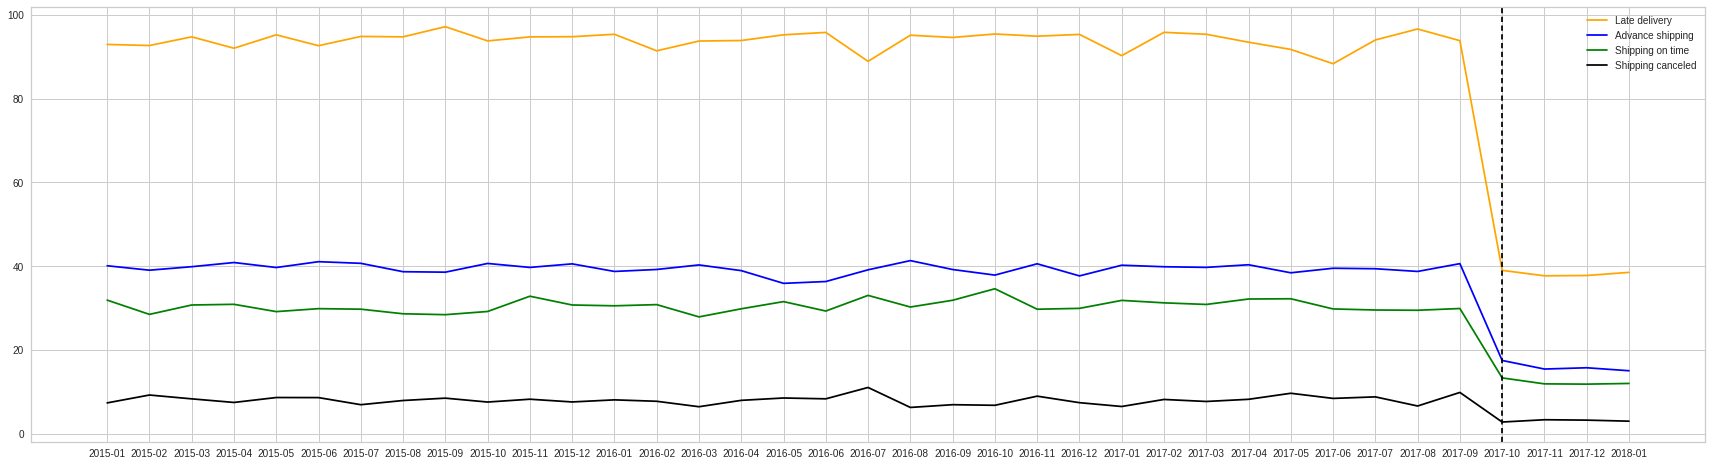

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(grafik_ds2[(grafik_ds2['Delivery Status']=='Late delivery')].groupby(['month']).mean().reset_index()['month'],
         grafik_ds2[(grafik_ds2['Delivery Status']=='Late delivery')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Late delivery', color = 'orange')
plt.plot(grafik_ds2[(grafik_ds2['Delivery Status']=='Advance shipping')].groupby(['month']).mean().reset_index()['month'],
         grafik_ds2[(grafik_ds2['Delivery Status']=='Advance shipping')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Advance shipping', color = 'blue')
plt.plot(grafik_ds2[(grafik_ds2['Delivery Status']=='Shipping on time')].groupby(['month']).mean().reset_index()['month'],
         grafik_ds2[(grafik_ds2['Delivery Status']=='Shipping on time')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Shipping on time', color = 'green')
plt.plot(grafik_ds2[(grafik_ds2['Delivery Status']=='Shipping canceled')].groupby(['month']).mean().reset_index()['month'],
         grafik_ds2[(grafik_ds2['Delivery Status']=='Shipping canceled')].groupby(['month']).mean().reset_index()['Order Id'],
         label='Shipping canceled', color = 'black')


plt.legend(loc='upper right')
plt.axvline(x = '2017-10',color = 'black', dashes = (3,2))


plt.show()

# Descriptive Statistics

## Numerical Data

In [ ]:
# we create new dataset that contaions only numerical value
descstat = df_dataset.describe()                                                                                                                                                              # to seet the descriptive statistics for each variable
col_desc = ['Days for shipping','Days for shipment', 'Benefit per order','Sales per customer', 'Order Item Quantity',                                                                         # we determine the numerical column name for further needs
            'Order Item Id','Order Item Discount','Order Item Discount Rate', 'Order Item Product Price',
            'Order Item Profit Ratio','Sales','Order Item Total','Order Profit Per Order', 'Product Price']    
descstat.loc['skewness'] = df_dataset[col_desc].skew()                                                                                                                                        # to get the skewness value
descstat.loc['variance'] = df_dataset[col_desc].var()                                                                                                                                         # to get the kurtosis value

<ipython-input-484-1b188d58a20f>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  descstat.loc['variance'] = df_dataset[col_desc].var()                                                                                                                                         # to get the kurtosis value


In [ ]:
pd.set_option('display.float_format',  '{:,}'.format) # set the display of numbers so that they are not abbreviated
descstat = round(descstat,2)                          # set the display of numbers to be rounded to 2 digits after the comma
descstat

Days for shipping  Days for shipment  Benefit per order  \
count             180,519.0          180,519.0          180,519.0   
mean                    3.5               2.93              21.97   
std                    1.62               1.37             104.43   
min                     0.0                0.0          -4,274.98   
25%                     2.0                2.0                7.0   
50%                     3.0                4.0              31.52   
75%                     5.0                4.0               64.8   
max                     6.0                4.0              911.8   
skewness               0.08              -0.73              -4.74   
variance               2.64               1.89          10,906.36   

          Sales per customer  Order Item Discount  Order Item Discount Rate  \
count              180,519.0            180,519.0                 180,519.0   
mean                  183.11                20.66                       0.1   
std                   120.04                 21.8                      0.07   
min                     7.49                  0.0                       0.0   
25%                   104.38                  5.4                      0.04   
50%                   163.99                 14.0                       0.1   
75%                    247.4                29.99                      0.16   
max                 1,939.99                500.0                      0.25   
skewness                2.89                 3.04                      0.34   
variance           14,410.48               475.28                       0.0   

          Order Item Product Price  Order Item Profit Ratio  \
count                    180,519.0                180,519.0   
mean                        141.23                     0.12   
std                         139.73                     0.47   
min                           9.99                    -2.75   
25%                           50.0                     0.08   
50%                          59.99                     0.27   
75%                         199.99                     0.36   
max                       1,999.99                      0.5   
skewness                      3.19                    -2.89   
variance                 19,525.17                     0.22   

          Order Item Quantity     Sales  Order Item Total  \
count               180,519.0 180,519.0         180,519.0   
mean                     2.13    203.77            183.11   
std                      1.45    132.27            120.04   
min                       1.0      9.99              7.49   
25%                       1.0    119.98            104.38   
50%                       1.0    199.92            163.99   
75%                       3.0    299.95             247.4   
max                       5.0  1,999.99          1,939.99   
skewness                 0.88      2.88              2.89   
variance                 2.11 17,496.17         14,410.48   

          Order Profit Per Order  Product Price  
count                  180,519.0      180,519.0  
mean                       21.97         141.23  
std                       104.43         139.73  
min                    -4,274.98           9.99  
25%                          7.0           50.0  
50%                        31.52          59.99  
75%                         64.8         199.99  
max                        911.8       1,999.99  
skewness                   -4.74           3.19  
variance               10,906.36      19,525.17

In [ ]:
# drop column that doesnt have value
df_dataset.drop(['Benefit per order','Sales per customer','Order Item Product Price',], 
                axis=1,inplace = True)

## Categorical Data

In [ ]:
df_dataset.describe(exclude = np.number) # to see the descriptive statistics for non-numerical column

<ipython-input-487-a6e7f4f61784>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_dataset.describe(exclude = np.number) # to see the descriptive statistics for non-numerical column


Type Delivery Status Category Name Customer City Customer Country  \
count   180519          180519        180519        180519           180519   
unique       4               4            50           563                2   
top      DEBIT   Late delivery        Cleats        Caguas          EE. UU.   
freq     69295           98977         24551         66770           111146   
first      NaN             NaN           NaN           NaN              NaN   
last       NaN             NaN           NaN           NaN              NaN   

       Customer Id Customer Segment Customer State Department Name  Market  \
count       180519           180519         180519          180519  180519   
unique       20652                3             46              11       5   
top           5654         Consumer             PR        Fan Shop   LATAM   
freq            47            93504          69373           66861   51594   
first          NaN              NaN            NaN             NaN     NaN   
last           NaN              NaN            NaN             NaN     NaN   

           Order City   Order Country           order date Order Id  \
count          180519          180519               180519   180519   
unique           3597             164                65752    65752   
top     Santo Domingo  Estados Unidos  2016-12-14 12:29:00    48880   
freq             2211           24840                    5        5   
first             NaN             NaN  2015-01-01 00:00:00      NaN   
last              NaN             NaN  2018-01-31 23:38:00      NaN   

       Order Item Id     Order Region Order State Order Status  \
count         180519           180519      180519       180519   
unique        180519               23        1089            5   
top           180517  Central America  Inglaterra     COMPLETE   
freq               1            28341        6722        79107   
first            NaN              NaN         NaN          NaN   
last             NaN              NaN         NaN          NaN   

                            Product Name        shipping date   Shipping Mode  \
count                             180519               180519          180519   
unique                               118                63701               4   
top     Perfect Fitness Perfect Rip Deck  2016-01-05 05:58:00  Standard Class   
freq                               24515                   10          107752   
first                                NaN  2015-01-03 00:00:00             NaN   
last                                 NaN  2018-02-06 22:14:00             NaN   

          year    month        date  
count   180519   180519      180519  
unique       4       37        1127  
top       2015  2016-10  2017-07-02  
freq     62650     5398         220  
first      NaN      NaN         NaN  
last       NaN      NaN         NaN

# EDA

In [ ]:
# make a dataframe copy
grafik = df_dataset.copy()

# extract MonthYear of time purchased
grafik['order date'] = grafik['order date'].dt.strftime('%Y-%m').astype('datetime64')

# create new data frame to get the number of order
grafik = grafik.groupby('order date')['Order Profit Per Order', 'Sales', 'Order Item Total'].agg('sum').reset_index()
grafik.head()

<ipython-input-488-e2422c03b7e0>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grafik = grafik.groupby('order date')['Order Profit Per Order', 'Sales', 'Order Item Total'].agg('sum').reset_index()


order date  Order Profit Per Order               Sales   Order Item Total
0 2015-01-01       111,660.740131745 1,051,590.080197363 945,382.1605344249
1 2015-02-01        99,140.660195881   927,009.898168041  833,012.429253123
2 2015-03-01       113,778.210191127 1,051,253.690334273  944,050.110472353
3 2015-04-01       108,083.679956629 1,014,463.279822583  912,004.400261305
4 2015-05-01       112,147.900143277  1,050,478.44015248   943,939.76995613

In [ ]:
contoh = df_dataset.head()
contoh

Type  Days for shipping  Days for shipment   Delivery Status  \
0     DEBIT                  3                  4  Advance shipping   
1  TRANSFER                  5                  4     Late delivery   
2      CASH                  4                  4  Shipping on time   
3     DEBIT                  3                  4  Advance shipping   
4   PAYMENT                  2                  4  Advance shipping   

    Category Name Customer City Customer Country Customer Id Customer Segment  \
0  Sporting Goods        Caguas      Puerto Rico       20755         Consumer   
1  Sporting Goods        Caguas      Puerto Rico       19492         Consumer   
2  Sporting Goods      San Jose          EE. UU.       19491         Consumer   
3  Sporting Goods   Los Angeles          EE. UU.       19490      Home Office   
4  Sporting Goods        Caguas      Puerto Rico       19489        Corporate   

  Customer State Department Name        Market  Order City Order Country  \
0             PR         Fitness  Pacific Asia      Bekasi     Indonesia   
1             PR         Fitness  Pacific Asia     Bikaner         India   
2             CA         Fitness  Pacific Asia     Bikaner         India   
3             CA         Fitness  Pacific Asia  Townsville     Australia   
4             PR         Fitness  Pacific Asia  Townsville     Australia   

           order date Order Id  Order Item Discount  Order Item Discount Rate  \
0 2018-01-31 22:56:00    77202          13.10999966               0.039999999   
1 2018-01-13 12:27:00    75939          16.38999939               0.050000001   
2 2018-01-13 12:06:00    75938          18.03000069               0.059999999   
3 2018-01-13 11:45:00    75937          22.94000053                      0.07   
4 2018-01-13 11:24:00    75936                 29.5               0.090000004   

  Order Item Id  Order Item Profit Ratio  Order Item Quantity  Sales  \
0        180517              0.289999992                    1 327.75   
1        179254             -0.800000012                    1 327.75   
2        179253             -0.800000012                    1 327.75   
3        179252              0.079999998                    1 327.75   
4        179251              0.449999988                    1 327.75   

   Order Item Total  Order Profit Per Order    Order Region      Order State  \
0       314.6400146                   91.25  Southeast Asia  Java Occidental   
1       311.3599854            -249.0899963      South Asia         Rajastán   
2       309.7200012            -247.7799988      South Asia         Rajastán   
3       304.8099976             22.86000061         Oceania       Queensland   
4            298.25             134.2100067         Oceania       Queensland   

  Order Status  Product Name  Product Price       shipping date  \
0     COMPLETE  Smart watch          327.75 2018-02-03 22:56:00   
1      PENDING  Smart watch          327.75 2018-01-18 12:27:00   
2     COMPLETE  Smart watch          327.75 2018-01-17 12:06:00   
3     COMPLETE  Smart watch          327.75 2018-01-16 11:45:00   
4      PENDING  Smart watch          327.75 2018-01-15 11:24:00   

    Shipping Mode  year    month        date  
0  Standard Class  2018  2018-01  2018-01-31  
1  Standard Class  2018  2018-01  2018-01-13  
2  Standard Class  2018  2018-01  2018-01-13  
3  Standard Class  2018  2018-01  2018-01-13  
4  Standard Class  2018  2018-01  2018-01-13

<ipython-input-490-5b80bfff415a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grafik.groupby('order date')['Sales', 'Order Item Total'].sum().plot()


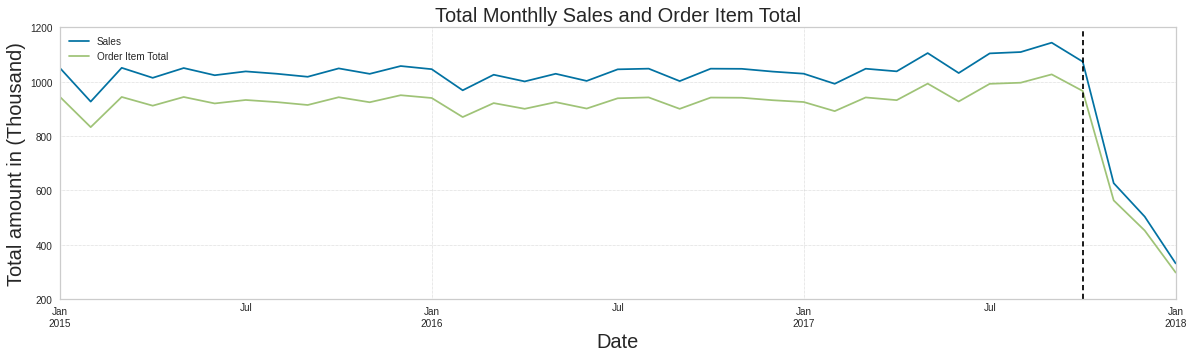

In [ ]:
# create the visualization of the date
grafik.groupby('order date')['Sales', 'Order Item Total'].sum().plot()
#fig = plt.figure(figsize=(20, 5)) #to set the figure size
plt.title('Total Monthlly Sales and Order Item Total', fontsize=20) # to set the chart title and its font size
plt.xlabel('Date', fontsize=20) # to set the axis title and its font size
plt.ylabel('Total amount in (Thousand)', fontsize=20)  # to set the axis title and its font size
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype (int))
plt.gcf().set_size_inches(20,5)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axvline(x = '2017-10-01',color = 'black', dashes = (3,2))

plt.show() # to show the chart

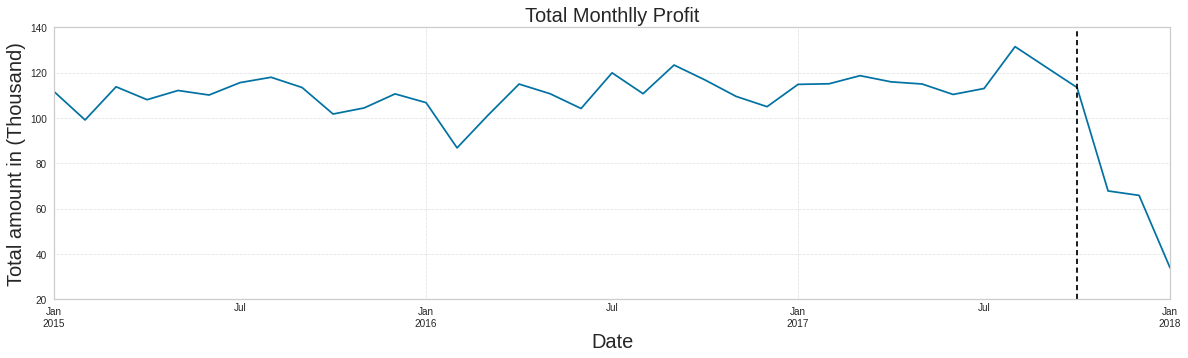

In [ ]:
# create the visualization of the date
grafik.groupby('order date')['Order Profit Per Order'].sum().plot()
#fig = plt.figure(figsize=(20, 5)) #to set the figure size
plt.title('Total Monthlly Profit', fontsize=20) # to set the chart title and its font size
plt.xlabel('Date', fontsize=20) # to set the axis title and its font size
plt.ylabel('Total amount in (Thousand)', fontsize=20)  # to set the axis title and its font size
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype (int))
plt.gcf().set_size_inches(20,5)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axvline(x = '2017-10-01',color = 'black', dashes = (3,2))
plt.show() # to show the chart

## How many Customers do we have in the data?

In [ ]:
CustomerSegment = df_dataset.copy()
CustomerSegment = df_dataset.groupby('Customer Segment')['Customer Id'].nunique().reset_index()
CustomerSegment

Customer Segment  Customer Id
0         Consumer        10695
1        Corporate         6239
2      Home Office         3718

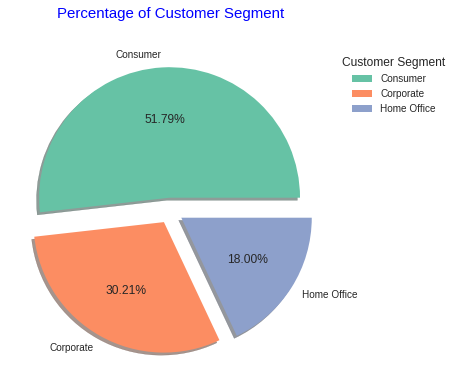

In [ ]:
#Fungsi
CustomerSegment = df_dataset.groupby('Customer Segment')['Customer Id'].nunique()
#Pie chart
labels = ['Consumer','Corporate','Home Office']
explode = (0.1, 0.1, 0.1)
colors = sns.color_palette('Set2')[0:4]
plt.figure(figsize=(6,6))
plt.pie(CustomerSegment, labels = labels, autopct='%1.2f%%', shadow=True, explode = explode, colors = colors)
plt.title('Percentage of Customer Segment', loc='center', pad=30, fontsize=15, color='blue')
plt.legend(bbox_to_anchor=(1,1), shadow = True, title = 'Customer Segment')
plt.show()

## Number Customer Divide by Customer State?

In [ ]:
#make data copy
State = df_dataset.copy()

# create new data frame to get the number of order
State = State.groupby('Customer State')['Customer Id'].agg('nunique').reset_index()

#State.columns = ['Customer State', 'Customer Id']
State.head()

Customer State  Customer Id
0          91732            1
1          95758            2
2             AL            6
3             AR           20
4             AZ          372

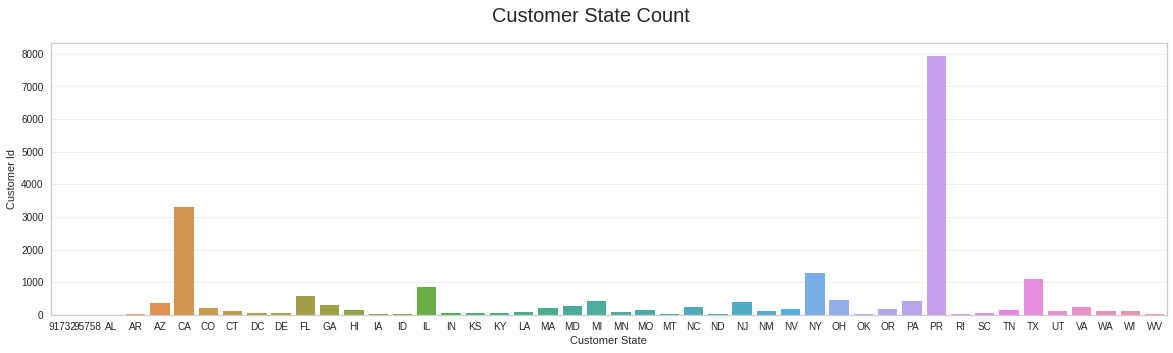

In [ ]:
#Customer State count
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Customer State Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.barplot(data=State, y='Customer Id', x="Customer State")
plt.show()

### buat top 5 bar chart 

## Category by users

In [ ]:
#make data copy
Category = df_dataset.copy()

# create new data frame to get the number of order
Category = Category.groupby('Category Name')['Customer Id'].agg('nunique').reset_index()
#Category.columns = ['Category Name', 'Customer Id']
Category

Category Name  Customer Id
0            Accessories         1634
1        As Seen on  TV!           68
2                  Baby           207
3    Baseball & Softball          608
4             Basketball           64
5                 Books           405
6           Boxing & MMA          413
7                   CDs           271
8               Cameras           592
9       Camping & Hiking         7788
10      Cardio Equipment         7486
11   Children's Clothing          652
12                Cleats        10049
13             Computers          442
14  Consumer Electronics          431
15                Crafts          484
16                  DVDs          483
17           Electronics         2707
18               Fishing         8759
19   Fitness Accessories          301
20                Garden          484
21        Girls' Apparel         1136
22          Golf Apparel          427
23     Golf Bags & Carts           61
24            Golf Balls         1364
25           Golf Gloves         1026
26            Golf Shoes          517
27     Health and Beauty          362
28                Hockey          591
29    Hunting & Shooting          433
30  Indoor/Outdoor Games         9134
31      Kids' Golf Clubs          365
32              Lacrosse          340
33        Men's Clothing          208
34        Men's Footwear         9717
35      Men's Golf Clubs          276
36                 Music          434
37          Pet Supplies          492
38         Shop By Sport         6935
39                Soccer          135
40        Sporting Goods          357
41     Strength Training          110
42      Tennis & Racquet          317
43                  Toys          529
44              Trade-In          916
45           Video Games          838
46          Water Sports         8281
47       Women's Apparel         9468
48      Women's Clothing          650
49    Women's Golf Clubs          178

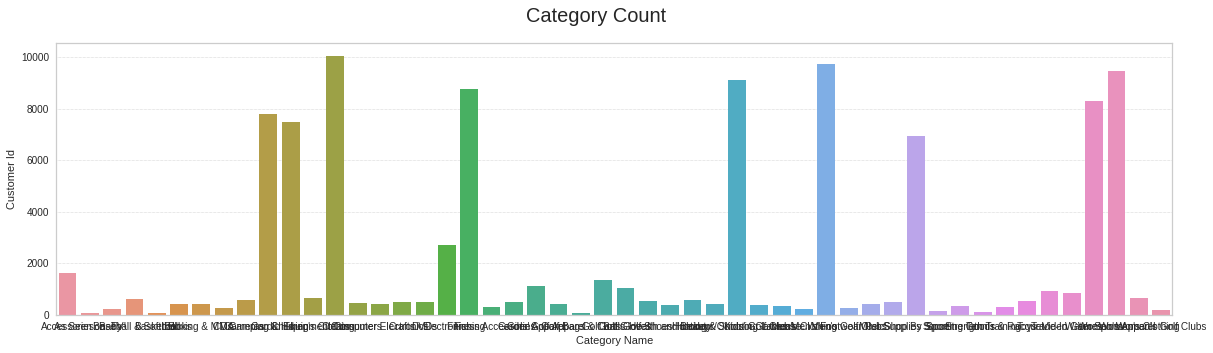

In [ ]:
#Customer State count
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Category Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.barplot(data=Category, y='Customer Id', x="Category Name")
plt.show()

### top 5 one dataset

## Ratio Delivery Status

In [ ]:
delivery = df_dataset.copy()
delivery = df_dataset.groupby('Delivery Status')['Customer Id'].agg('nunique').reset_index()
delivery

### buat grafik line chart per tahun

Delivery Status  Customer Id
0   Advance shipping        10096
1      Late delivery        16018
2  Shipping canceled         2633
3   Shipping on time         8412

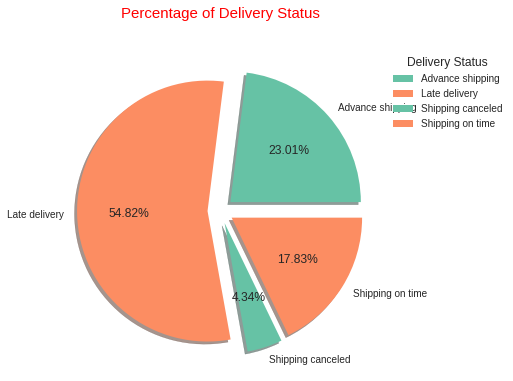

In [ ]:
delivery = df_dataset.copy()

#Fungsi
delivery = delivery.groupby('Delivery Status')['Order Id'].nunique()
#Pie chart
labels = ['Advance shipping', 'Late delivery','Shipping canceled','Shipping on time']
explode = (0.1, 0.1, 0.1, 0.1)
colors = sns.color_palette('Set2')[0:2]
plt.figure(figsize=(6,6))
plt.pie(delivery, labels = labels, autopct='%1.2f%%', shadow=True, explode = explode, colors = colors)
plt.title('Percentage of Delivery Status', loc='center', pad=30, fontsize=15, color='Red')
plt.legend(bbox_to_anchor=(1,1), shadow = True, title = 'Delivery Status')
plt.show()

# Analyst Clustering

## Make Duplicate Data for Clustering

In [ ]:
df_ori.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0              91.25         314.6400146  Advance shipping   
1       -249.0899963         311.3599854     Late delivery   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   

   Customer Zipcode  Department Id Department Name    Latitude    Longitude  \
0             725.0              2         Fitness  18.2514534 -66.03705597   
1             725.0              2         Fitness 18.27945137  -66.0370636   

         Market Order City Order Country  Order Customer Id  \
0  Pacific Asia     Bekasi     Indonesia              20755   
1  Pacific Asia    Bikaner         India              19492   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0           1/31/18 22:56     77202                    1360   
1           1/13/18 12:27     75939                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0          13.10999966               0.039999999         180517   
1          16.38999939               0.050000001         179254   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75              0.289999992                    1   
1                    327.75             -0.800000012                    1   

   Sales  Order Item Total  Order Profit Per Order    Order Region  \
0 327.75       314.6400146                   91.25  Southeast Asia   
1 327.75       311.3599854            -249.0899963      South Asia   

       Order State Order Status  Order Zipcode  Product Card Id  \
0  Java Occidental     COMPLETE            NaN             1360   
1         Rajastán      PENDING            NaN             1360   

   Product Category Id  Product Description  \
0                   73                  NaN   
1                   73                  NaN   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

   Product Status shipping date (DateOrders)   Shipping Mode  
0               0               2/3/18 22:56  Standard Class  
1               0              1/18/18 12:27  Standard Class

In [ ]:
df_dataset['Order Status'].value_counts()

COMPLETE           79107
PENDING            69863
PROCESSING         23795
SUSPECTED_FRAUD     4062
CANCELED            3692
Name: Order Status, dtype: int64

In [ ]:
#Make data clean copy
df2 = df_dataset.copy()
df2.head()

Type  Days for shipping  Days for shipment   Delivery Status  \
0     DEBIT                  3                  4  Advance shipping   
1  TRANSFER                  5                  4     Late delivery   
2      CASH                  4                  4  Shipping on time   
3     DEBIT                  3                  4  Advance shipping   
4   PAYMENT                  2                  4  Advance shipping   

    Category Name Customer City Customer Country Customer Id Customer Segment  \
0  Sporting Goods        Caguas      Puerto Rico       20755         Consumer   
1  Sporting Goods        Caguas      Puerto Rico       19492         Consumer   
2  Sporting Goods      San Jose          EE. UU.       19491         Consumer   
3  Sporting Goods   Los Angeles          EE. UU.       19490      Home Office   
4  Sporting Goods        Caguas      Puerto Rico       19489        Corporate   

  Customer State Department Name        Market  Order City Order Country  \
0             PR         Fitness  Pacific Asia      Bekasi     Indonesia   
1             PR         Fitness  Pacific Asia     Bikaner         India   
2             CA         Fitness  Pacific Asia     Bikaner         India   
3             CA         Fitness  Pacific Asia  Townsville     Australia   
4             PR         Fitness  Pacific Asia  Townsville     Australia   

           order date Order Id  Order Item Discount  Order Item Discount Rate  \
0 2018-01-31 22:56:00    77202          13.10999966               0.039999999   
1 2018-01-13 12:27:00    75939          16.38999939               0.050000001   
2 2018-01-13 12:06:00    75938          18.03000069               0.059999999   
3 2018-01-13 11:45:00    75937          22.94000053                      0.07   
4 2018-01-13 11:24:00    75936                 29.5               0.090000004   

  Order Item Id  Order Item Profit Ratio  Order Item Quantity  Sales  \
0        180517              0.289999992                    1 327.75   
1        179254             -0.800000012                    1 327.75   
2        179253             -0.800000012                    1 327.75   
3        179252              0.079999998                    1 327.75   
4        179251              0.449999988                    1 327.75   

   Order Item Total  Order Profit Per Order    Order Region      Order State  \
0       314.6400146                   91.25  Southeast Asia  Java Occidental   
1       311.3599854            -249.0899963      South Asia         Rajastán   
2       309.7200012            -247.7799988      South Asia         Rajastán   
3       304.8099976             22.86000061         Oceania       Queensland   
4            298.25             134.2100067         Oceania       Queensland   

  Order Status  Product Name  Product Price       shipping date  \
0     COMPLETE  Smart watch          327.75 2018-02-03 22:56:00   
1      PENDING  Smart watch          327.75 2018-01-18 12:27:00   
2     COMPLETE  Smart watch          327.75 2018-01-17 12:06:00   
3     COMPLETE  Smart watch          327.75 2018-01-16 11:45:00   
4      PENDING  Smart watch          327.75 2018-01-15 11:24:00   

    Shipping Mode  year    month        date  
0  Standard Class  2018  2018-01  2018-01-31  
1  Standard Class  2018  2018-01  2018-01-13  
2  Standard Class  2018  2018-01  2018-01-13  
3  Standard Class  2018  2018-01  2018-01-13  
4  Standard Class  2018  2018-01  2018-01-13

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Type                      180519 non-null  object        
 1   Days for shipping         180519 non-null  int64         
 2   Days for shipment         180519 non-null  int64         
 3   Delivery Status           180519 non-null  object        
 4   Category Name             180519 non-null  object        
 5   Customer City             180519 non-null  object        
 6   Customer Country          180519 non-null  object        
 7   Customer Id               180519 non-null  object        
 8   Customer Segment          180519 non-null  object        
 9   Customer State            180519 non-null  object        
 10  Department Name           180519 non-null  object        
 11  Market                    180519 non-null  object        
 12  Or

In [ ]:
# we create new dataset that contaions only numerical value
descstat = df_dataset.describe()                                                                                                                                                              # to seet the descriptive statistics for each variable
col_desc = ['Days for shipping','Days for shipment','Order Item Quantity',                                                                         # we determine the numerical column name for further needs
            'Order Item Discount','Order Item Discount Rate',
            'Order Item Profit Ratio','Sales','Order Item Total','Order Profit Per Order', 'Product Price']    
descstat.loc['skewness'] = df_dataset[col_desc].skew()                                                                                                                                        # to get the skewness value
descstat.loc['variance'] = df_dataset[col_desc].var()                                                                                                                                         # to get the kurtosis value

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format) # set the display of numbers so that they are not abbreviated
descstat = round(descstat,2)                          # set the display of numbers to be rounded to 2 digits after the comma
descstat

Days for shipping  Days for shipment  Order Item Discount  \
count             180,519.0          180,519.0            180,519.0   
mean                    3.5               2.93                20.66   
std                    1.62               1.37                 21.8   
min                     0.0                0.0                  0.0   
25%                     2.0                2.0                  5.4   
50%                     3.0                4.0                 14.0   
75%                     5.0                4.0                29.99   
max                     6.0                4.0                500.0   
skewness               0.08              -0.73                 3.04   
variance               2.64               1.89               475.28   

          Order Item Discount Rate  Order Item Profit Ratio  \
count                    180,519.0                180,519.0   
mean                           0.1                     0.12   
std                           0.07                     0.47   
min                            0.0                    -2.75   
25%                           0.04                     0.08   
50%                            0.1                     0.27   
75%                           0.16                     0.36   
max                           0.25                      0.5   
skewness                      0.34                    -2.89   
variance                       0.0                     0.22   

          Order Item Quantity     Sales  Order Item Total  \
count               180,519.0 180,519.0         180,519.0   
mean                     2.13    203.77            183.11   
std                      1.45    132.27            120.04   
min                       1.0      9.99              7.49   
25%                       1.0    119.98            104.38   
50%                       1.0    199.92            163.99   
75%                       3.0    299.95             247.4   
max                       5.0  1,999.99          1,939.99   
skewness                 0.88      2.88              2.89   
variance                 2.11 17,496.17         14,410.48   

          Order Profit Per Order  Product Price  
count                  180,519.0      180,519.0  
mean                       21.97         141.23  
std                       104.43         139.73  
min                    -4,274.98           9.99  
25%                          7.0           50.0  
50%                        31.52          59.99  
75%                         64.8         199.99  
max                        911.8       1,999.99  
skewness                   -4.74           3.19  
variance               10,906.36      19,525.17

In [ ]:
df2.drop(['Type','Days for shipping','Days for shipment','Delivery Status','Category Name','Customer Segment','Customer Country','Department Name','Market','Order City','Order Id','Order Item Discount Rate','Order Item Profit Ratio','Order Region','Order Status','Product Name','Product Price','shipping date','Shipping Mode'],axis=1,inplace=True)
df2

Customer City Customer Id Customer State Order Country  \
0             Caguas       20755             PR     Indonesia   
1             Caguas       19492             PR         India   
2           San Jose       19491             CA         India   
3        Los Angeles       19490             CA     Australia   
4             Caguas       19489             PR     Australia   
...              ...         ...            ...           ...   
180514      Brooklyn        1005             NY         China   
180515   Bakersfield        9141             CA         Japón   
180516       Bristol         291             CT     Australia   
180517        Caguas        2813             PR     Australia   
180518        Caguas        7547             PR         India   

                order date  Order Item Discount Order Item Id  \
0      2018-01-31 22:56:00          13.10999966        180517   
1      2018-01-13 12:27:00          16.38999939        179254   
2      2018-01-13 12:06:00          18.03000069        179253   
3      2018-01-13 11:45:00          22.94000053        179252   
4      2018-01-13 11:24:00                 29.5        179251   
...                    ...                  ...           ...   
180514 2016-01-16 03:40:00                  0.0         65177   
180515 2016-01-16 01:34:00                  4.0         65161   
180516 2016-01-15 21:00:00                  8.0         65129   
180517 2016-01-15 20:18:00                 12.0         65126   
180518 2016-01-15 18:54:00                 16.0         65113   

        Order Item Quantity      Sales  Order Item Total  \
0                         1     327.75       314.6400146   
1                         1     327.75       311.3599854   
2                         1     327.75       309.7200012   
3                         1     327.75       304.8099976   
4                         1     327.75            298.25   
...                     ...        ...               ...   
180514                    1 399.980011        399.980011   
180515                    1 399.980011        395.980011   
180516                    1 399.980011        391.980011   
180517                    1 399.980011        387.980011   
180518                    1 399.980011        383.980011   

        Order Profit Per Order        Order State  year    month        date  
0                        91.25    Java Occidental  2018  2018-01  2018-01-31  
1                 -249.0899963           Rajastán  2018  2018-01  2018-01-13  
2                 -247.7799988           Rajastán  2018  2018-01  2018-01-13  
3                  22.86000061         Queensland  2018  2018-01  2018-01-13  
4                  134.2100067         Queensland  2018  2018-01  2018-01-13  
...                        ...                ...   ...      ...         ...  
180514                    40.0           Shanghái  2016  2016-01  2016-01-16  
180515            -613.7700195              Osaka  2016  2016-01  2016-01-16  
180516             141.1100006  Australia del Sur  2016  2016-01  2016-01-15  
180517             186.2299957  Australia del Sur  2016  2016-01  2016-01-15  
180518             168.9499969         Tamil Nadu  2016  2016-01  2016-01-15  

[180519 rows x 15 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Customer City           180519 non-null  object        
 1   Customer Id             180519 non-null  object        
 2   Customer State          180519 non-null  object        
 3   Order Country           180519 non-null  object        
 4   order date              180519 non-null  datetime64[ns]
 5   Order Item Discount     180519 non-null  float64       
 6   Order Item Id           180519 non-null  object        
 7   Order Item Quantity     180519 non-null  int64         
 8   Sales                   180519 non-null  float64       
 9   Order Item Total        180519 non-null  float64       
 10  Order Profit Per Order  180519 non-null  float64       
 11  Order State             180519 non-null  object        
 12  year                    180519

In [ ]:
np.array(range(len(df2['order date'])))

array([     0,      1,      2, ..., 180516, 180517, 180518])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Customer City           180519 non-null  object        
 1   Customer Id             180519 non-null  object        
 2   Customer State          180519 non-null  object        
 3   Order Country           180519 non-null  object        
 4   order date              180519 non-null  datetime64[ns]
 5   Order Item Discount     180519 non-null  float64       
 6   Order Item Id           180519 non-null  object        
 7   Order Item Quantity     180519 non-null  int64         
 8   Sales                   180519 non-null  float64       
 9   Order Item Total        180519 non-null  float64       
 10  Order Profit Per Order  180519 non-null  float64       
 11  Order State             180519 non-null  object        
 12  year                    180519

In [ ]:
# df2['Customer Segment'].replace('Consumer', '1', inplace = True)
# df2['Customer Segment'].replace('Home Office', '2', inplace = True)
# df2['Customer Segment'].replace('Corporate', '3', inplace = True)

In [ ]:
Cluster1 = df2.groupby(['order date','Customer Id'])['Order Item Total','Order Item Discount','Sales','Order Profit Per Order'].sum().reset_index()
#Cluster1.columns = ['order date','Customer_id','total_amount','num_tx']
Cluster1['Customer Id'] = Cluster1['Customer Id'].astype(str)
Cluster1

<ipython-input-511-ef465b52c1a6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Cluster1 = df2.groupby(['order date','Customer Id'])['Order Item Total','Order Item Discount','Sales','Order Profit Per Order'].sum().reset_index()


order date Customer Id  Order Item Total  Order Item Discount  \
0     2015-01-01 00:00:00       11599       239.9799957                 60.0   
1     2015-01-01 00:21:00         256       529.3800049          50.60000038   
2     2015-01-01 01:03:00        8827      620.87001414          78.97999954   
3     2015-01-01 01:24:00       11318      987.07000722         142.78999901   
4     2015-01-01 02:06:00        4530 525.5200042499999         54.400000095   
...                   ...         ...               ...                  ...   
65747 2018-01-31 22:14:00       20753       161.8699951          53.95999908   
65748 2018-01-31 22:35:00       20754       172.6600037          43.15999985   
65749 2018-01-31 22:56:00       20755       314.6400146          13.10999966   
65750 2018-01-31 23:17:00       20756       10.90999985          0.629999995   
65751 2018-01-31 23:38:00       20757       34.97999954          4.769999981   

                  Sales  Order Profit Per Order  
0            299.980011             88.79000092  
1            579.980011            195.90000153  
2     699.8500099400001           124.089999675  
3        1,129.86003878           390.089995404  
4     579.9200134499999           203.929998354  
...                 ...                     ...  
65747       215.8200073            -107.9599991  
65748       215.8200073            -126.5599976  
65749            327.75                   91.25  
65750       11.53999996             1.529999971  
65751             39.75             9.789999962  

[65752 rows x 6 columns]

In [ ]:
Cluster1.drop(['order date'], axis=1, inplace=True)

In [ ]:
Cluster1 = Cluster1.groupby(['Customer Id']).sum().reset_index()

In [ ]:
Cluster1.drop(['Customer Id'], axis=1, inplace=True)

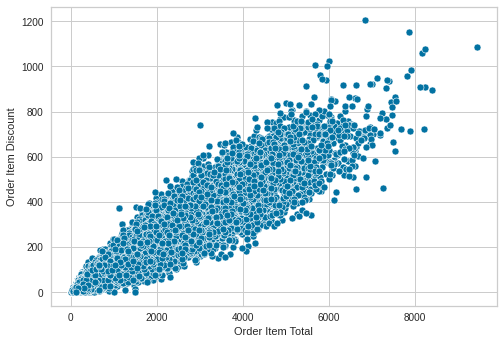

In [ ]:
sns.scatterplot(data = Cluster1, x = 'Order Item Total', y = 'Order Item Discount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6271fb83d0>,
      dtype=object)

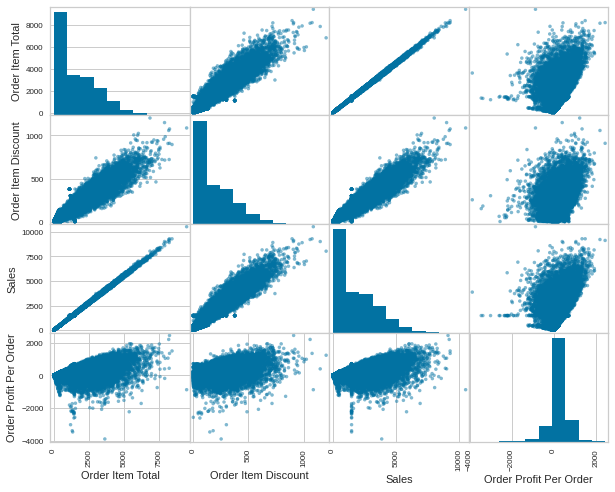

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(Cluster1, figsize = (10,8))

(array([6.155e+03, 2.340e+03, 6.980e+02, 1.014e+03, 1.403e+03, 1.160e+03,
        1.236e+03, 1.159e+03, 1.046e+03, 9.630e+02, 7.660e+02, 6.980e+02,
        5.180e+02, 4.320e+02, 2.970e+02, 2.290e+02, 1.730e+02, 1.090e+02,
        9.200e+01, 5.500e+01, 4.000e+01, 2.600e+01, 1.700e+01, 1.400e+01,
        2.000e+00, 5.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([8.47000027e+00, 3.22741337e+02, 6.37012673e+02, 9.51284009e+02,
        1.26555535e+03, 1.57982668e+03, 1.89409802e+03, 2.20836935e+03,
        2.52264069e+03, 2.83691203e+03, 3.15118336e+03, 3.46545470e+03,
        3.77972604e+03, 4.09399737e+03, 4.40826871e+03, 4.72254004e+03,
        5.03681138e+03, 5.35108272e+03, 5.66535405e+03, 5.97962539e+03,
        6.29389673e+03, 6.60816806e+03, 6.92243940e+03, 7.23671073e+03,
        7.55098207e+03, 7.86525341e+03, 8.17952474e+03, 8.49379608e+03,
        8.80806742e+03, 9.12233875e+03, 9.43661009e+03]),
 <a list of 30 Patch objects>)

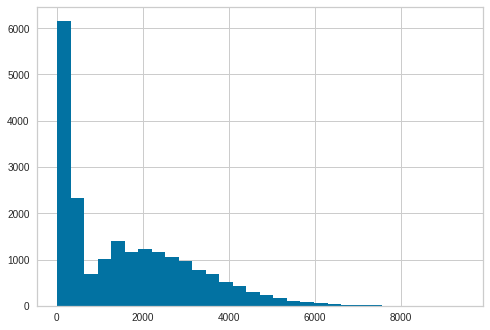

In [ ]:
plt.hist(Cluster1['Order Item Total'], bins=30)

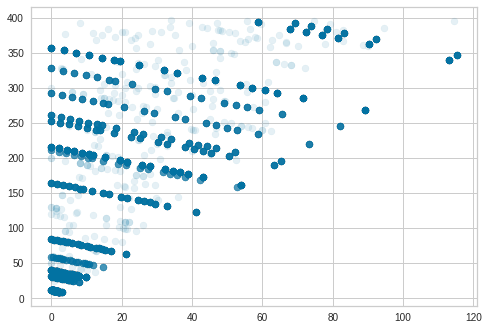

In [ ]:
plt.scatter(Cluster1[Cluster1['Order Item Total']< 395.9199982 ]['Order Item Discount'], Cluster1[Cluster1['Order Item Total']< 395.9199982 ]['Order Item Total'], alpha=0.1)
plt.show()

In [ ]:
# Initialize KMeans for 3 clusters
cluster_model = KMeans(n_clusters = 3, random_state = 42)
cluster_model

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Fit the data into model
cluster_model.fit(Cluster1)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Check up cluster label created by the KMeans
cluster_model.labels_

array([2, 2, 1, ..., 2, 0, 0], dtype=int32)

In [ ]:
Cluster1['cluster'] = cluster_model.labels_
Cluster1

Order Item Total  Order Item Discount               Sales  \
0             472.4500122                 27.5         499.9500122   
1          1,130.05000676         134.74000168      1,264.79001226   
2     3,803.0800627199997        301.490001203      4,104.57009122   
3          2,961.65005297        406.809999461      3,368.46006591   
4            614.17000582         45.700000048        659.87000658   
...                   ...                  ...                 ...   
20647      3,258.36001584   465.12999986799997      3,723.49002844   
20648      2,424.67002478        274.850000381 2,699.5200231999997   
20649   670.2200050399999         119.69000149   789.9100227399999   
20650       2,733.6800155        275.819998977      3,009.49005136   
20651 1,613.3099976199999        216.360001086      1,829.67002108   

       Order Profit Per Order  cluster  
0                 159.6900024        2  
1               -151.22000884        2  
2                404.10999781        1  
3               620.220005553        0  
4                72.119998873        2  
...                       ...      ...  
20647       592.7899952399999        1  
20648           389.880001148        0  
20649           299.130003031        2  
20650          -213.770001886        0  
20651       80.88000586100001        0  

[20652 rows x 5 columns]

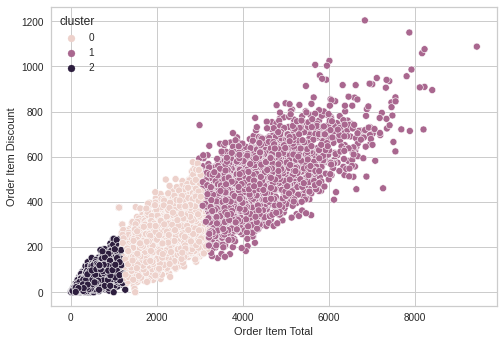

In [ ]:
# Let's re-look into data after clustering
# sns.scatterplot(x = 'Order Item Total', y = 'Order Item Discount', data=df2, hue='cluster')

sns.scatterplot(x = 'Order Item Total', y = 'Order Item Discount', data=Cluster1, hue='cluster')

In [ ]:
df2.head()

Customer City Customer Id Customer State Order Country          order date  \
0        Caguas       20755             PR     Indonesia 2018-01-31 22:56:00   
1        Caguas       19492             PR         India 2018-01-13 12:27:00   
2      San Jose       19491             CA         India 2018-01-13 12:06:00   
3   Los Angeles       19490             CA     Australia 2018-01-13 11:45:00   
4        Caguas       19489             PR     Australia 2018-01-13 11:24:00   

   Order Item Discount Order Item Id  Order Item Quantity  Sales  \
0          13.10999966        180517                    1 327.75   
1          16.38999939        179254                    1 327.75   
2          18.03000069        179253                    1 327.75   
3          22.94000053        179252                    1 327.75   
4                 29.5        179251                    1 327.75   

   Order Item Total  Order Profit Per Order      Order State  year    month  \
0       314.6400146                   91.25  Java Occidental  2018  2018-01   
1       311.3599854            -249.0899963         Rajastán  2018  2018-01   
2       309.7200012            -247.7799988         Rajastán  2018  2018-01   
3       304.8099976             22.86000061       Queensland  2018  2018-01   
4            298.25             134.2100067       Queensland  2018  2018-01   

         date  
0  2018-01-31  
1  2018-01-13  
2  2018-01-13  
3  2018-01-13  
4  2018-01-13

In [ ]:
Cluster1['cluster'].value_counts()

2    9929
0    7148
1    3575
Name: cluster, dtype: int64

In [ ]:
Cluster1.groupby('cluster').agg(['min','max','mean','count'])

Order Item Total                                           \
                     min            max                mean count   
cluster                                                             
0                1,125.0  3,266.0900345 2,100.3214751355404  7148   
1         2,987.15999974 9,436.61008833  4,145.649183081579  3575   
2            8.470000267        1,350.0   324.3638479636542  9929   

        Order Item Discount                                          \
                        min             max              mean count   
cluster                                                               
0                       0.0    575.93000126 237.7497637764502  7148   
1             151.099999905 1,203.630002673 465.5953710155838  3575   
2                       0.0           375.0 36.90599654927898  9929   

                 Sales                                               \
                   min                 max               mean count   
cluster                                                               
0        1,309.8100204 3,544.6600341999997 2,338.068415174869  7148   
1       3,394.57007598      10,524.1701776 4,611.239279138364  3575   
2          11.28999996             1,500.0  361.2691669644705  9929   

        Order Profit Per Order                                               
                           min                 max               mean count  
cluster                                                                      
0                     -2,592.0 1,159.7400069169998 246.30847823386557  7148  
1         -3,868.5599818130004     2,441.970003081  510.4621768222014  3575  
2                     -3,442.5       543.769993322  38.41149053231101  9929

In [ ]:
df_dataset.groupby('Department Name')['Sales'].agg(['min','mean','max']).reset_index()

Department Name         min               mean         max
0              Apparel 59.08000183  162.7873656319007  461.480011
1            Book Shop 31.07999992 31.079999920000002 31.07999992
2           Discs Shop 11.28999996 112.97518741779862 260.6499939
3             Fan Shop 11.53999996 255.96193505942924       495.0
4              Fitness        22.0  160.1657490425373 999.9899902
5             Footwear 27.98999977 275.83468280136043 1,999.98999
6                 Golf        25.0  138.7425720074678       350.0
7   Health and Beauty  293.0400085        293.0400085 293.0400085
8             Outdoors 9.989999771 129.39825003463412 599.9899902
9             Pet Shop 84.40000153        84.40000153 84.40000153
10          Technology 252.8800049   709.623868357611     1,500.0

In [ ]:
cluster3 = df2.groupby(['Customer Id'])['Order Item Quantity'].sum().reset_index().reset_index()
# cluster3.drop(['order date'], axis=1, inplace=True)
cluster3

index Customer Id  Order Item Quantity
0          0           1                    5
1          1          10                   27
2          2         100                   45
3          3        1000                   39
4          4       10000                    8
...      ...         ...                  ...
20647  20647        9995                   48
20648  20648        9996                   37
20649  20649        9997                    7
20650  20650        9998                   32
20651  20651        9999                   20

[20652 rows x 3 columns]

In [ ]:
Cluster4=Cluster1.reset_index()

In [ ]:
cluster_result=pd.merge(Cluster4,cluster3, on='index', how= 'left')
cluster_result

index    Order Item Total  Order Item Discount               Sales  \
0          0         472.4500122                 27.5         499.9500122   
1          1      1,130.05000676         134.74000168      1,264.79001226   
2          2 3,803.0800627199997        301.490001203      4,104.57009122   
3          3      2,961.65005297        406.809999461      3,368.46006591   
4          4        614.17000582         45.700000048        659.87000658   
...      ...                 ...                  ...                 ...   
20647  20647      3,258.36001584   465.12999986799997      3,723.49002844   
20648  20648      2,424.67002478        274.850000381 2,699.5200231999997   
20649  20649   670.2200050399999         119.69000149   789.9100227399999   
20650  20650       2,733.6800155        275.819998977      3,009.49005136   
20651  20651 1,613.3099976199999        216.360001086      1,829.67002108   

       Order Profit Per Order  cluster Customer Id  Order Item Quantity  
0                 159.6900024        2           1                    5  
1               -151.22000884        2          10                   27  
2                404.10999781        1         100                   45  
3               620.220005553        0        1000                   39  
4                72.119998873        2       10000                    8  
...                       ...      ...         ...                  ...  
20647       592.7899952399999        1        9995                   48  
20648           389.880001148        0        9996                   37  
20649           299.130003031        2        9997                    7  
20650          -213.770001886        0        9998                   32  
20651       80.88000586100001        0        9999                   20  

[20652 rows x 8 columns]

In [ ]:
cluster_item = cluster_result[['cluster','Customer Id']]
cluster_item

cluster Customer Id
0            2           1
1            2          10
2            1         100
3            0        1000
4            2       10000
...        ...         ...
20647        1        9995
20648        0        9996
20649        2        9997
20650        0        9998
20651        0        9999

[20652 rows x 2 columns]

In [ ]:
cluster_item.groupby(['Customer Id']).mean().reset_index()

Customer Id  cluster
0               1      2.0
1              10      2.0
2             100      1.0
3            1000      0.0
4           10000      2.0
...           ...      ...
20647        9995      1.0
20648        9996      0.0
20649        9997      2.0
20650        9998      0.0
20651        9999      0.0

[20652 rows x 2 columns]

In [ ]:
cluster7=pd.merge(df_dataset[['Customer Id','Order Item Quantity','Department Name','Category Name','Product Name']],
                  cluster_item.groupby(['Customer Id']).mean().reset_index(), 
                  on='Customer Id', how= 'left')
cluster7.head()

Customer Id  Order Item Quantity Department Name   Category Name  \
0       20755                    1         Fitness  Sporting Goods   
1       19492                    1         Fitness  Sporting Goods   
2       19491                    1         Fitness  Sporting Goods   
3       19490                    1         Fitness  Sporting Goods   
4       19489                    1         Fitness  Sporting Goods   

   Product Name  cluster  
0  Smart watch       2.0  
1  Smart watch       2.0  
2  Smart watch       2.0  
3  Smart watch       2.0  
4  Smart watch       2.0

In [ ]:
cluster7[cluster7['cluster']==0].groupby('Product Name')['Order Item Quantity'].sum().reset_index().sort_values(by='Order Item Quantity',ascending=False).head(10)

Product Name  Order Item Quantity
61               Perfect Fitness Perfect Rip Deck                35120
49           Nike Men's Dri-FIT Victory Golf Polo                30123
57               O'Brien Men's Neoprene Life Vest                28079
51              Nike Men's Free 5.0+ Running Shoe                16492
85  Under Armour Girls' Toddler Spine Surge Runni                15568
46        Nike Men's CJ Elite 2 TD Football Cleat                10879
19      Field & Stream Sportsman 16 Gun Fire Safe                 7746
60                    Pelican Sunstream 100 Kayak                 7565
16  Diamondback Women's Serene Classic Comfort Bi                 6233
47                     Nike Men's Comfort 2 Slide                  513

In [ ]:
cluster7[cluster7['cluster']==1].groupby('Product Name')['Order Item Quantity'].sum().reset_index().sort_values(by='Order Item Quantity',ascending=False).head(10)

Product Name  Order Item Quantity
60               Perfect Fitness Perfect Rip Deck                34465
48           Nike Men's Dri-FIT Victory Golf Polo                29088
56               O'Brien Men's Neoprene Life Vest                26461
50              Nike Men's Free 5.0+ Running Shoe                18621
85  Under Armour Girls' Toddler Spine Surge Runni                14090
45        Nike Men's CJ Elite 2 TD Football Cleat                 9891
18      Field & Stream Sportsman 16 Gun Fire Safe                 8940
59                    Pelican Sunstream 100 Kayak                 7080
15  Diamondback Women's Serene Classic Comfort Bi                 6824
98  adidas Youth Germany Black/Red Away Match Soc                  489

In [ ]:
cluster7[cluster7['cluster']==2].groupby('Product Name')['Order Item Quantity'].sum().reset_index().sort_values(by='Order Item Quantity',ascending=False).head(10)

Product Name  Order Item Quantity
67               Perfect Fitness Perfect Rip Deck                 4113
55           Nike Men's Dri-FIT Victory Golf Polo                 3745
63               O'Brien Men's Neoprene Life Vest                 3263
94  Under Armour Girls' Toddler Spine Surge Runni                 2077
57              Nike Men's Free 5.0+ Running Shoe                 1567
52        Nike Men's CJ Elite 2 TD Football Cleat                 1476
66                    Pelican Sunstream 100 Kayak                  855
22                           Fighting video games                  838
18  Diamondback Women's Serene Classic Comfort Bi                  672
9                              Children's heaters                  652

In [ ]:
cluster7[cluster7['cluster']==0].groupby('Product Name')['Order Item Quantity'].sum().reset_index()


Product Name  Order Item Quantity
0                         Bag Boy Beverage Holder                  376
1                          Bag Boy M330 Push Cart                  111
2               Bowflex SelectTech 1090 Dumbbells                    7
3   Bridgestone e6 Straight Distance NFL Carolina                  480
4   Bridgestone e6 Straight Distance NFL San Dieg                  387
..                                            ...                  ...
95          adidas Kids' F5 Messi FG Soccer Cleat                  391
96     adidas Men's F10 Messi TRX FG Soccer Cleat                  433
97      adidas Men's Germany Black Crest Away Tee                  385
98  adidas Youth Germany Black/Red Away Match Soc                  425
99               insta-bed Neverflat Air Mattress                   29

[100 rows x 2 columns]

In [ ]:
df_dataset['Order Status'].value_counts()

COMPLETE           79107
PENDING            69863
PROCESSING         23795
SUSPECTED_FRAUD     4062
CANCELED            3692
Name: Order Status, dtype: int64

In [ ]:
cluster5 = cluster_result.groupby('cluster').agg(
    profit=('Order Profit Per Order','sum'),
    # cost=('cost','sum'),
    hrg_barang=('Order Item Total','sum'),
    population=('Order Item Total','count'),
    quantity=('Order Item Quantity','sum')
)

In [ ]:
cluster5['hrg_barang/population']= cluster5['hrg_barang'] / cluster5['population']
cluster5

profit           hrg_barang  population  quantity  \
cluster                                                                  
0       1,760,613.002415671 15,013,097.904268844        7148    179523   
1        1,824,902.28213937 14,820,695.829516647        3575    175308   
2         381,387.689495316  3,220,608.646431123        9929     29248   

         hrg_barang/population  
cluster                         
0          2,100.3214751355404  
1           4,145.649183081579  
2            324.3638479636542

In [ ]:
cluster5['hrg_barang/quantity']= cluster5['hrg_barang'] / cluster5['quantity']
cluster5

profit           hrg_barang  population  quantity  \
cluster                                                                  
0       1,760,613.002415671 15,013,097.904268844        7148    179523   
1        1,824,902.28213937 14,820,695.829516647        3575    175308   
2         381,387.689495316  3,220,608.646431123        9929     29248   

         hrg_barang/population  hrg_barang/quantity  
cluster                                              
0          2,100.3214751355404    83.62771290736477  
1           4,145.649183081579    84.54089847306824  
2            324.3638479636542   110.11380765970743

In [ ]:
Cluster1

Order Item Total  Order Item Discount               Sales  \
0             472.4500122                 27.5         499.9500122   
1          1,130.05000676         134.74000168      1,264.79001226   
2     3,803.0800627199997        301.490001203      4,104.57009122   
3          2,961.65005297        406.809999461      3,368.46006591   
4            614.17000582         45.700000048        659.87000658   
...                   ...                  ...                 ...   
20647      3,258.36001584   465.12999986799997      3,723.49002844   
20648      2,424.67002478        274.850000381 2,699.5200231999997   
20649   670.2200050399999         119.69000149   789.9100227399999   
20650       2,733.6800155        275.819998977      3,009.49005136   
20651 1,613.3099976199999        216.360001086      1,829.67002108   

       Order Profit Per Order  cluster  
0                 159.6900024        2  
1               -151.22000884        2  
2                404.10999781        1  
3               620.220005553        0  
4                72.119998873        2  
...                       ...      ...  
20647       592.7899952399999        1  
20648           389.880001148        0  
20649           299.130003031        2  
20650          -213.770001886        0  
20651       80.88000586100001        0  

[20652 rows x 5 columns]

In [ ]:
Cluster1['cluster'].replace('0', 'Affordable Goods', inplace = True)
Cluster1['cluster'].replace('1', 'Luxury Goods', inplace = True)
Cluster1['cluster'].replace('2', 'Middle Goods', inplace = True)

In [ ]:
cluster_cost = Cluster1.copy()
cluster_cost['cost'] = Cluster1['Order Item Total'] - Cluster1 ['Order Profit Per Order']
# cluster_cost.groupby('cluster')['Customer Id','cost'].agg('mean').reset_index()
cluster_cost

Order Item Total  Order Item Discount               Sales  \
0             472.4500122                 27.5         499.9500122   
1          1,130.05000676         134.74000168      1,264.79001226   
2     3,803.0800627199997        301.490001203      4,104.57009122   
3          2,961.65005297        406.809999461      3,368.46006591   
4            614.17000582         45.700000048        659.87000658   
...                   ...                  ...                 ...   
20647      3,258.36001584   465.12999986799997      3,723.49002844   
20648      2,424.67002478        274.850000381 2,699.5200231999997   
20649   670.2200050399999         119.69000149   789.9100227399999   
20650       2,733.6800155        275.819998977      3,009.49005136   
20651 1,613.3099976199999        216.360001086      1,829.67002108   

       Order Profit Per Order  cluster                cost  
0                 159.6900024        2  312.76000980000003  
1               -151.22000884        2       1,281.2700156  
2                404.10999781        1 3,398.9700649099996  
3               620.220005553        0 2,341.4300474170004  
4                72.119998873        2       542.050006947  
...                       ...      ...                 ...  
20647       592.7899952399999        1       2,665.5700206  
20648           389.880001148        0     2,034.790023632  
20649           299.130003031        2  371.09000200899993  
20650          -213.770001886        0     2,947.450017386  
20651       80.88000586100001        0     1,532.429991759  

[20652 rows x 6 columns]

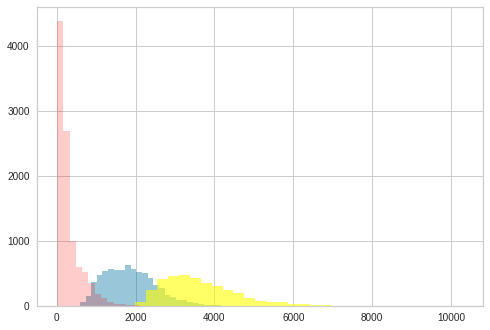

In [ ]:
plt.hist(cluster_cost[cluster_cost['cluster']== 0]['cost'], bins=30, alpha=0.4)
plt.hist(cluster_cost[cluster_cost['cluster']== 1]['cost'], bins=30, color='yellow', alpha=0.6)
plt.hist(cluster_cost[cluster_cost['cluster']== 2]['cost'], bins=30, color='red', alpha=0.2)
plt.show()

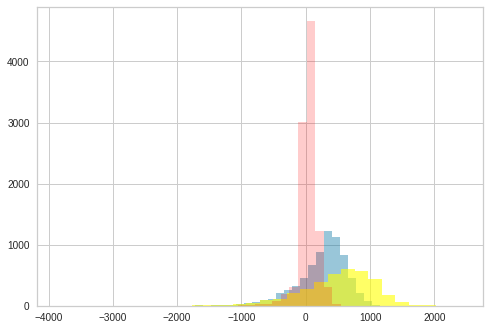

In [ ]:
plt.hist(cluster_cost[cluster_cost['cluster']== 0]['Order Profit Per Order'], bins=30, alpha=0.4)
plt.hist(cluster_cost[cluster_cost['cluster']== 1]['Order Profit Per Order'], bins=30, color='yellow', alpha=0.6)
plt.hist(cluster_cost[cluster_cost['cluster']== 2]['Order Profit Per Order'], bins=30, color='red', alpha=0.2)
plt.show()

In [ ]:
cluster2 = cluster_cost.groupby('cluster').agg(
    profit=('Order Profit Per Order','sum'),
    cost=('cost','sum'),
    item_total=('Order Item Total','sum'),
    population=('Order Item Total','count')
)

In [ ]:
cluster2['% profit']= cluster2['profit'] / cluster2['item_total']
cluster2

profit                 cost           item_total  \
cluster                                                                 
0       1,760,613.002415671 13,252,484.901853172 15,013,097.904268844   
1        1,824,902.28213937 12,995,793.547377277 14,820,695.829516647   
2         381,387.689495316  2,839,220.956935807  3,220,608.646431123   

         population            % profit  
cluster                                  
0              7148 0.11727179917444328  
1              3575  0.1231320245102747  
2              9929 0.11842099781913769

In [ ]:
cluster5

profit           hrg_barang  population  quantity  \
cluster                                                                  
0       1,760,613.002415671 15,013,097.904268844        7148    179523   
1        1,824,902.28213937 14,820,695.829516647        3575    175308   
2         381,387.689495316  3,220,608.646431123        9929     29248   

         hrg_barang/population  hrg_barang/quantity  
cluster                                              
0          2,100.3214751355404    83.62771290736477  
1           4,145.649183081579    84.54089847306824  
2            324.3638479636542   110.11380765970743

In [ ]:
cluster2['profit/population']= cluster2['profit'] / cluster2['population']
cluster2

profit                 cost           item_total  \
cluster                                                                 
0       1,760,613.002415671 13,252,484.901853172 15,013,097.904268844   
1        1,824,902.28213937 12,995,793.547377277 14,820,695.829516647   
2         381,387.689495316  2,839,220.956935807  3,220,608.646431123   

         population            % profit  profit/population  
cluster                                                     
0              7148 0.11727179917444328 246.30847823386557  
1              3575  0.1231320245102747  510.4621768222014  
2              9929 0.11842099781913769  38.41149053231101

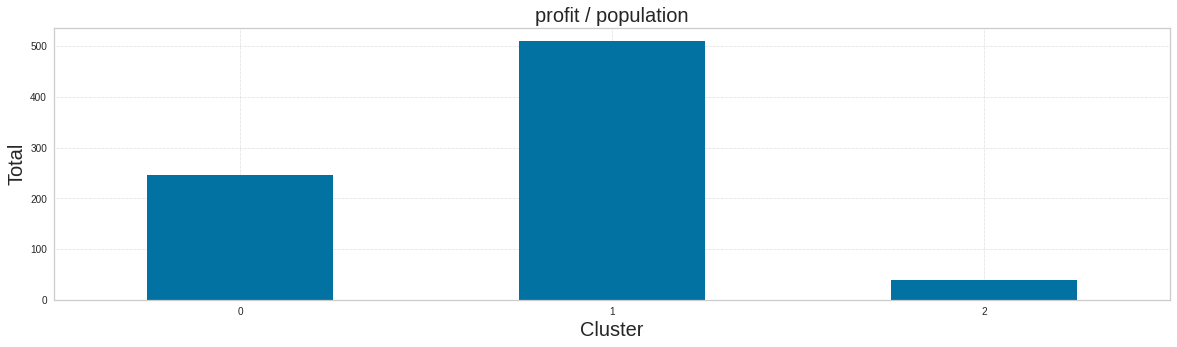

In [ ]:
# create the visualization of the date
cluster2.groupby(['cluster'])['profit/population'].sum().plot(kind = 'bar')
#fig = plt.figure(figsize=(20, 5)) #to set the figure size
plt.title('profit / population', fontsize=20) # to set the chart title and its font size
plt.xlabel('Cluster', fontsize=20) # to set the axis title and its font size
plt.ylabel('Total', fontsize=20)  # to set the axis title and its font size
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation=0)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show() # to show the chart

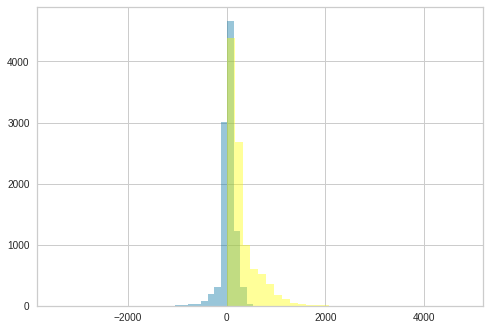

In [ ]:
plt.hist(cluster_cost[cluster_cost['cluster']== 2]['Order Profit Per Order'], bins=30, alpha=0.4)
plt.hist(cluster_cost[cluster_cost['cluster']== 2]['cost'], bins=30, alpha=0.4, color='yellow')
# plt.hist(cluster_cost[cluster_cost['cluster']== 1]['Order Profit Per Order'], bins=30, color='yellow', alpha=0.6)
# plt.hist(cluster_cost[cluster_cost['cluster']== 2]['Order Profit Per Order'], bins=30, color='red', alpha=0.2)
plt.show()

## Elbow Method

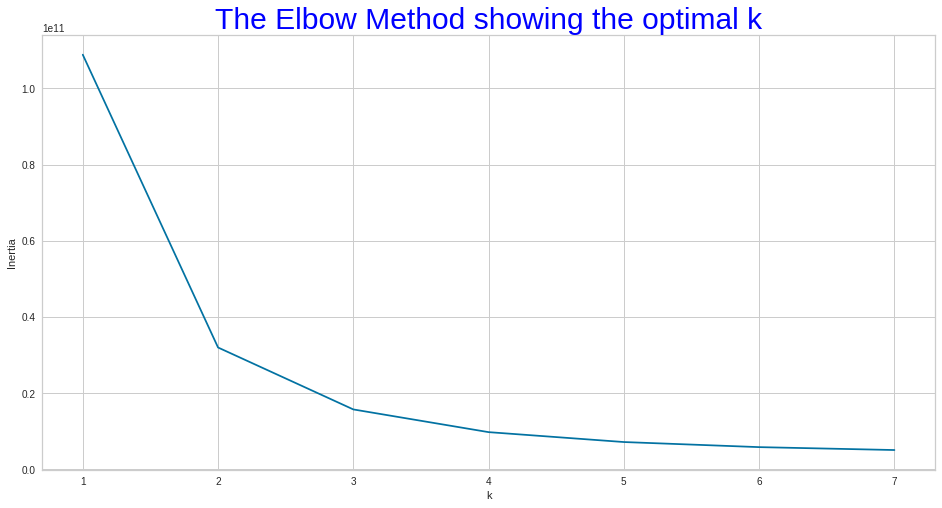

[108868006581.55742, 32006102524.439964, 15750189737.278706, 9790408556.099499, 7192759099.762575, 5856715772.807249, 5093792192.444983]


In [ ]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++')
    kmeanModel.fit(Cluster1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k', fontsize = 30, color = 'Blue' )
plt.show()
print(distortions)

***Based on the value of the elbow method, the best number of clusters is in the range of 3-4 clusters. To be more precise we use the silhouette method.***

## Silhouette Method

In [ ]:
#import silhouette
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import cluster 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=300, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=300,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.628339161480829
For n_clusters = 3 The average silhouette_score is : 0.6110281685344802
For n_clusters = 4 The average silhouette_score is : 0.5985309993121559
For n_clusters = 5 The average silhouette_score is : 0.5787253334445145


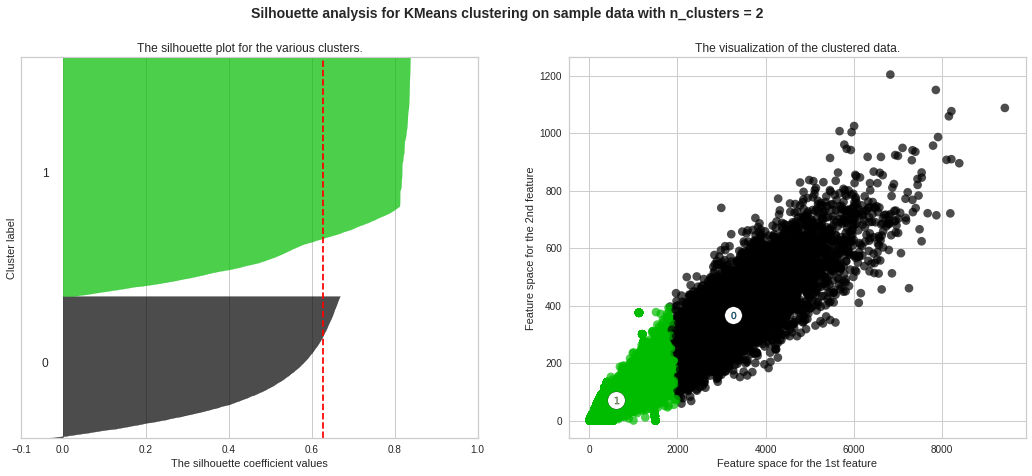

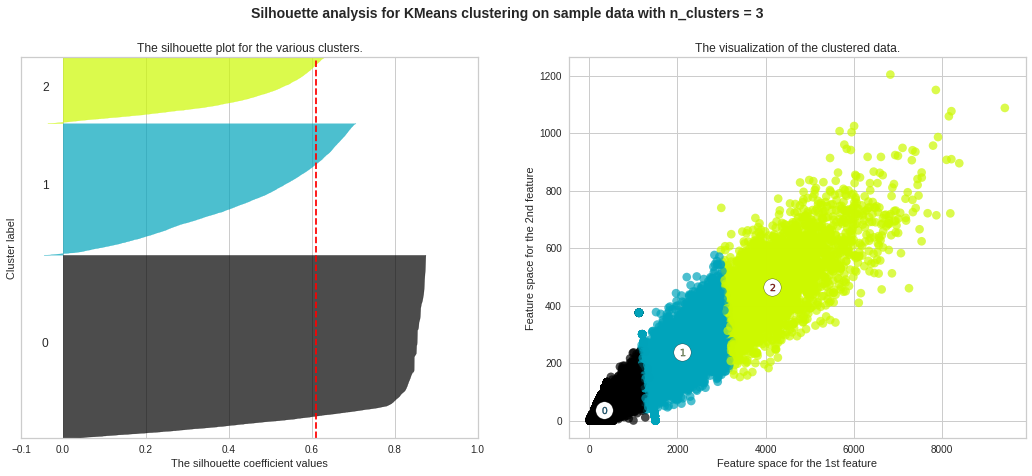

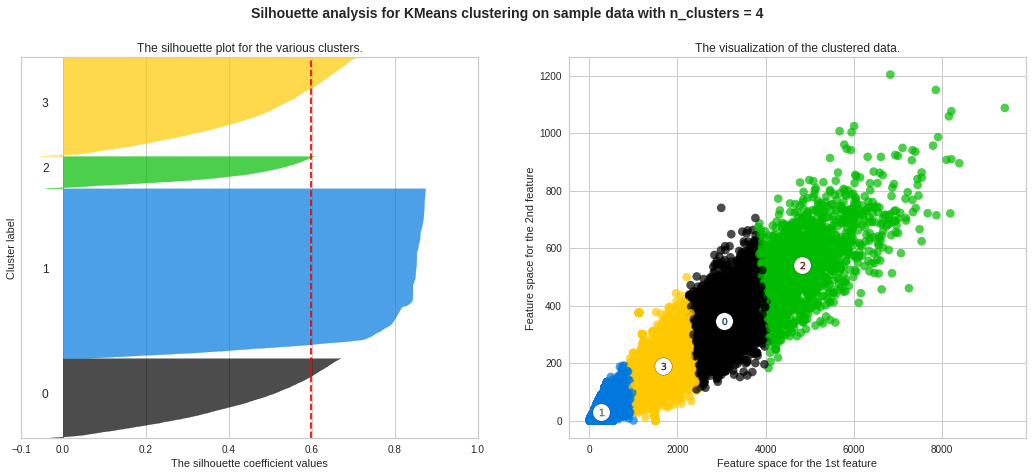

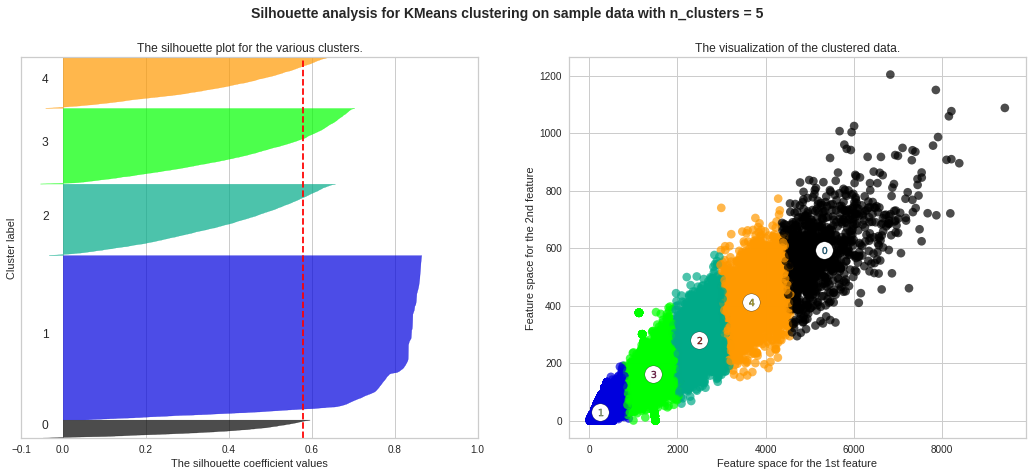

In [ ]:
silhoutte_analysis(Cluster1,list(range(2,6)))

In [ ]:
cluster_result1 = Cluster1.copy()
cluster_model = KMeans(n_clusters= 3, init = 'k-means++')
cluster_model.fit_predict(cluster_result1)
cluster_label = cluster_model.labels_
cluster_result1['cluster'] = cluster_label

In [ ]:
cluster_result1

Order Item Total  Order Item Discount               Sales  \
0             472.4500122                 27.5         499.9500122   
1          1,130.05000676         134.74000168      1,264.79001226   
2     3,803.0800627199997        301.490001203      4,104.57009122   
3          2,961.65005297        406.809999461      3,368.46006591   
4            614.17000582         45.700000048        659.87000658   
...                   ...                  ...                 ...   
20647      3,258.36001584   465.12999986799997      3,723.49002844   
20648      2,424.67002478        274.850000381 2,699.5200231999997   
20649   670.2200050399999         119.69000149   789.9100227399999   
20650       2,733.6800155        275.819998977      3,009.49005136   
20651 1,613.3099976199999        216.360001086      1,829.67002108   

       Order Profit Per Order  cluster  
0                 159.6900024        2  
1               -151.22000884        2  
2                404.10999781        1  
3               620.220005553        0  
4                72.119998873        2  
...                       ...      ...  
20647       592.7899952399999        1  
20648           389.880001148        0  
20649           299.130003031        2  
20650          -213.770001886        0  
20651       80.88000586100001        0  

[20652 rows x 5 columns]

In [ ]:
# Aggregating by cluster
cluster_result1.groupby(['cluster']).agg(['mean','min','max','count'])

Order Item Total                                      \
                      mean            min            max count   
cluster                                                          
0       2,101.773673849887        1,125.0  3,266.0900345  7149   
1       4,147.394051377141 2,987.15999974 9,436.61008833  3569   
2       324.82112104879735    8.470000267        1,350.0  9934   

        Order Item Discount                                      \
                       mean           min             max count   
cluster                                                           
0        237.94763903688263           0.0    575.93000126  7149   
1        465.76666611975537 151.099999905 1,203.630002673  3569   
2        36.940758982936174           0.0           375.0  9934   

                     Sales                                           \
                      mean            min                 max count   
cluster                                                               
0       2,339.718488159935  1,309.8100204 3,544.6600341999997  7149   
1       4,613.155436425035 3,394.57007598      10,524.1701776  3569   
2        361.7612028310366    11.28999996             1,500.0  9934   

        Order Profit Per Order                                                 
                          mean                  min                 max count  
cluster                                                                        
0            246.6482658315559             -2,592.0 1,159.7400069169998  7149  
1            510.4246853813844 -3,868.5599818130004     2,441.970003081  3569  
2            38.44461641779777             -3,442.5       543.769993322  9934

# RFM Segmentation

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# RFM Analysis
# source: https://www.putler.com/rfm-analysis/

from pandasql import sqldf
pysqldfX = lambda q,ctx: sqldf(q, ctx)

In [ ]:
import pandas as pd

class RFM():
  def __init__(self, 
        id_colname:str = 'id', 
        recency_colname:str = 'recency', 
        frequency_colname:str = 'frequency', 
        monetary_colname:str = 'monetary',
        num_cluster:int = 5
    ):

    self.id_colname = id_colname;
    self.recency_colname = recency_colname;
    self.frequency_colname = frequency_colname;
    self.monetary_colname = monetary_colname;
    self.num_cluster = num_cluster;

    #------------------------------------------
    self.dict_rfm_reference = {
      "Champions":{
        "Segment":"Champions",
        "Activity":"Bought recently, buy often and spend the most!",
        "Actionable":"Reward them. Can be early adopters for new products. Will promote your brand."
      },
      "Loyal Customers":{
        "Segment":"Loyal Customers",
        "Activity":"Spend good money with us often. Responsive to promotions.",
        "Actionable":"Upsell higher value products. Ask for reviews. Engage them."
      },
      "Potential Loyalist":{
        "Segment":"Potential Loyalist",
        "Activity":"Recent customers, but spent a good amount and bought more than once.",
        "Actionable":"Offer membership / loyalty program, recommend other products."
      },
      "Recent Customers":{
        "Segment":"Recent Customers",
        "Activity":"Bought most recently, but not often.",
        "Actionable":"Provide on-boarding support, give them early success, start building relationship."
      },
      "Promising":{
        "Segment":"Promising",
        "Activity":"Recent shoppers, but haven’t spent much.",
        "Actionable":"Create brand awareness, offer free trials"
      },
      "Customers Needing Attention":{
        "Segment":"Customers Needing Attention",
        "Activity":"Above average recency, frequency and monetary values. May not have bought very recently though.",
        "Actionable":"Make limited time offers, Recommend based on past purchases. Reactivate them."
      },
      "About To Sleep":{
        "Segment":"About To Sleep",
        "Activity":"Below average recency, frequency and monetary values. Will lose them if not reactivated.",
        "Actionable":"Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
      },
      "At Risk":{
        "Segment":"At Risk",
        "Activity":"Spent big money and purchased often. But long time ago. Need to bring them back!",
        "Actionable":"Send personalized emails to reconnect, offer renewals, provide helpful resources."
      },
      "Can’t Lose Them":{
        "Segment":"Can’t Lose Them",
        "Activity":"Made biggest purchases, and often. But haven’t returned for a long time.",
        "Actionable":"Win them back via renewals or newer products, don’t lose them to competition, talk to them."
      },
      "Hibernating":{
        "Segment":"Hibernating",
        "Activity":"Last purchase was long back, low spenders and low number of orders.",
        "Actionable":"Offer other relevant products and special discounts. Recreate brand value."
      },
      "Lost":{
        "Segment":"Lost",
        "Activity":"Lowest recency, frequency and monetary scores.",
        "Actionable":"Revive interest with reach out campaign, ignore otherwise."
      }
    };

    _segments = {
      "Champions":[555, 554, 544, 545, 454, 455, 445],
      "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335],
      "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
      "Recent Customers":[512, 511, 422, 421, 412, 411, 311],
      "Promising":[525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
      "Customers Needing Attention":[535, 534, 443, 434, 343, 334, 325, 324],
      "About To Sleep":[331, 321, 312, 221, 213],
      "At Risk":[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
      "Can’t Lose Them":[155, 154, 144, 214,215,115, 114, 113],
      "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
      "Lost":[111, 112, 121, 131,141,151]
    }

    self.df_rfm_segmentation = {};
    for _segment in _segments.keys():
      for _rfm_score in _segments[_segment]:
        self.df_rfm_segmentation[str(_rfm_score)] = self.dict_rfm_reference[_segment];

    #------------------------------------------
    self.df_recency_model = None;
    self.df_frequency_model = None;
    self.df_monetary_model = None;
  
  def __get_rfm_dataset_query__(self)->str:
    return f"""
      select 
        "{self.id_colname}" as id, 
        "{self.recency_colname}" as recency,
        "{self.frequency_colname}" as frequency,
        "{self.monetary_colname}" as monetary 
      from df
    """;

  def extract_dataset(self,df_x):
    #step 0: extract the dataset
    str_query = self.__get_rfm_dataset_query__();
    df_rfm_dataset = pysqldfX(str_query,{"df":df_x});
    return df_rfm_dataset;

  def get_feature_clusters(self, df_rfm_dataset) -> pd.DataFrame:
    df_rfm_dataset['recency_score'] = self.num_cluster - pd.qcut(
        x=df_rfm_dataset['recency'].values,
        q=self.num_cluster, labels = False, duplicates='raise'
    );
    df_rfm_dataset['frequency_score'] = pd.qcut(
        x=df_rfm_dataset['frequency'].values,
        q=self.num_cluster, labels = False, duplicates='raise'
    )+1;
    df_rfm_dataset['monetary_score'] = pd.qcut(
        x=df_rfm_dataset['monetary'].values,
        q=self.num_cluster, labels = False, duplicates='raise'
    )+1;
    self.df_recency_model = pysqldfX("""
      select 'recency' as label, recency_score as score, min(recency) as min, max(recency) as max 
      from df group by recency_score order by recency_score desc
    """,{"df":df_rfm_dataset});
    self.df_frequency_model = pysqldfX("""
      select 'frequency' as label, frequency_score as score, min(frequency) as min, max(frequency) as max 
      from df group by frequency_score order by frequency_score asc
    """,{"df":df_rfm_dataset});
    self.df_monetary_model = pysqldfX("""
      select 'monetary' as label, monetary_score as score, min(monetary) as min, max(monetary) as max 
      from df group by monetary_score order by monetary_score asc
    """,{"df":df_rfm_dataset});

  def generate_sql_model(self, df_x):
    label = df_x['label'].unique()[0];
    _cache = [];
    row_counts = df_x.shape[0];
    for i in range(0, row_counts):
      if(i+1<row_counts):
        _cache.append(f"""when {label} <= {df_x['max'][i]} then {df_x['score'][i]}""");
      else:
        _cache.append(f"""when {label} > {df_x['max'][i-1]} then {df_x['score'][i]}""");
    _str = "\n".join(_cache);
    return f"""(case {_str} end) as {label}_score""";

  def score(self, df_x) -> pd.DataFrame:
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    str_query = f"""
      with tmp as (
        select df.*,
          {self.generate_sql_model(self.df_recency_model)},
          {self.generate_sql_model(self.df_frequency_model)},
          {self.generate_sql_model(self.df_monetary_model)}
        from df
      )
      select tmp.*, (recency_score||frequency_score||monetary_score) as rfm_score
      from tmp
    """;
    return pysqldfX(str_query,{"df":df_rfm_dataset});

  def label_samples(self, df_rfm_feature_scored) -> pd.DataFrame:
    label_ref = [];
    for i in range(0,df_rfm_feature_scored.shape[0]):
      label_ref.append(
          self.df_rfm_segmentation[str(df_rfm_feature_scored['rfm_score'][i])]
      );
    return pd.concat([df_rfm_feature_scored, pd.DataFrame(label_ref)],axis=1);

  def fit(self, df_x):
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    #step 1: divide each RFM feature into n buckets
    df_rfm_dataset = self.get_feature_clusters(df_rfm_dataset);

  def transform(self, df_x) -> pd.DataFrame:
    #step 2: score each feature based on model
    df_rfm_feature_scored = self.score(df_x);

    #step 3: map each row with their reference table
    df_rfm_feature_labeled = self.label_samples(df_rfm_feature_scored);

    return df_rfm_feature_labeled;

  def fit_transform(self, df_x: pd.DataFrame) -> pd.DataFrame :
    self.fit(df_x);
    return self.transform(df_x);

In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Type                      180519 non-null  object        
 1   Days for shipping         180519 non-null  int64         
 2   Days for shipment         180519 non-null  int64         
 3   Delivery Status           180519 non-null  object        
 4   Category Name             180519 non-null  object        
 5   Customer City             180519 non-null  object        
 6   Customer Country          180519 non-null  object        
 7   Customer Id               180519 non-null  object        
 8   Customer Segment          180519 non-null  object        
 9   Customer State            180519 non-null  object        
 10  Department Name           180519 non-null  object        
 11  Market                    180519 non-null  object        
 12  Or

In [ ]:
df_dataset.head(2)

Type  Days for shipping  Days for shipment   Delivery Status  \
0     DEBIT                  3                  4  Advance shipping   
1  TRANSFER                  5                  4     Late delivery   

    Category Name Customer City Customer Country Customer Id Customer Segment  \
0  Sporting Goods        Caguas      Puerto Rico       20755         Consumer   
1  Sporting Goods        Caguas      Puerto Rico       19492         Consumer   

  Customer State Department Name        Market Order City Order Country  \
0             PR         Fitness  Pacific Asia     Bekasi     Indonesia   
1             PR         Fitness  Pacific Asia    Bikaner         India   

           order date Order Id  Order Item Discount  Order Item Discount Rate  \
0 2018-01-31 22:56:00    77202          13.10999966               0.039999999   
1 2018-01-13 12:27:00    75939          16.38999939               0.050000001   

  Order Item Id  Order Item Profit Ratio  Order Item Quantity  Sales  \
0        180517              0.289999992                    1 327.75   
1        179254             -0.800000012                    1 327.75   

   Order Item Total  Order Profit Per Order    Order Region      Order State  \
0       314.6400146                   91.25  Southeast Asia  Java Occidental   
1       311.3599854            -249.0899963      South Asia         Rajastán   

  Order Status  Product Name  Product Price       shipping date  \
0     COMPLETE  Smart watch          327.75 2018-02-03 22:56:00   
1      PENDING  Smart watch          327.75 2018-01-18 12:27:00   

    Shipping Mode  year    month        date  
0  Standard Class  2018  2018-01  2018-01-31  
1  Standard Class  2018  2018-01  2018-01-13

In [ ]:
df_dataset.groupby(['order date','Customer Id'])['Type'].count()

order date           Customer Id
2015-01-01 00:00:00  11599          1
2015-01-01 00:21:00  256            3
2015-01-01 01:03:00  8827           4
2015-01-01 01:24:00  11318          5
2015-01-01 02:06:00  4530           3
                                   ..
2018-01-31 22:14:00  20753          1
2018-01-31 22:35:00  20754          1
2018-01-31 22:56:00  20755          1
2018-01-31 23:17:00  20756          1
2018-01-31 23:38:00  20757          1
Name: Type, Length: 65752, dtype: int64

In [ ]:
df_dataset['order date'].apply(
	lambda x: str(x)[:10] )

0         2018-01-31
1         2018-01-13
2         2018-01-13
3         2018-01-13
4         2018-01-13
             ...    
180514    2016-01-16
180515    2016-01-16
180516    2016-01-15
180517    2016-01-15
180518    2016-01-15
Name: order date, Length: 180519, dtype: object

In [ ]:
df_dataset['date'] = df_dataset['order date'].apply(lambda x: str(x)[:10] )

In [ ]:
df_dataset.head()

Type  Days for shipping  Days for shipment   Delivery Status  \
0     DEBIT                  3                  4  Advance shipping   
1  TRANSFER                  5                  4     Late delivery   
2      CASH                  4                  4  Shipping on time   
3     DEBIT                  3                  4  Advance shipping   
4   PAYMENT                  2                  4  Advance shipping   

    Category Name Customer City Customer Country Customer Id Customer Segment  \
0  Sporting Goods        Caguas      Puerto Rico       20755         Consumer   
1  Sporting Goods        Caguas      Puerto Rico       19492         Consumer   
2  Sporting Goods      San Jose          EE. UU.       19491         Consumer   
3  Sporting Goods   Los Angeles          EE. UU.       19490      Home Office   
4  Sporting Goods        Caguas      Puerto Rico       19489        Corporate   

  Customer State Department Name        Market  Order City Order Country  \
0             PR         Fitness  Pacific Asia      Bekasi     Indonesia   
1             PR         Fitness  Pacific Asia     Bikaner         India   
2             CA         Fitness  Pacific Asia     Bikaner         India   
3             CA         Fitness  Pacific Asia  Townsville     Australia   
4             PR         Fitness  Pacific Asia  Townsville     Australia   

           order date Order Id  Order Item Discount  Order Item Discount Rate  \
0 2018-01-31 22:56:00    77202          13.10999966               0.039999999   
1 2018-01-13 12:27:00    75939          16.38999939               0.050000001   
2 2018-01-13 12:06:00    75938          18.03000069               0.059999999   
3 2018-01-13 11:45:00    75937          22.94000053                      0.07   
4 2018-01-13 11:24:00    75936                 29.5               0.090000004   

  Order Item Id  Order Item Profit Ratio  Order Item Quantity  Sales  \
0        180517              0.289999992                    1 327.75   
1        179254             -0.800000012                    1 327.75   
2        179253             -0.800000012                    1 327.75   
3        179252              0.079999998                    1 327.75   
4        179251              0.449999988                    1 327.75   

   Order Item Total  Order Profit Per Order    Order Region      Order State  \
0       314.6400146                   91.25  Southeast Asia  Java Occidental   
1       311.3599854            -249.0899963      South Asia         Rajastán   
2       309.7200012            -247.7799988      South Asia         Rajastán   
3       304.8099976             22.86000061         Oceania       Queensland   
4            298.25             134.2100067         Oceania       Queensland   

  Order Status  Product Name  Product Price       shipping date  \
0     COMPLETE  Smart watch          327.75 2018-02-03 22:56:00   
1      PENDING  Smart watch          327.75 2018-01-18 12:27:00   
2     COMPLETE  Smart watch          327.75 2018-01-17 12:06:00   
3     COMPLETE  Smart watch          327.75 2018-01-16 11:45:00   
4      PENDING  Smart watch          327.75 2018-01-15 11:24:00   

    Shipping Mode  year    month        date  
0  Standard Class  2018  2018-01  2018-01-31  
1  Standard Class  2018  2018-01  2018-01-13  
2  Standard Class  2018  2018-01  2018-01-13  
3  Standard Class  2018  2018-01  2018-01-13  
4  Standard Class  2018  2018-01  2018-01-13

In [ ]:
df_rfm = df_dataset[['Customer Id','order date','date','Order Item Total','Order Item Quantity']]
df_rfm.head()

Customer Id          order date        date  Order Item Total  \
0       20755 2018-01-31 22:56:00  2018-01-31       314.6400146   
1       19492 2018-01-13 12:27:00  2018-01-13       311.3599854   
2       19491 2018-01-13 12:06:00  2018-01-13       309.7200012   
3       19490 2018-01-13 11:45:00  2018-01-13       304.8099976   
4       19489 2018-01-13 11:24:00  2018-01-13            298.25   

   Order Item Quantity  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [ ]:
df_rfm_1 = df_rfm.groupby(['date','order date','Customer Id']).count().reset_index().groupby(['date','Customer Id'])['Order Item Total'].count().reset_index()
df_rfm_1.head()

date Customer Id  Order Item Total
0  2015-01-01       10039                 1
1  2015-01-01       10500                 1
2  2015-01-01       10519                 1
3  2015-01-01       11318                 1
4  2015-01-01       11441                 1

In [ ]:
df_rfm_1.groupby(['Customer Id','date'])['Order Item Total'].sum().reset_index()

Customer Id        date  Order Item Total
0               1  2015-12-01                 1
1              10  2016-10-22                 1
2              10  2017-03-30                 1
3             100  2015-04-07                 1
4             100  2015-08-08                 1
...           ...         ...               ...
65627        9998  2017-05-21                 1
65628        9999  2015-02-20                 1
65629        9999  2016-09-02                 1
65630        9999  2017-02-03                 1
65631        9999  2017-07-08                 1

[65632 rows x 3 columns]

In [ ]:
# df_rfm_1[df_rfm_1['Order Item Total']==max(df_rfm_1['Order Item Total'])]
# frequency
df_rfm_1.groupby(['Customer Id'])['Order Item Total'].sum().reset_index()

Customer Id  Order Item Total
0               1                 1
1              10                 2
2             100                 6
3            1000                 6
4           10000                 2
...           ...               ...
20647        9995                 6
20648        9996                 7
20649        9997                 2
20650        9998                 5
20651        9999                 4

[20652 rows x 2 columns]

In [ ]:
df_rfm_2 = df_rfm_1.groupby(['Customer Id'])['date'].max().reset_index()
df_rfm_2.head()

Customer Id        date
0           1  2015-12-01
1          10  2017-03-30
2         100  2017-07-29
3        1000  2017-07-04
4       10000  2017-10-02

In [ ]:
df_rfm_2.value_counts()

Customer Id  date      
1            2015-12-01    1
3782         2017-06-14    1
3762         2017-08-12    1
3761         2017-05-23    1
3760         2017-03-13    1
                          ..
16224        2017-11-26    1
16223        2017-11-26    1
16222        2017-11-26    1
16221        2017-11-26    1
9999         2017-07-08    1
Length: 20652, dtype: int64

In [ ]:
df_rfm_2['date'] = pd.to_datetime(df_rfm_2['date'])

In [ ]:
#recency
recent_date = max(df_rfm_2['date'])
df_rfm_2['date'] = df_rfm_2['date'].apply(lambda x: (recent_date - x).days)

In [ ]:
df_rfm_2

Customer Id  date
0               1   792
1              10   307
2             100   186
3            1000   211
4           10000   121
...           ...   ...
20647        9995   314
20648        9996   285
20649        9997   343
20650        9998   255
20651        9999   207

[20652 rows x 2 columns]

In [ ]:
#monetary
df_rfm.head()

Customer Id          order date        date  Order Item Total  \
0       20755 2018-01-31 22:56:00  2018-01-31       314.6400146   
1       19492 2018-01-13 12:27:00  2018-01-13       311.3599854   
2       19491 2018-01-13 12:06:00  2018-01-13       309.7200012   
3       19490 2018-01-13 11:45:00  2018-01-13       304.8099976   
4       19489 2018-01-13 11:24:00  2018-01-13            298.25   

   Order Item Quantity  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [ ]:
#monetary
df_rfm.groupby(['Customer Id'])['Order Item Total'].sum().reset_index()

Customer Id  Order Item Total
0               1       472.4500122
1              10    1,130.05000676
2             100    3,803.08006272
3            1000    2,961.65005297
4           10000      614.17000582
...           ...               ...
20647        9995    3,258.36001584
20648        9996    2,424.67002478
20649        9997 670.2200050399999
20650        9998     2,733.6800155
20651        9999    1,613.30999762

[20652 rows x 2 columns]

In [ ]:
df_rfm_r = df_rfm_2
df_rfm_f = df_rfm_1.groupby(['Customer Id'])['Order Item Total'].sum().reset_index()
df_rfm_m = df_rfm.groupby(['Customer Id'])['Order Item Total'].sum().reset_index()
df_rfm_m.head()

Customer Id  Order Item Total
0           1       472.4500122
1          10    1,130.05000676
2         100    3,803.08006272
3        1000    2,961.65005297
4       10000      614.17000582

In [ ]:
df_rfm_sum = df_rfm_r.merge(df_rfm_f, on='Customer Id', how='left') 
df_rfm_sum = df_rfm_sum.merge(df_rfm_m,  on='Customer Id', how='left')

In [ ]:
df_rfm_sum.columns = ['Customer Id','recency','frequency','monetary']
df_rfm_sum

Customer Id  recency  frequency          monetary
0               1      792          1       472.4500122
1              10      307          2    1,130.05000676
2             100      186          6    3,803.08006272
3            1000      211          6    2,961.65005297
4           10000      121          2      614.17000582
...           ...      ...        ...               ...
20647        9995      314          6    3,258.36001584
20648        9996      285          7    2,424.67002478
20649        9997      343          2 670.2200050399999
20650        9998      255          5     2,733.6800155
20651        9999      207          4    1,613.30999762

[20652 rows x 4 columns]

In [ ]:
df_rfm_sum['r_quartile'] = pd.qcut(df_rfm_sum['recency'].rank(method='first'),5,labels= [1,2,3,4,5], duplicates='raise')
df_rfm_sum['f_quartile'] = pd.qcut(df_rfm_sum['frequency'].rank(method='first'), 5,labels= [1,2,3,4,5], duplicates='raise')
df_rfm_sum['m_quartile'] = pd.qcut(df_rfm_sum['monetary'].rank(method='first'),5, labels= [1,2,3,4,5],duplicates='raise')
df_rfm_sum.head()

Customer Id  recency  frequency       monetary r_quartile f_quartile  \
0           1      792          1    472.4500122          5          1   
1          10      307          2 1,130.05000676          4          3   
2         100      186          6 3,803.08006272          3          5   
3        1000      211          6 2,961.65005297          4          5   
4       10000      121          2   614.17000582          3          3   

  m_quartile  
0          2  
1          3  
2          5  
3          5  
4          3

In [ ]:
df_rfm_sum1 = df_rfm_sum.copy()
df_rfm_sum1.drop(labels = [0], axis=0, inplace=True)
df_rfm_sum1.head()

Customer Id  recency  frequency       monetary r_quartile f_quartile  \
1          10      307          2 1,130.05000676          4          3   
2         100      186          6 3,803.08006272          3          5   
3        1000      211          6 2,961.65005297          4          5   
4       10000      121          2   614.17000582          3          3   
5       10001      174          5 2,578.07999808          3          4   

  m_quartile  
1          3  
2          5  
3          5  
4          3  
5          4

In [ ]:
rfm = RFM(
    id_colname ='Customer Id',
    recency_colname = 'recency', 
    frequency_colname = 'frequency', 
    monetary_colname = 'monetary'
);
# rfm.fit(df_rfm_sum1);

In [ ]:
df_rfm_sum['recency'].agg(['min','max'])

min       0
max    1125
Name: recency, dtype: int64

In [ ]:
df_rfm_sum.columns = ['Customer Id','recency','frequency','monetary','recency_score','frequency_score','monetary_score']
df_rfm_sum.head()

Customer Id  recency  frequency       monetary recency_score  \
0           1      792          1    472.4500122             5   
1          10      307          2 1,130.05000676             4   
2         100      186          6 3,803.08006272             3   
3        1000      211          6 2,961.65005297             4   
4       10000      121          2   614.17000582             3   

  frequency_score monetary_score  
0               1              2  
1               3              3  
2               5              5  
3               5              5  
4               3              3

In [ ]:
df_rfm_sum['rfm_score'] = df_rfm_sum['recency_score'].astype(str) + df_rfm_sum['frequency_score'].astype(str) + df_rfm_sum['monetary_score'].astype(str)
df_rfm_sum.head()

Customer Id  recency  frequency       monetary recency_score  \
0           1      792          1    472.4500122             5   
1          10      307          2 1,130.05000676             4   
2         100      186          6 3,803.08006272             3   
3        1000      211          6 2,961.65005297             4   
4       10000      121          2   614.17000582             3   

  frequency_score monetary_score rfm_score  
0               1              2       512  
1               3              3       433  
2               5              5       355  
3               5              5       455  
4               3              3       333

In [ ]:
# def seg(x): 

segments = {
    "Champions":[555, 554, 544, 545, 454, 455, 445],
    "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335],
    "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
    "Recent Customers":[512, 511, 422, 421, 412, 411, 311],
    "Promising":[525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
    "Customers Needing Attention":[535, 534, 443, 434, 343, 334, 325, 324],
    "About To Sleep":[331, 321, 312, 221, 213],
    "At Risk":[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
    "Can’t Lose Them":[155, 154, 144, 214,215,115, 114, 113],
    "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
    "Lost":[111, 112, 121, 131,141,151]
  }

In [ ]:
111 in list(segments.values())[10]

True

In [ ]:
# segments.keys()
# list(segments.values())
val=0
x=111
for i in range(0,len(list(segments.values()))):
  if x in list(segments.values())[i]:
    val=val+i
    print(list(segments.keys())[val])

Lost


In [ ]:
def seg(x):
  val = 0

  for i in range(0,len(list(segments.values()))):
    if x in list(segments.values())[i]:
      val += i #val = val + i
      # print(list(segments.keys())[val])
      return list(segments.keys())[val]

In [ ]:
df_rfm_sum['rfm_score'].apply(lambda x: seg(int(x)))

0                   Recent Customers
1                 Potential Loyalist
2                    Loyal Customers
3                          Champions
4                 Potential Loyalist
                    ...             
20647                      Champions
20648                      Champions
20649             Potential Loyalist
20650                      Champions
20651    Customers Needing Attention
Name: rfm_score, Length: 20652, dtype: object

In [ ]:
df_rfm_sum['rfm_type'] = df_rfm_sum['rfm_score'].apply(lambda x: seg(int(x)))
df_rfm_sum.head()

Customer Id  recency  frequency       monetary recency_score  \
0           1      792          1    472.4500122             5   
1          10      307          2 1,130.05000676             4   
2         100      186          6 3,803.08006272             3   
3        1000      211          6 2,961.65005297             4   
4       10000      121          2   614.17000582             3   

  frequency_score monetary_score rfm_score            rfm_type  
0               1              2       512    Recent Customers  
1               3              3       433  Potential Loyalist  
2               5              5       355     Loyal Customers  
3               5              5       455           Champions  
4               3              3       333  Potential Loyalist

In [ ]:
df_rfm_sum['rfm_type'].value_counts()

Hibernating                    5043
Loyal Customers                4161
Champions                      3510
Potential Loyalist             3068
Lost                           2676
Customers Needing Attention    1395
About To Sleep                  592
Recent Customers                120
Promising                        87
Name: rfm_type, dtype: int64

In [ ]:
# df_rfm_sum.groupby('rfm_type').agg(['nunique'])
df_rfm_sum['rfm_type']=="Can't Lose Them"

0        False
1        False
2        False
3        False
4        False
         ...  
20647    False
20648    False
20649    False
20650    False
20651    False
Name: rfm_type, Length: 20652, dtype: bool

In [ ]:
rfm_profit1=pd.merge(cluster_result,df_rfm_sum, on='Customer Id', how= 'left')
rfm_profit1.head()

index    Order Item Total  Order Item Discount          Sales  \
0      0         472.4500122                 27.5    499.9500122   
1      1      1,130.05000676         134.74000168 1,264.79001226   
2      2 3,803.0800627199997        301.490001203 4,104.57009122   
3      3      2,961.65005297        406.809999461 3,368.46006591   
4      4        614.17000582         45.700000048   659.87000658   

   Order Profit Per Order  cluster Customer Id  Order Item Quantity  recency  \
0             159.6900024        2           1                    5      792   
1           -151.22000884        2          10                   27      307   
2            404.10999781        1         100                   45      186   
3           620.220005553        0        1000                   39      211   
4            72.119998873        2       10000                    8      121   

   frequency       monetary recency_score frequency_score monetary_score  \
0          1    472.4500122             5               1              2   
1          2 1,130.05000676             4               3              3   
2          6 3,803.08006272             3               5              5   
3          6 2,961.65005297             4               5              5   
4          2   614.17000582             3               3              3   

  rfm_score            rfm_type  
0       512    Recent Customers  
1       433  Potential Loyalist  
2       355     Loyal Customers  
3       455           Champions  
4       333  Potential Loyalist

In [ ]:
rfm_profit2=pd.merge(rfm_profit1[['Customer Id','rfm_type']],df_rfm, left_on=['Customer Id'], right_on=['Customer Id'], how= 'left')
rfm_profit2.head()

Customer Id            rfm_type          order date        date  \
0           1    Recent Customers 2015-12-01 22:18:00  2015-12-01   
1          10  Potential Loyalist 2016-10-22 08:53:00  2016-10-22   
2          10  Potential Loyalist 2016-10-22 08:53:00  2016-10-22   
3          10  Potential Loyalist 2016-10-22 08:53:00  2016-10-22   
4          10  Potential Loyalist 2016-10-22 08:53:00  2016-10-22   

   Order Item Total  Order Item Quantity  
0       472.4500122                    5  
1             145.5                    3  
2             176.0                    4  
3             174.0                    4  
4       239.9600067                    5

In [ ]:
rfm2 = rfm_profit2.groupby('rfm_type').agg(
    date=('order date','count'),
    quantity=('Order Item Quantity','sum')
).reset_index()
rfm2

rfm_type   date  quantity
0               About To Sleep    606       629
1                    Champions  65680    144307
2  Customers Needing Attention  14509     31895
3                  Hibernating   5114      5196
4                         Lost   2676      2676
5              Loyal Customers  71419    154943
6           Potential Loyalist  20022     43461
7                    Promising    323       709
8             Recent Customers    170       263

In [ ]:
rfm3 = rfm2[(rfm2['rfm_type']=='Hibernating') | (rfm2['rfm_type']=='Lost')]
rfm3

rfm_type  date  quantity
3  Hibernating  5114      5196
4         Lost  2676      2676

In [ ]:
rfm4 = rfm2[-(rfm2['rfm_type']=='Hibernating') & -(rfm2['rfm_type']=='Lost')]
rfm4

rfm_type   date  quantity
0               About To Sleep    606       629
1                    Champions  65680    144307
2  Customers Needing Attention  14509     31895
5              Loyal Customers  71419    154943
6           Potential Loyalist  20022     43461
7                    Promising    323       709
8             Recent Customers    170       263

In [ ]:
# rfm3[['date','quantity']].sum()
lost_cust = rfm3['quantity'].sum() / rfm3['date'].sum()
win_cust = rfm4['quantity'].sum() / rfm4['date'].sum()
print(str(lost_cust), '\n', str(win_cust), '\n', win_cust/lost_cust)

1.0105263157894737 
 2.1780187461283282 
 2.1553310508561583


In [ ]:
rfm_profit1[(rfm_profit1['rfm_type']=='Hibernating')|(rfm_profit1['rfm_type']=='Lost')]['Order Profit Per Order'].sum()

217251.31950267

In [ ]:
rfm_profit1[~(rfm_profit1['rfm_type']=='Hibernating')&~(rfm_profit1['rfm_type']=='Lost')]['Order Profit Per Order'].sum()

3749651.6545476876

In [ ]:
100*(217251.31950267/(3749651.6545476876+217251.31950267))

5.476597762128984

In [ ]:
#potential profit loss revenue
100*((2.1553310508561583*217251.31950267)-217251.31950267)/(3749651.6545476876+217251.31950267)

6.327283447636964

In [ ]:
100*((2.1553310508561583*217251.31950267))/(3749651.6545476876+217251.31950267)

11.80388120976595

#Forecasting

### Import Dataset

In [ ]:
# Input DataCoSupplyChainDataset Url;
dataset_url = 'https://docs.google.com/spreadsheets/d/1MPacDfJ8Ly09T7ZZ1Y0-_jCAgnpy0tqSj-mCcqPd5ew/edit#gid=159080492'
dataset_url_trf = dataset_url.replace('/edit#gid=', '/export?format=csv&gid=')
# Load DataCoSupplyChainDataset
df_ori = pd.read_csv(dataset_url_trf)
# To get the DataCoSupplyChainDataset Info
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
df = df_ori.copy()
df.head(3)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0              91.25         314.6400146  Advance shipping   
1       -249.0899963         311.3599854     Late delivery   
2       -247.7799988         309.7200012  Shipping on time   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   

   Customer Zipcode  Department Id Department Name    Latitude    Longitude  \
0             725.0              2         Fitness  18.2514534 -66.03705597   
1             725.0              2         Fitness 18.27945137  -66.0370636   
2          95,125.0              2         Fitness 37.29223251  -121.881279   

         Market Order City Order Country  Order Customer Id  \
0  Pacific Asia     Bekasi     Indonesia              20755   
1  Pacific Asia    Bikaner         India              19492   
2  Pacific Asia    Bikaner         India              19491   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0           1/31/18 22:56     77202                    1360   
1           1/13/18 12:27     75939                    1360   
2           1/13/18 12:06     75938                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0          13.10999966               0.039999999         180517   
1          16.38999939               0.050000001         179254   
2          18.03000069               0.059999999         179253   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75              0.289999992                    1   
1                    327.75             -0.800000012                    1   
2                    327.75             -0.800000012                    1   

   Sales  Order Item Total  Order Profit Per Order    Order Region  \
0 327.75       314.6400146                   91.25  Southeast Asia   
1 327.75       311.3599854            -249.0899963      South Asia   
2 327.75       309.7200012            -247.7799988      South Asia   

       Order State Order Status  Order Zipcode  Product Card Id  \
0  Java Occidental     COMPLETE            NaN             1360   
1         Rajastán      PENDING            NaN             1360   
2         Rajastán       CLOSED            NaN             1360   

   Product Category Id  Product Description  \
0                   73                  NaN   
1                   73                  NaN   
2                   73                  NaN   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

   Product Status shipping date (DateOrders)   Shipping Mode  
0               0         

In [ ]:
df[['Order Item Total','Order Profit Per Order']].head(10)

Order Item Total  Order Profit Per Order
0       314.6400146                   91.25
1       311.3599854            -249.0899963
2       309.7200012            -247.7799988
3       304.8099976             22.86000061
4            298.25             134.2100067
5        294.980011             18.57999992
6       288.4200134             95.18000031
7       285.1400146             68.43000031
8       278.5899963             133.7200012
9       275.3099976             132.1499939

In [ ]:
df_ori[df_ori['Order Id']==17200]

Type  Days for shipping (real)  Days for shipment (scheduled)  \
31461  PAYMENT                         6                              2   
31462  PAYMENT                         6                              2   
36632  PAYMENT                         6                              2   

       Benefit per order  Sales per customer Delivery Status  \
31461        3.200000048                17.0   Late delivery   
31462       -14.65999985         89.94999695   Late delivery   
36632        45.11999893         239.9799957   Late delivery   

       Late_delivery_risk  Category Id     Category Name Customer City  \
31461                   1           36        Golf Balls       Buffalo   
31462                   1           36        Golf Balls       Buffalo   
36632                   1           43  Camping & Hiking       Buffalo   

      Customer Country Customer Email Customer Fname  Customer Id  \
31461          EE. UU.      XXXXXXXXX           Mary         4846   
31462          EE. UU.      XXXXXXXXX           Mary         4846   
36632          EE. UU.      XXXXXXXXX           Mary         4846   

      Customer Lname Customer Password Customer Segment Customer State  \
31461        Lambert         XXXXXXXXX         Consumer             NY   
31462        Lambert         XXXXXXXXX         Consumer             NY   
36632        Lambert         XXXXXXXXX         Consumer             NY   

            Customer Street  Customer Zipcode  Department Id Department Name  \
31461  1399 Dewy Expressway          14,215.0              6        Outdoors   
31462  1399 Dewy Expressway          14,215.0              6        Outdoors   
36632  1399 Dewy Expressway          14,215.0              7        Fan Shop   

         Latitude    Longitude  Market Order City Order Country  \
31461 42.94129181 -78.80055237  Europe   Le Havre       Francia   
31462 42.94129181 -78.80055237  Europe   Le Havre       Francia   
36632 42.94129181 -78.80055237  Europe   Le Havre       Francia   

       Order Customer Id order date (DateOrders)  Order Id  \
31461               4846             9/9/15 1:34     17200   
31462               4846             9/9/15 1:34     17200   
36632               4846             9/9/15 1:34     17200   

       Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
31461                     797           0.99000001               0.059999999   
31462                     797                  0.0                       0.0   
36632                     957                 60.0               0.200000003   

       Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
31461          43020               17.98999977              0.189999998   
31462          43018               17.98999977             -0.159999996   
36632          43019                299.980011              0.189999998   

       Order Item Quantity       Sales  Order Item Total  \
31461                    1 17.98999977              17.0   
31462                    5 89.94999695       89.94999695   
36632                    1  299.980011       239.9799957   

       Order Profit Per Order    Order Region Order State     Order Status  \
31461             3.200000048  Western Europe   Normandía  PENDING_PAYMENT   
31462            -14.65999985  Western Europe   Normandía  PENDING_PAYMENT   
36632             45.11999893  Western Europe   Normandía  PENDING_PAYMENT   

       Order Zipcode  Product Card Id  Product Category Id  \
31461            NaN              797                   36   
31462            NaN              797                   36   
36632            NaN              957                   43   

       Product Description                                      Product Image  \
31461                  NaN  http://images.acmesports.sports/Hirzl+Women%27...   
31462                  NaN  http://images.acmesports.sports/Hirzl+Women%27...   
36632                  NaN  http://images.acmesports.sports/Diamondback+Wo

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
df.drop(['Days for shipping (real)','Days for shipment (scheduled)','Benefit per order', 'Sales per customer',
         'Late_delivery_risk','Category Id','Customer Country','Customer Email','Customer Fname','Customer Lname',
         'Customer Password','Customer State','Customer Street','Customer Zipcode','Order Zipcode','Product Card Id',
         'Product Category Id','Product Description','Product Image','Product Price','Product Status','Latitude','Longitude',
         'Market','Order Country','shipping date (DateOrders)','Order Region','Order State','Order Customer Id','Order Item Cardprod Id',
         'Order Item Discount Rate','Order Item Profit Ratio','Order Item Product Price','Department Id','Category Name','Department Name'],axis=1,inplace=True)

In [ ]:
df.columns = ['type','deliv_status','des_city','cust_id','cust_segment','ori_city','order_tm','order_id','discount','item_id','qty','price','final_price','profit','status','item_name','service']
df.head()

type      deliv_status     des_city  cust_id cust_segment    ori_city  \
0     DEBIT  Advance shipping       Caguas    20755     Consumer      Bekasi   
1  TRANSFER     Late delivery       Caguas    19492     Consumer     Bikaner   
2      CASH  Shipping on time     San Jose    19491     Consumer     Bikaner   
3     DEBIT  Advance shipping  Los Angeles    19490  Home Office  Townsville   
4   PAYMENT  Advance shipping       Caguas    19489    Corporate  Townsville   

        order_tm  order_id    discount  item_id  qty  price  final_price  \
0  1/31/18 22:56     77202 13.10999966   180517    1 327.75  314.6400146   
1  1/13/18 12:27     75939 16.38999939   179254    1 327.75  311.3599854   
2  1/13/18 12:06     75938 18.03000069   179253    1 327.75  309.7200012   
3  1/13/18 11:45     75937 22.94000053   179252    1 327.75  304.8099976   
4  1/13/18 11:24     75936        29.5   179251    1 327.75       298.25   

        profit           status     item_name         service  
0        91.25         COMPLETE  Smart watch   Standard Class  
1 -249.0899963          PENDING  Smart watch   Standard Class  
2 -247.7799988           CLOSED  Smart watch   Standard Class  
3  22.86000061         COMPLETE  Smart watch   Standard Class  
4  134.2100067  PENDING_PAYMENT  Smart watch   Standard Class

In [ ]:
df['order_dt'] = df['order_tm'].apply(lambda x: pd.to_datetime(x.split(' ')[0]))
df.head(3)

type      deliv_status  des_city  cust_id cust_segment ori_city  \
0     DEBIT  Advance shipping    Caguas    20755     Consumer   Bekasi   
1  TRANSFER     Late delivery    Caguas    19492     Consumer  Bikaner   
2      CASH  Shipping on time  San Jose    19491     Consumer  Bikaner   

        order_tm  order_id    discount  item_id  qty  price  final_price  \
0  1/31/18 22:56     77202 13.10999966   180517    1 327.75  314.6400146   
1  1/13/18 12:27     75939 16.38999939   179254    1 327.75  311.3599854   
2  1/13/18 12:06     75938 18.03000069   179253    1 327.75  309.7200012   

        profit    status     item_name         service   order_dt  
0        91.25  COMPLETE  Smart watch   Standard Class 2018-01-31  
1 -249.0899963   PENDING  Smart watch   Standard Class 2018-01-13  
2 -247.7799988    CLOSED  Smart watch   Standard Class 2018-01-13

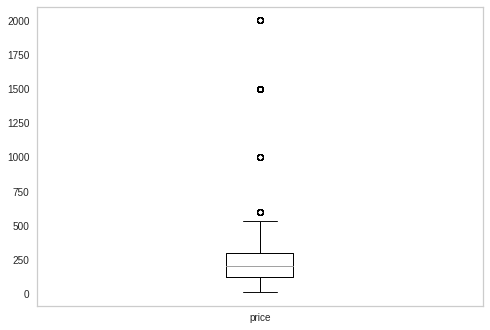

In [ ]:
df.boxplot('price',grid=False)
plt.show()

##Data city terlalu sedikit yang lengkap

In [ ]:
profit_summary_1 = df.groupby(['order_dt','item_name','cust_id','order_id']).agg(
                       total_item  = ('qty','sum'),
                       total_price = ('final_price','sum'),
                       total_disc  = ('discount','sum'),
                       total_profit= ('profit','sum')
                   ).reset_index()
profit_summary_1 = profit_summary_1[profit_summary_1['order_dt']<'2017-10-01']
profit_summary_1.head(3)

order_dt                                      item_name  cust_id  \
0 2015-01-01  Bridgestone e6 Straight Distance NFL San Dieg     2568   
1 2015-01-01  Bridgestone e6 Straight Distance NFL Tennesse     8136   
2 2015-01-01                        Clicgear 8.0 Shoe Brush     9213   

   order_id  total_item  total_price  total_disc  total_profit  
0        15           3        89.25  6.71999979  -21.23999977  
1        41           4  106.2099991       21.75   9.350000381  
2        58           2  17.57999992 2.400000095    8.43999958

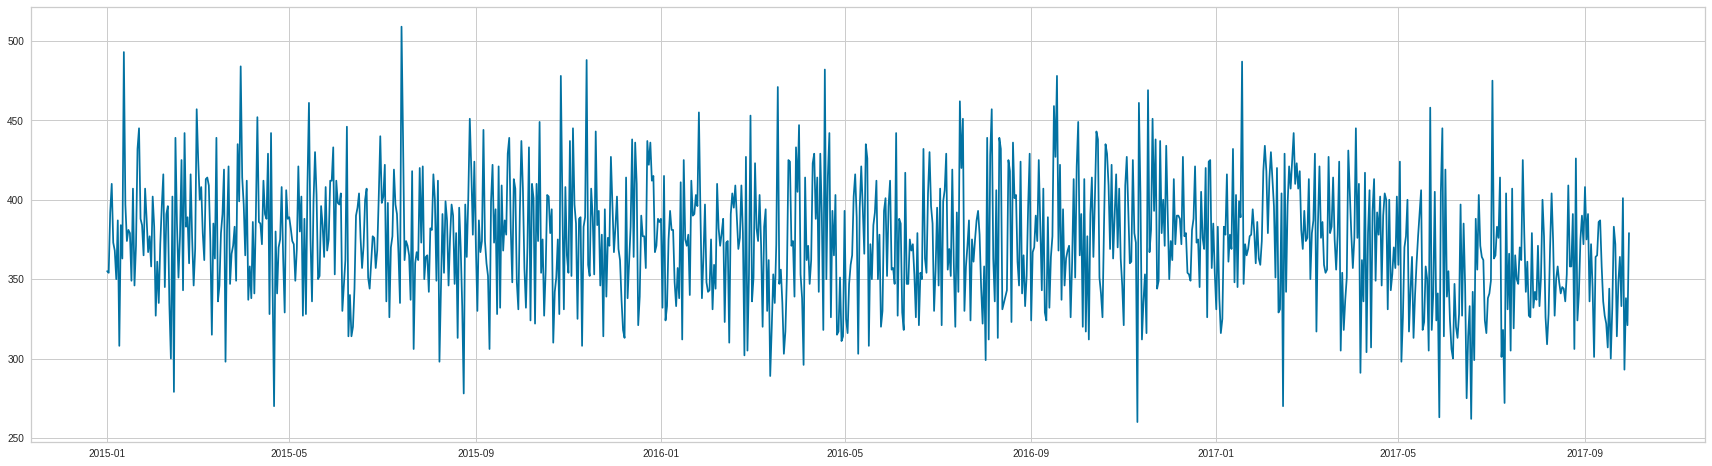

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(profit_summary_1[profit_summary_1['order_dt']<'2017-10-01'].groupby(['order_dt']).sum().reset_index()['order_dt'],
         profit_summary_1[profit_summary_1['order_dt']<'2017-10-01'].groupby(['order_dt']).sum().reset_index()['total_item'])

plt.show()

In [ ]:
profit_summary_2 =  profit_summary_1.groupby(['order_dt','item_name']).agg(
                      cust    = ('cust_id','count'),
                      order   = ('order_id','count'),
                      item    = ('total_item','sum'),
                      price   = ('total_price','sum'),
                      disc    = ('total_disc','sum'),
                      profit  = ('total_profit','sum')  
                    ).reset_index()
profit_summary_2.head(3)

order_dt                                      item_name  cust  order  \
0 2015-01-01  Bridgestone e6 Straight Distance NFL San Dieg     1      1   
1 2015-01-01  Bridgestone e6 Straight Distance NFL Tennesse     1      1   
2 2015-01-01                        Clicgear 8.0 Shoe Brush     1      1   

   item       price        disc       profit  
0     3       89.25  6.71999979 -21.23999977  
1     4 106.2099991       21.75  9.350000381  
2     2 17.57999992 2.400000095   8.43999958

In [ ]:
profit_summary_2 = profit_summary_2[profit_summary_2['order_dt']<'2017-10-01']

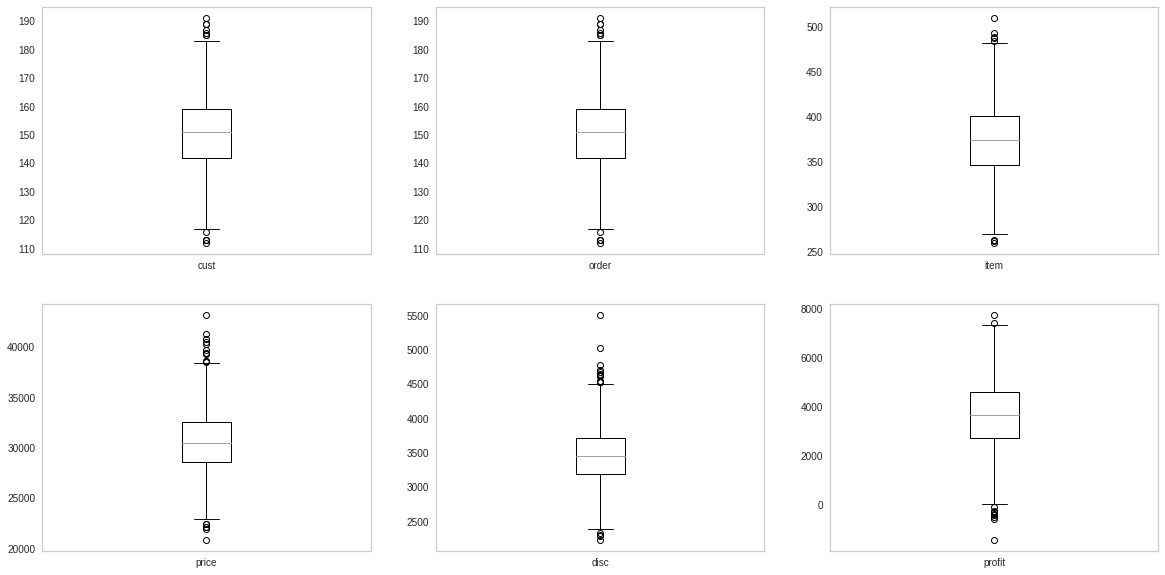

In [ ]:
numerical_column = ['cust','order','item','price','disc','profit']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for nomor, kolom in enumerate(numerical_column):
  # profit_summary_2.boxplot(kolom, ax=axes.flatten()[nomor],grid=False)
  profit_summary_2.groupby('order_dt')[['cust','order','item','price','disc','profit']].sum().reset_index().boxplot(kolom, ax=axes.flatten()[nomor],grid=False)
plt.show()

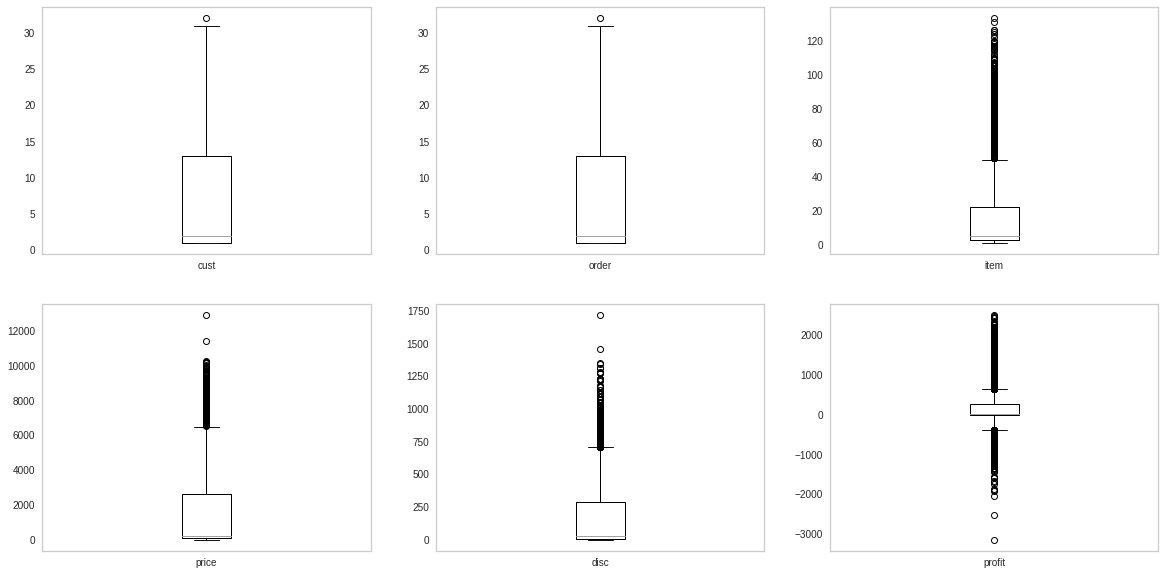

In [ ]:
numerical_column = ['cust','order','item','price','disc','profit']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for nomor, kolom in enumerate(numerical_column):
  # profit_summary_2.boxplot(kolom, ax=axes.flatten()[nomor],grid=False)
  profit_summary_2.boxplot(kolom, ax=axes.flatten()[nomor],grid=False)
plt.show()

In [ ]:
Q1 = profit_summary_2.groupby('order_dt')[['cust','order','item','price','disc','profit']].sum()[['profit']].quantile(0.25)
Q3 = profit_summary_2.groupby('order_dt')[['cust','order','item','price','disc','profit']].sum()[['profit']].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 profit   2,743.2499889485002
Name: 0.25, dtype: float64

Q3:
 profit   4,596.09748917525
Name: 0.75, dtype: float64

IQR:
 profit   1,852.84750022675
dtype: float64

Min:
 profit   -36.0212613916251
dtype: float64

Max:
 profit   7,375.368739515376
dtype: float64


In [ ]:
filter_sales_min = profit_summary_2.groupby('order_dt')[['cust','order','item','price','disc','profit']].sum()['profit']<-36.02
filter_sales_max = profit_summary_2.groupby('order_dt')[['cust','order','item','price','disc','profit']].sum()['profit']>7375.37

df_outlier = profit_summary_2.groupby('order_dt')[['cust','order','item','price','disc','profit']].sum()['profit'][(filter_sales_min|filter_sales_max)].reset_index()

df_outlier[['order_dt','profit']]

order_dt               profit
0  2015-03-20   -572.2900287720001
1  2015-05-24   -213.0799446440002
2  2015-06-04      7,431.239985263
3  2015-10-14  -250.04994442900005
4  2015-12-11   -373.9499981219999
5  2016-01-29  -255.85998532699966
6  2016-07-17      7,742.740008314
7  2016-08-29 -1,390.3399997110002
8  2017-01-21   -466.4399747789999
9  2017-05-09   -363.2199063260001
10 2017-07-06   -57.67999231799993

In [ ]:
print(str(round(df_outlier['profit'].count()/profit_summary_2.groupby('order_dt')[['cust','order','item','price','disc','profit']].sum()['profit'].count()*100,2)),'%')

1.1 %


In [ ]:
profit_summary_2['order_dt'].apply(lambda x: x.isocalendar())

0         (2015, 1, 4)
1         (2015, 1, 4)
2         (2015, 1, 4)
3         (2015, 1, 4)
4         (2015, 1, 4)
             ...      
22083    (2017, 39, 6)
22084    (2017, 39, 6)
22085    (2017, 39, 6)
22086    (2017, 39, 6)
22087    (2017, 39, 6)
Name: order_dt, Length: 22088, dtype: object

## Item Name Forecast

In [ ]:
item_freq = profit_summary_2[profit_summary_2['order_dt']<'2017-10-01'].groupby('item_name')['order_dt'].count().reset_index().sort_values(by='order_dt')
item_freq[item_freq['order_dt']==1004]

item_name  order_dt
56               O'Brien Men's Neoprene Life Vest      1004
45        Nike Men's CJ Elite 2 TD Football Cleat      1004
15  Diamondback Women's Serene Classic Comfort Bi      1004
48           Nike Men's Dri-FIT Victory Golf Polo      1004
59                    Pelican Sunstream 100 Kayak      1004
18      Field & Stream Sportsman 16 Gun Fire Safe      1004
50              Nike Men's Free 5.0+ Running Shoe      1004
85  Under Armour Girls' Toddler Spine Surge Runni      1004
60               Perfect Fitness Perfect Rip Deck      1004

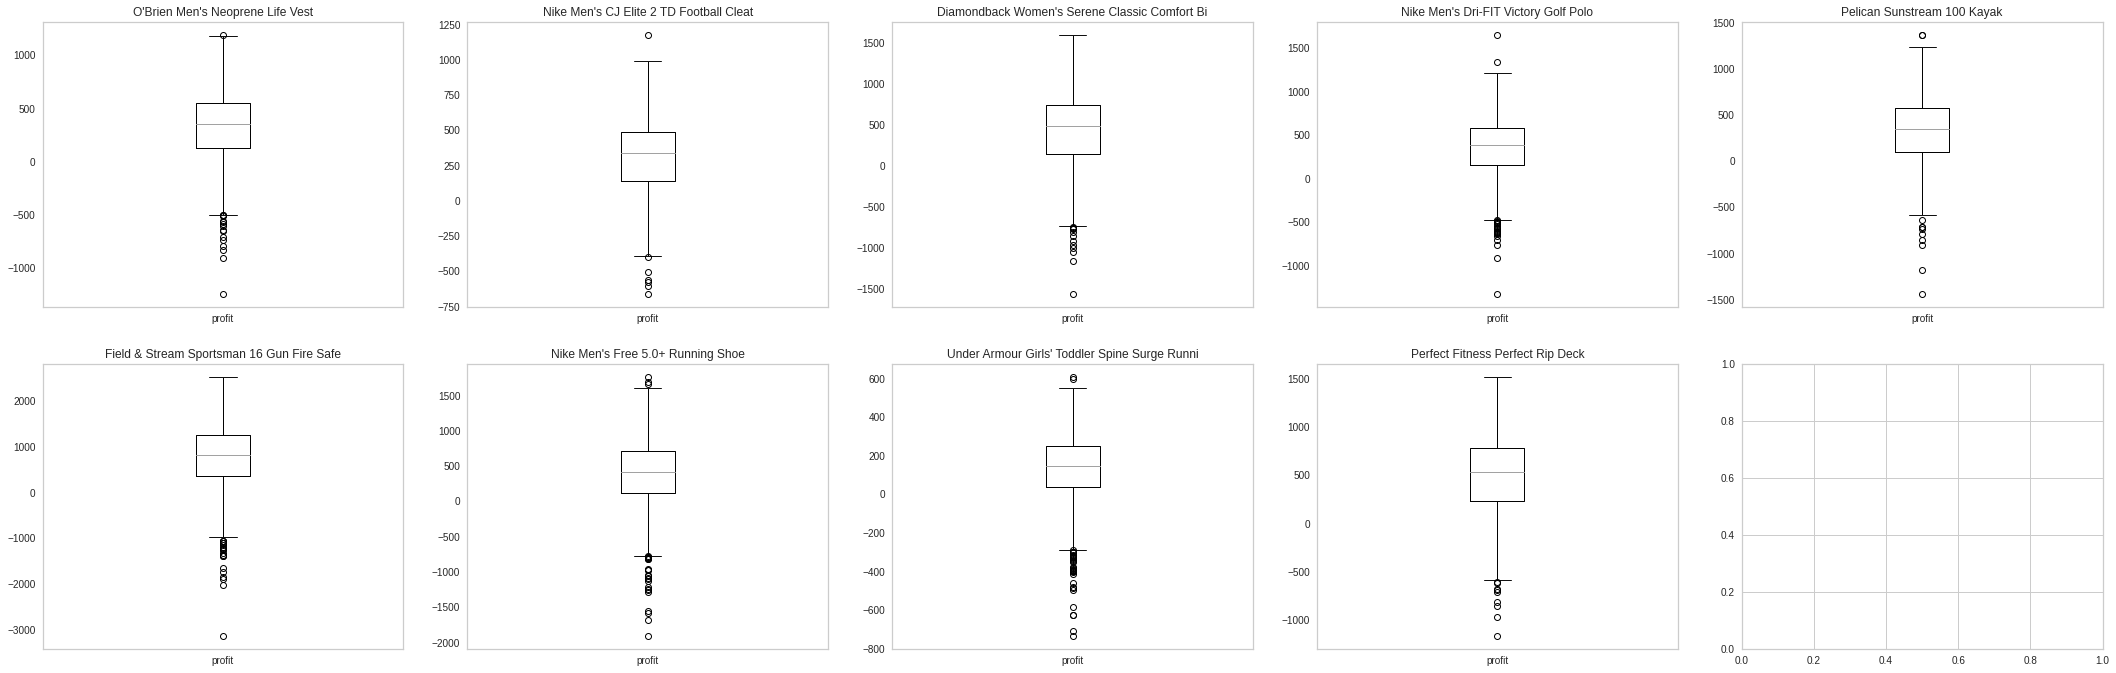

In [ ]:
item = list(item_freq[item_freq['order_dt']==1004]['item_name'])
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(30,10))
fig.tight_layout(pad=3)

for i,j in enumerate(range(0,9)):
    a = profit_summary_2[profit_summary_2['item_name']==item[j]].boxplot(column=['profit'], ax=axes.flatten()[i],grid=False)

    title = list(item_freq[item_freq['order_dt']==1004]['item_name'])[j]
    axes.flatten()[i].set_title(title)

plt.show()

In [ ]:
a = 0
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 1
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 2
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 3
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 4
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 5
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 6
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 7
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 8
Q1 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_2[profit_summary_2['item_name']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_2[(profit_summary_2['item_name']==item[a])&
                            ((profit_summary_2['profit']<boxplot_min)|
                             (profit_summary_2['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

O'Brien Men's Neoprene Life Vest
Outliers:  16
Total Data:  1004
Percent Out:  1.59 %


Nike Men's CJ Elite 2 TD Football Cleat
Outliers:  7
Total Data:  1004
Percent Out:  0.7 %


Diamondback Women's Serene Classic Comfort Bi
Outliers:  12
Total Data:  1004
Percent Out:  1.2 %


Nike Men's Dri-FIT Victory Golf Polo
Outliers:  22
Total Data:  1004
Percent Out:  2.19 %


Pelican Sunstream 100 Kayak
Outliers:  11
Total Data:  1004
Percent Out:  1.1 %


Field & Stream Sportsman 16 Gun Fire Safe
Outliers:  22
Total Data:  1004
Percent Out:  2.19 %


Nike Men's Free 5.0+ Running Shoe
Outliers:  26
Total Data:  1004
Percent Out:  2.59 %


Under Armour Girls' Toddler Spine Surge Runni
Outliers:  36
Total Data:  1004
Percent Out:  3.59 %


Perfect Fitness Perfect Rip Deck
Outliers:  9
Total Data:  1004
Percent Out:  0.9 %


In [ ]:
profit_summary_2['year'] = profit_summary_2['order_dt'].dt.year
profit_summary_2['month'] = profit_summary_2['order_dt'].dt.month
profit_summary_2['week'] = profit_summary_2['order_dt'].dt.week
profit_summary_2 = profit_summary_2.reset_index(drop=True)

<ipython-input-629-e4720a1deb10>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  profit_summary_2['week'] = profit_summary_2['order_dt'].dt.week


In [ ]:
profit_summary_2['week_dt'] = profit_summary_2['year'].astype(str) + profit_summary_2['week'].astype(str)
profit_summary_2['week_dt'] = profit_summary_2['week_dt'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y%W-%w").date())
profit_summary_2['week_dt'] = profit_summary_2['week_dt'].apply(lambda x: pd.to_datetime(x))
# profit_summary_2.at[731,'week_dt'] = pd.to_datetime('2016-12-26')
profit_summary_2.head(3)

order_dt                                      item_name  cust  order  \
0 2015-01-01  Bridgestone e6 Straight Distance NFL San Dieg     1      1   
1 2015-01-01  Bridgestone e6 Straight Distance NFL Tennesse     1      1   
2 2015-01-01                        Clicgear 8.0 Shoe Brush     1      1   

   item       price        disc       profit  year  month  week    week_dt  
0     3       89.25  6.71999979 -21.23999977  2015      1     1 2015-01-05  
1     4 106.2099991       21.75  9.350000381  2015      1     1 2015-01-05  
2     2 17.57999992 2.400000095   8.43999958  2015      1     1 2015-01-05

In [ ]:
item_1 = profit_summary_2[profit_summary_2['item_name']==item[1]]

In [ ]:
item_0 = profit_summary_2[profit_summary_2['item_name']==item[0]]
item_2 = profit_summary_2[profit_summary_2['item_name']==item[2]]
item_3 = profit_summary_2[profit_summary_2['item_name']==item[3]]
item_4 = profit_summary_2[profit_summary_2['item_name']==item[4]]
item_5 = profit_summary_2[profit_summary_2['item_name']==item[5]]
item_6 = profit_summary_2[profit_summary_2['item_name']==item[6]]
item_7 = profit_summary_2[profit_summary_2['item_name']==item[7]]
item_8 = profit_summary_2[profit_summary_2['item_name']==item[8]]

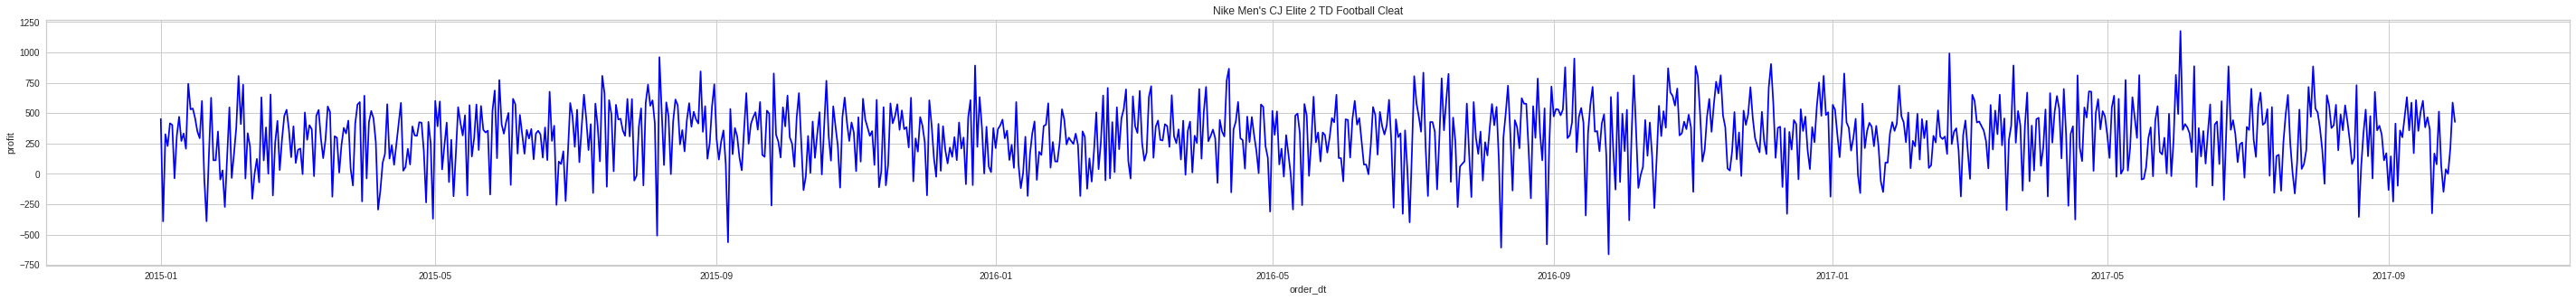

In [ ]:
fig = plt.figure(figsize=(50,5)) #ukuran canvas

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Nike Men's CJ Elite 2 TD Football Cleat")

sns.lineplot(data=item_1,x='order_dt',y='profit',ax=ax, color='blue')

plt.show()

In [ ]:
item_1['year'] = item_1['order_dt'].dt.year
item_1['month'] = item_1['order_dt'].dt.month
item_1 = item_1.reset_index(drop=True)
item_1

<ipython-input-634-47f5de2bc33d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_1['year'] = item_1['order_dt'].dt.year
<ipython-input-634-47f5de2bc33d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_1['month'] = item_1['order_dt'].dt.month


order_dt                                item_name  cust  order  item  \
0    2015-01-01  Nike Men's CJ Elite 2 TD Football Cleat    16     16    19   
1    2015-01-02  Nike Men's CJ Elite 2 TD Football Cleat    19     19    20   
2    2015-01-03  Nike Men's CJ Elite 2 TD Football Cleat    20     20    21   
3    2015-01-04  Nike Men's CJ Elite 2 TD Football Cleat    15     15    17   
4    2015-01-05  Nike Men's CJ Elite 2 TD Football Cleat    18     18    19   
...         ...                                      ...   ...    ...   ...   
999  2017-09-26  Nike Men's CJ Elite 2 TD Football Cleat    21     21    23   
1000 2017-09-27  Nike Men's CJ Elite 2 TD Football Cleat    16     16    16   
1001 2017-09-28  Nike Men's CJ Elite 2 TD Football Cleat    16     16    19   
1002 2017-09-29  Nike Men's CJ Elite 2 TD Football Cleat    19     19    23   
1003 2017-09-30  Nike Men's CJ Elite 2 TD Football Cleat    27     27    28   

                   price               disc             profit  year  month  \
0         2,210.45998376      259.349999667      452.210003421  2015      1   
1         2,322.24998466      277.549998527     -390.930004339  2015      1   
2    2,447.0399779599998      282.749999287      327.010002513  2015      1   
3    1,985.5799864599999      224.249999287      229.150003673  2015      1   
4    2,219.5599822599997 250.24999928699998      416.589995253  2015      1   
...                  ...                ...                ...   ...    ...   
999       2,666.71997826      323.049998527 37.720006495000014  2017      9   
1000      1,871.18998706      208.649998907 0.3300033209999853  2017      9   
1001      2,216.95998376      252.849999667 211.47998788700002  2017      9   
1002      2,705.06997676      284.699999573      587.279999745  2017      9   
1003      3,264.66998272      375.049998288      427.890008428  2017      9   

      week    week_dt  
0        1 2015-01-05  
1        1 2015-01-05  
2        1 2015-01-05  
3        1 2015-01-05  
4        2 2015-01-12  
...    ...        ...  
999     39 2017-09-25  
1000    39 2017-09-25  
1001    39 2017-09-25  
1002    39 2017-09-25  
1003    39 2017-09-25  

[1004 rows x 12 columns]

In [ ]:
# pivot_table(data, nilai yang mau dimasukin ke cell, index = baris, columns = kolom, aggfunc)
item_1_pvt = pd.pivot_table(item_1, values='profit', index=['month'],columns=['year'], aggfunc=np.sum)
item_1_pvt

year              2015                2016             2017
month                                                      
1      7,821.069961414 7,511.4700023899995  9,877.960050942
2       7,350.35998651     7,244.960014554  8,541.779956769
3      8,563.909996338    10,806.660039197 10,480.579999737
4      6,208.910050155     9,868.610028031 10,935.880021533
5     10,143.269972876     8,426.329985839   9,334.66001354
6      8,428.060019426     7,709.389978332 10,120.280031579
7     10,802.909943304     9,798.610019844 10,048.680007243
8     13,614.260028024     9,306.800041023 10,001.869985658
9      8,859.119992797      10,894.5800295  7,887.240017341
10     9,785.710010727    10,787.489988038              NaN
11       9,635.2100231    11,956.030006096              NaN
12     7,894.210064678    10,966.589928044              NaN

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


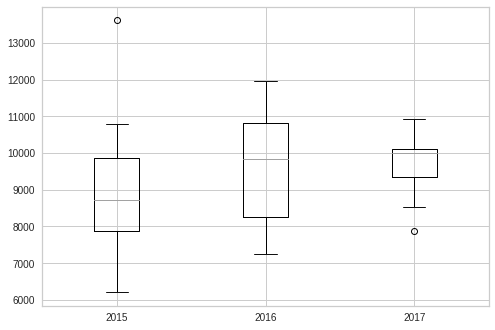

In [ ]:
item_1_pvt.boxplot()

In [ ]:
item_1['week'] = item_1['order_dt'].dt.week
item_1

<ipython-input-637-817bbbf6c877>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  item_1['week'] = item_1['order_dt'].dt.week


order_dt                                item_name  cust  order  item  \
0    2015-01-01  Nike Men's CJ Elite 2 TD Football Cleat    16     16    19   
1    2015-01-02  Nike Men's CJ Elite 2 TD Football Cleat    19     19    20   
2    2015-01-03  Nike Men's CJ Elite 2 TD Football Cleat    20     20    21   
3    2015-01-04  Nike Men's CJ Elite 2 TD Football Cleat    15     15    17   
4    2015-01-05  Nike Men's CJ Elite 2 TD Football Cleat    18     18    19   
...         ...                                      ...   ...    ...   ...   
999  2017-09-26  Nike Men's CJ Elite 2 TD Football Cleat    21     21    23   
1000 2017-09-27  Nike Men's CJ Elite 2 TD Football Cleat    16     16    16   
1001 2017-09-28  Nike Men's CJ Elite 2 TD Football Cleat    16     16    19   
1002 2017-09-29  Nike Men's CJ Elite 2 TD Football Cleat    19     19    23   
1003 2017-09-30  Nike Men's CJ Elite 2 TD Football Cleat    27     27    28   

                   price               disc             profit  year  month  \
0         2,210.45998376      259.349999667      452.210003421  2015      1   
1         2,322.24998466      277.549998527     -390.930004339  2015      1   
2    2,447.0399779599998      282.749999287      327.010002513  2015      1   
3    1,985.5799864599999      224.249999287      229.150003673  2015      1   
4    2,219.5599822599997 250.24999928699998      416.589995253  2015      1   
...                  ...                ...                ...   ...    ...   
999       2,666.71997826      323.049998527 37.720006495000014  2017      9   
1000      1,871.18998706      208.649998907 0.3300033209999853  2017      9   
1001      2,216.95998376      252.849999667 211.47998788700002  2017      9   
1002      2,705.06997676      284.699999573      587.279999745  2017      9   
1003      3,264.66998272      375.049998288      427.890008428  2017      9   

      week    week_dt  
0        1 2015-01-05  
1        1 2015-01-05  
2        1 2015-01-05  
3        1 2015-01-05  
4        2 2015-01-12  
...    ...        ...  
999     39 2017-09-25  
1000    39 2017-09-25  
1001    39 2017-09-25  
1002    39 2017-09-25  
1003    39 2017-09-25  

[1004 rows x 12 columns]

In [ ]:
item_1_week = item_1.groupby(['year','week']).sum().reset_index()
item_1_week

year  week  cust  order  item               price            disc  \
0    2015     1    70     70    77  8,965.329932839999 1,043.899996768   
1    2015     2   127    127   147     17,176.72987308 1,931.799994487   
2    2015     3   119    119   140 16,349.999877279999 1,848.599993725   
3    2015     4   105    105   128     14,949.36988782 1,689.349995389   
4    2015     5   124    124   148     17,306.06986938 1,932.449994582   
..    ...   ...   ...    ...   ...                 ...             ...   
141  2017    36   129    129   149     17,335.95987644 2,032.549993297   
142  2017    37   144    144   177        20,687.72985  2,320.49999287   
143  2017    38   126    126   145     16,931.04987278 1,917.499994296   
144  2017    39   115    115   125 14,607.499892619999 1,641.249995009   
145  2017    52    16     16    21      2,480.83998096   248.949999096   

                 profit  month  
0         617.440005268      4  
1       2,170.289984301      7  
2       3,120.080002564      7  
3   1,164.9099830960001      7  
4         714.549999418      8  
..                  ...    ...  
141     2,434.009998913     63  
142     3,215.120010228     63  
143     1,336.860014333     63  
144 1,116.6100033470002     54  
145       568.959994295      1  

[146 rows x 9 columns]

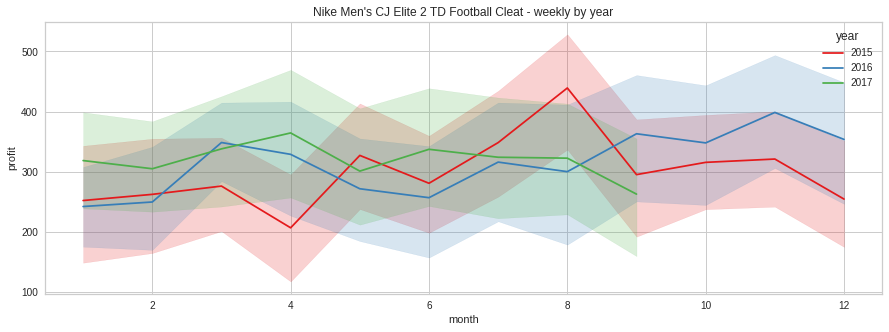

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Nike Men's CJ Elite 2 TD Football Cleat - weekly by year")

sns.lineplot(data=item_1,x='month',y='profit',ax=ax,hue='year',palette='Set1')

plt.show()

In [ ]:
item_1.head(3)

order_dt                                item_name  cust  order  item  \
0 2015-01-01  Nike Men's CJ Elite 2 TD Football Cleat    16     16    19   
1 2015-01-02  Nike Men's CJ Elite 2 TD Football Cleat    19     19    20   
2 2015-01-03  Nike Men's CJ Elite 2 TD Football Cleat    20     20    21   

                price          disc         profit  year  month  week  \
0      2,210.45998376 259.349999667  452.210003421  2015      1     1   
1      2,322.24998466 277.549998527 -390.930004339  2015      1     1   
2 2,447.0399779599998 282.749999287  327.010002513  2015      1     1   

     week_dt  
0 2015-01-05  
1 2015-01-05  
2 2015-01-05

##Item 1

###Daily

In [ ]:
item_1['week_dt'] = item_1['year'].astype(str) + item_1['week'].astype(str)
item_1['week_dt'] = item_1['week_dt'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y%W-%w").date())
item_1['week_dt'] = item_1['week_dt'].apply(lambda x: pd.to_datetime(x))
item_1.at[731,'week_dt'] = pd.to_datetime('2016-12-26')
item_1.head(3)

order_dt                                item_name  cust  order  item  \
0 2015-01-01  Nike Men's CJ Elite 2 TD Football Cleat    16     16    19   
1 2015-01-02  Nike Men's CJ Elite 2 TD Football Cleat    19     19    20   
2 2015-01-03  Nike Men's CJ Elite 2 TD Football Cleat    20     20    21   

                price          disc         profit  year  month  week  \
0      2,210.45998376 259.349999667  452.210003421  2015      1     1   
1      2,322.24998466 277.549998527 -390.930004339  2015      1     1   
2 2,447.0399779599998 282.749999287  327.010002513  2015      1     1   

     week_dt  
0 2015-01-05  
1 2015-01-05  
2 2015-01-05

In [ ]:
# Order df_fc
item_1_fc = item_1.sort_values(by = ['order_dt']).copy()

# Day dummies
item_1_fc['dayname'] = item_1_fc['order_dt'].dt.day_name()
item_1_fc = pd.get_dummies(item_1_fc, drop_first = True)

# Set Date as index
item_1_fc = item_1_fc.set_index(['order_dt'])
item_1_fc


cust  order  item               price               disc  \
order_dt                                                               
2015-01-01    16     16    19      2,210.45998376      259.349999667   
2015-01-02    19     19    20      2,322.24998466      277.549998527   
2015-01-03    20     20    21 2,447.0399779599998      282.749999287   
2015-01-04    15     15    17 1,985.5799864599999      224.249999287   
2015-01-05    18     18    19 2,219.5599822599997 250.24999928699998   
...          ...    ...   ...                 ...                ...   
2017-09-26    21     21    23      2,666.71997826      323.049998527   
2017-09-27    16     16    16      1,871.18998706      208.649998907   
2017-09-28    16     16    19      2,216.95998376      252.849999667   
2017-09-29    19     19    23      2,705.06997676      284.699999573   
2017-09-30    27     27    28      3,264.66998272      375.049998288   

                       profit  year  month  week    week_dt  dayname_Monday  \
order_dt                                                                      
2015-01-01      452.210003421  2015      1     1 2015-01-05               0   
2015-01-02     -390.930004339  2015      1     1 2015-01-05               0   
2015-01-03      327.010002513  2015      1     1 2015-01-05               0   
2015-01-04      229.150003673  2015      1     1 2015-01-05               0   
2015-01-05      416.589995253  2015      1     2 2015-01-12               1   
...                       ...   ...    ...   ...        ...             ...   
2017-09-26 37.720006495000014  2017      9    39 2017-09-25               0   
2017-09-27 0.3300033209999853  2017      9    39 2017-09-25               0   
2017-09-28 211.47998788700002  2017      9    39 2017-09-25               0   
2017-09-29      587.279999745  2017      9    39 2017-09-25               0   
2017-09-30      427.890008428  2017      9    39 2017-09-25               0   

            dayname_Saturday  dayname_Sunday  dayname_Thursday  \
order_dt                                                         
2015-01-01                 0               0                 1   
2015-01-02                 0               0                 0   
2015-01-03                 1               0                 0   
2015-01-04                 0               1                 0   
2015-01-05                 0               0                 0   
...                      ...             ...               ...   
2017-09-26                 0               0                 0   
2017-09-27                 0               0                 0   
2017-09-28                 0               0                 1   
2017-09-29                 0               0                 0   
2017-09-30                 1               0                 0   

            dayname_Tuesday  dayname_Wednesday  
order_dt                                        
2015-01-01                0                  0  
2015-01-02                0                  0  
2015-01-03                0                  0  
2015-01-04                0                  0  
2015-01-05                0                  0  
...                     ...                ...  
2017-09-26                1                  0  
2017-09-27                0                  1  
2017-09-28                0                  0  
2017-09-29                0                  0  
2017-09-30                0                  0  

[1004 rows x 16 columns]

In [ ]:
# Lagged_variables
item_1_fc['lag1_profit']  = item_1_fc['profit'].shift(1)
item_1_fc['lag2_profit']  = item_1_fc['profit'].shift(2)
item_1_fc['lag3_profit']  = item_1_fc['profit'].shift(3)
item_1_fc['lag4_profit']  = item_1_fc['profit'].shift(4)
item_1_fc['lag5_profit']  = item_1_fc['profit'].shift(5)
item_1_fc['lag6_profit']  = item_1_fc['profit'].shift(6)
item_1_fc['lag7_profit']  = item_1_fc['profit'].shift(7)
item_1_fc['lag1_cust']    = item_1_fc['cust'].shift(1)
item_1_fc['lag2_cust']    = item_1_fc['cust'].shift(2)
item_1_fc['lag3_cust']    = item_1_fc['cust'].shift(3)
item_1_fc['lag1_order']   = item_1_fc['order'].shift(1)
item_1_fc['lag2_order']   = item_1_fc['order'].shift(2)
item_1_fc['lag3_order']   = item_1_fc['order'].shift(3)
item_1_fc['lag1_item']    = item_1_fc['item'].shift(1)
item_1_fc['lag2_item']    = item_1_fc['item'].shift(2)
item_1_fc['lag3_item']    = item_1_fc['item'].shift(3)
item_1_fc['lag1_price']   = item_1_fc['price'].shift(1)
item_1_fc['lag2_price']   = item_1_fc['price'].shift(2)
item_1_fc['lag3_price']   = item_1_fc['price'].shift(3)
item_1_fc['lag1_disc']   = item_1_fc['disc'].shift(1)
item_1_fc['lag2_disc']   = item_1_fc['disc'].shift(2)
item_1_fc['lag3_disc']   = item_1_fc['disc'].shift(3)

In [ ]:
# Data for forecasting
item_1_fc_mdl = item_1_fc.copy()

# Remove NA
item_1_fc_mdl = item_1_fc_mdl[~item_1_fc_mdl.isna().any(axis=1)]

item_1_fc_mdl.columns

Index(['cust', 'order', 'item', 'price', 'disc', 'profit', 'year', 'month',
       'week', 'week_dt', 'dayname_Monday', 'dayname_Saturday',
       'dayname_Sunday', 'dayname_Thursday', 'dayname_Tuesday',
       'dayname_Wednesday', 'lag1_profit', 'lag2_profit', 'lag3_profit',
       'lag4_profit', 'lag5_profit', 'lag6_profit', 'lag7_profit', 'lag1_cust',
       'lag2_cust', 'lag3_cust', 'lag1_order', 'lag2_order', 'lag3_order',
       'lag1_item', 'lag2_item', 'lag3_item', 'lag1_price', 'lag2_price',
       'lag3_price', 'lag1_disc', 'lag2_disc', 'lag3_disc'],
      dtype='object')

In [ ]:
# Define predictor and 
X = item_1_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'year', 'month',
       'week', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
       'lag1_profit', 'lag2_profit', 'lag3_profit', 'lag4_profit',
       'lag5_profit', 'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust',
       'lag3_cust', 'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item',
       'lag2_item', 'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price',
       'lag1_disc', 'lag2_disc', 'lag3_disc']]
y = item_1_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

In [ ]:
from sklearn.linear_model import LinearRegression # model lin. reg

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Daily   - 0.11180955886232002
# Weekly  -
model.score(X_train,y_train)

0.11195795321634783

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = item_1_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)
df_fc_pred.head(3)

cust  order  item               price          disc  \
order_dt                                                          
2015-01-08    25     25    31      3,657.88997642 371.799999714   
2015-01-09    18     18    19 2,209.1599806599997 260.649998907   
2015-01-10    23     23    29      3,384.90997306 384.799999002   

                     profit_x  year  month  week    week_dt  dayname_Monday  \
order_dt                                                                      
2015-01-08 312.02000263499997  2015      1     2 2015-01-12               0   
2015-01-09       470.31999326  2015      1     2 2015-01-12               0   
2015-01-10      271.019995206  2015      1     2 2015-01-12               0   

            dayname_Saturday  dayname_Sunday  dayname_Thursday  \
order_dt                                                         
2015-01-08                 0               0                 1   
2015-01-09                 0               0                 0   
2015-01-10                 1               0                 0   

            dayname_Tuesday  dayname_Wednesday         lag1_profit  \
order_dt                                                             
2015-01-08                0                  0 -36.100002700999966   
2015-01-09                0                  0  312.02000263499997   
2015-01-10                0                  0        470.31999326   

                   lag2_profit         lag3_profit   lag4_profit  \
order_dt                                                           
2015-01-08         403.4600017       416.589995253 229.150003673   
2015-01-09 -36.100002700999966         403.4600017 416.589995253   
2015-01-10  312.02000263499997 -36.100002700999966   403.4600017   

             lag5_profit    lag6_profit    lag7_profit  lag1_cust  lag2_cust  \
order_dt                                                                       
2015-01-08 327.010002513 -390.930004339  452.210003421       11.0       17.0   
2015-01-09 229.150003673  327.010002513 -390.930004339       25.0       11.0   
2015-01-10 416.589995253  229.150003673  327.010002513       18.0       25.0   

            lag3_cust  lag1_order  lag2_order  lag3_order  lag1_item  \
order_dt                                                               
2015-01-08       18.0        11.0        17.0        18.0       17.0   
2015-01-09       17.0        25.0        11.0        17.0       31.0   
2015-01-10       11.0        18.0        25.0        11.0       19.0   

            lag2_item  lag3_item          lag1_price          lag2_price  \
order_dt                                                                   
2015-01-08       17.0       19.0      1,988.17998496 1,985.5799864599999   
2015-01-09       17.0       17.0      3,657.88997642      1,988.17998496   
2015-01-10       31.0       17.0 2,209.1599806599997      3,657.88997642   

                    lag3_price     lag1_disc     lag2_disc          lag3_disc  \
order_dt                                                                        
2015-01-08 2,219.5599822599997 221.649998907 224.249999287 250.24999928699998   
2015-01-09 1,985.5799864599999 371.799999714 221.649998907      224.249999287   
2015-01-10      1,988.17998496 260.649998907 371.799999714      221.649998907   

                     profit_y          Predicted  
order_dt                                          
2015-01-08 312.02000263499997 335.13090239789744  
2015-01-09       470.31999326 419.27312003400584  
2015-01-10      271.019995206 318.07618628766795

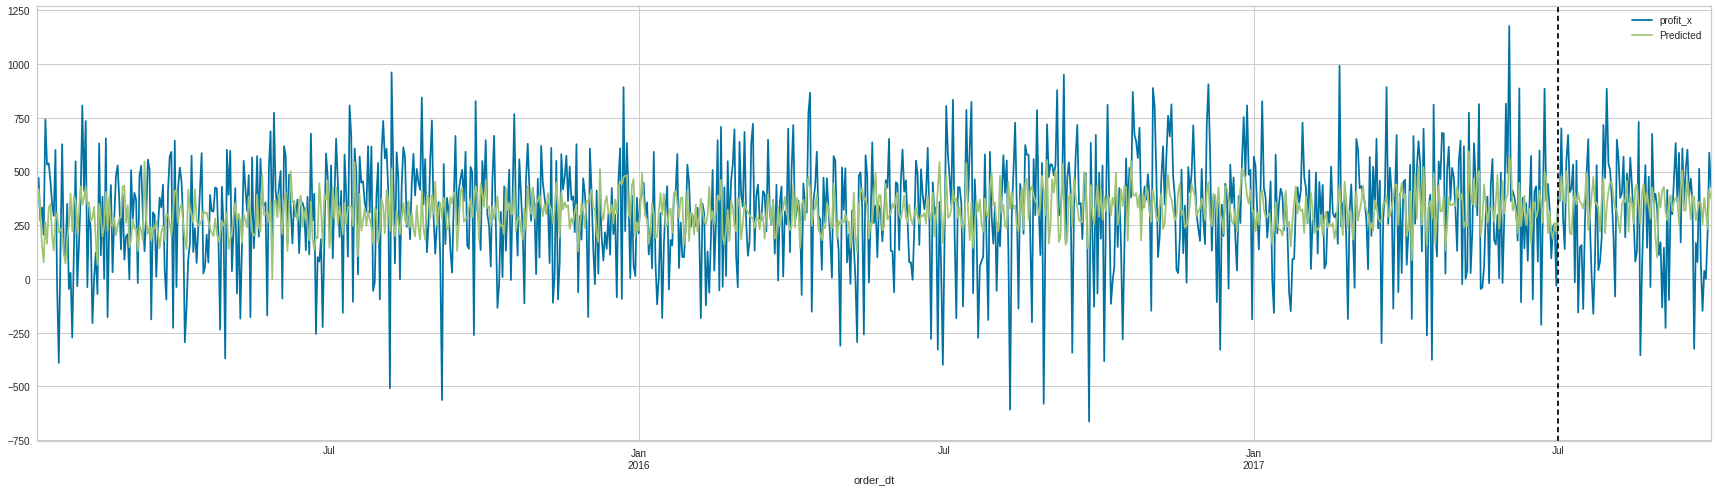

In [ ]:
fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

###Weekly - best - profit

In [ ]:
item_1_weekly = item_1.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()
item_1_weekly

week_dt  cust  order  item               price            disc  \
0   2015-01-05    70     70    77  8,965.329932839999 1,043.899996768   
1   2015-01-12   127    127   147     17,176.72987308 1,931.799994487   
2   2015-01-19   119    119   140 16,349.999877279999 1,848.599993725   
3   2015-01-26   105    105   128     14,949.36988782 1,689.349995389   
4   2015-02-02   124    124   148     17,306.06986938 1,932.449994582   
..         ...   ...    ...   ...                 ...             ...   
138 2017-08-28   115    115   133     15,553.16988316 1,735.499994535   
139 2017-09-04   129    129   149     17,335.95987644 2,032.549993297   
140 2017-09-11   144    144   177        20,687.72985  2,320.49999287   
141 2017-09-18   126    126   145     16,931.04987278 1,917.499994296   
142 2017-09-25   115    115   125 14,607.499892619999 1,641.249995009   

                 profit  
0         617.440005268  
1       2,170.289984301  
2       3,120.080002564  
3   1,164.9099830960001  
4         714.549999418  
..                  ...  
138       786.839979607  
139     2,434.009998913  
140     3,215.120010228  
141     1,336.860014333  
142 1,116.6100033470002  

[143 rows x 7 columns]

In [ ]:
#wont work, week date shows only monday
# Order df_fc
item_1_weekly_fc = item_1_weekly.sort_values(by = ['week_dt']).copy()

# Day dummies
item_1_weekly_fc['dayname'] = item_1_weekly_fc['week_dt'].dt.day_name()
item_1_weekly_fc = pd.get_dummies(item_1_weekly_fc, drop_first = True)

# # Set Date as index
item_1_weekly_fc = item_1_weekly_fc.set_index(['week_dt'])
item_1_weekly_fc


cust  order  item               price            disc  \
week_dt                                                             
2015-01-05    70     70    77  8,965.329932839999 1,043.899996768   
2015-01-12   127    127   147     17,176.72987308 1,931.799994487   
2015-01-19   119    119   140 16,349.999877279999 1,848.599993725   
2015-01-26   105    105   128     14,949.36988782 1,689.349995389   
2015-02-02   124    124   148     17,306.06986938 1,932.449994582   
...          ...    ...   ...                 ...             ...   
2017-08-28   115    115   133     15,553.16988316 1,735.499994535   
2017-09-04   129    129   149     17,335.95987644 2,032.549993297   
2017-09-11   144    144   177        20,687.72985  2,320.49999287   
2017-09-18   126    126   145     16,931.04987278 1,917.499994296   
2017-09-25   115    115   125 14,607.499892619999 1,641.249995009   

                        profit  
week_dt                         
2015-01-05       617.440005268  
2015-01-12     2,170.289984301  
2015-01-19     3,120.080002564  
2015-01-26 1,164.9099830960001  
2015-02-02       714.549999418  
...                        ...  
2017-08-28       786.839979607  
2017-09-04     2,434.009998913  
2017-09-11     3,215.120010228  
2017-09-18     1,336.860014333  
2017-09-25 1,116.6100033470002  

[143 rows x 6 columns]

In [ ]:
# Lagged_variables
item_1_weekly_fc['lag1_profit']  = item_1_weekly_fc['profit'].shift(1)
item_1_weekly_fc['lag2_profit']  = item_1_weekly_fc['profit'].shift(2)
item_1_weekly_fc['lag3_profit']  = item_1_weekly_fc['profit'].shift(3)
item_1_weekly_fc['lag4_profit']  = item_1_weekly_fc['profit'].shift(4)
item_1_weekly_fc['lag5_profit']  = item_1_weekly_fc['profit'].shift(5)
# item_1_weekly_fc['lag6_profit']  = item_1_weekly_fc['profit'].shift(6)
# item_1_weekly_fc['lag7_profit']  = item_1_weekly_fc['profit'].shift(7)
item_1_weekly_fc['lag1_cust']    = item_1_weekly_fc['cust'].shift(1)
item_1_weekly_fc['lag2_cust']    = item_1_weekly_fc['cust'].shift(2)
item_1_weekly_fc['lag3_cust']    = item_1_weekly_fc['cust'].shift(3)
item_1_weekly_fc['lag1_order']   = item_1_weekly_fc['order'].shift(1)
item_1_weekly_fc['lag2_order']   = item_1_weekly_fc['order'].shift(2)
item_1_weekly_fc['lag3_order']   = item_1_weekly_fc['order'].shift(3)
item_1_weekly_fc['lag1_item']    = item_1_weekly_fc['item'].shift(1)
item_1_weekly_fc['lag2_item']    = item_1_weekly_fc['item'].shift(2)
item_1_weekly_fc['lag3_item']    = item_1_weekly_fc['item'].shift(3)
item_1_weekly_fc['lag1_price']   = item_1_weekly_fc['price'].shift(1)
item_1_weekly_fc['lag2_price']   = item_1_weekly_fc['price'].shift(2)
item_1_weekly_fc['lag3_price']   = item_1_weekly_fc['price'].shift(3)
item_1_weekly_fc['lag1_disc']    = item_1_weekly_fc['disc'].shift(1)
item_1_weekly_fc['lag2_disc']    = item_1_weekly_fc['disc'].shift(2)
item_1_weekly_fc['lag3_disc']    = item_1_weekly_fc['disc'].shift(3)

In [ ]:
# Data for forecasting
item_1_weekly_fc_mdl = item_1_weekly_fc.copy()

# Remove NA
item_1_weekly_fc_mdl = item_1_weekly_fc_mdl[~item_1_weekly_fc_mdl.isna().any(axis=1)]

item_1_weekly_fc_mdl.columns

Index(['cust', 'order', 'item', 'price', 'disc', 'profit', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit', 'lag1_cust',
       'lag2_cust', 'lag3_cust', 'lag1_order', 'lag2_order', 'lag3_order',
       'lag1_item', 'lag2_item', 'lag3_item', 'lag1_price', 'lag2_price',
       'lag3_price', 'lag1_disc', 'lag2_disc', 'lag3_disc'],
      dtype='object')

In [ ]:
# Define predictor and 
X = item_1_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
      #  'lag6_profit', 'lag7_profit', 
       'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = item_1_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

In [ ]:
from sklearn.linear_model import LinearRegression # model lin. reg

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Daily   - 0.11180955886232002
# Weekly  - 0.3978376486486339
model.score(X_train,y_train)

0.3924897920985154

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = item_1_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)
df_fc_pred.head(3)

cust  order  item               price                disc  \
week_dt                                                                 
2015-02-09   149    149   189     22,078.60983956     2,489.499992631   
2015-02-16   126    126   145     16,929.74987728 1,918.7999935359999   
2015-02-23   121    121   143 16,711.369872479998     1,877.199995056   

                    profit_x       lag1_profit         lag2_profit  \
week_dt                                                              
2015-02-09   2,793.809987668     714.549999418 1,164.9099830960001   
2015-02-16 816.2199961070002   2,793.809987668       714.549999418   
2015-02-23   1,586.579971001 816.2199961070002     2,793.809987668   

                   lag3_profit         lag4_profit     lag5_profit  lag1_cust  \
week_dt                                                                         
2015-02-09     3,120.080002564     2,170.289984301   617.440005268      124.0   
2015-02-16 1,164.9099830960001     3,120.080002564 2,170.289984301      149.0   
2015-02-23       714.549999418 1,164.9099830960001 3,120.080002564      126.0   

            lag2_cust  lag3_cust  lag1_order  lag2_order  lag3_order  \
week_dt                                                                
2015-02-09      105.0      119.0       124.0       105.0       119.0   
2015-02-16      124.0      105.0       149.0       124.0       105.0   
2015-02-23      149.0      124.0       126.0       149.0       124.0   

            lag1_item  lag2_item  lag3_item      lag1_price      lag2_price  \
week_dt                                                                       
2015-02-09      148.0      128.0      140.0 17,306.06986938 14,949.36988782   
2015-02-16      189.0      148.0      128.0 22,078.60983956 17,306.06986938   
2015-02-23      145.0      189.0      148.0 16,929.74987728 22,078.60983956   

                    lag3_price           lag1_disc       lag2_disc  \
week_dt                                                              
2015-02-09 16,349.999877279999     1,932.449994582 1,689.349995389   
2015-02-16     14,949.36988782     2,489.499992631 1,932.449994582   
2015-02-23     17,306.06986938 1,918.7999935359999 2,489.499992631   

                 lag3_disc          profit_y           Predicted  
week_dt                                                           
2015-02-09 1,848.599993725   2,793.809987668 3,026.9706196206807  
2015-02-16 1,689.349995389 816.2199961070002 1,747.2264150995015  
2015-02-23 1,932.449994582   1,586.579971001 2,088.2287411111593

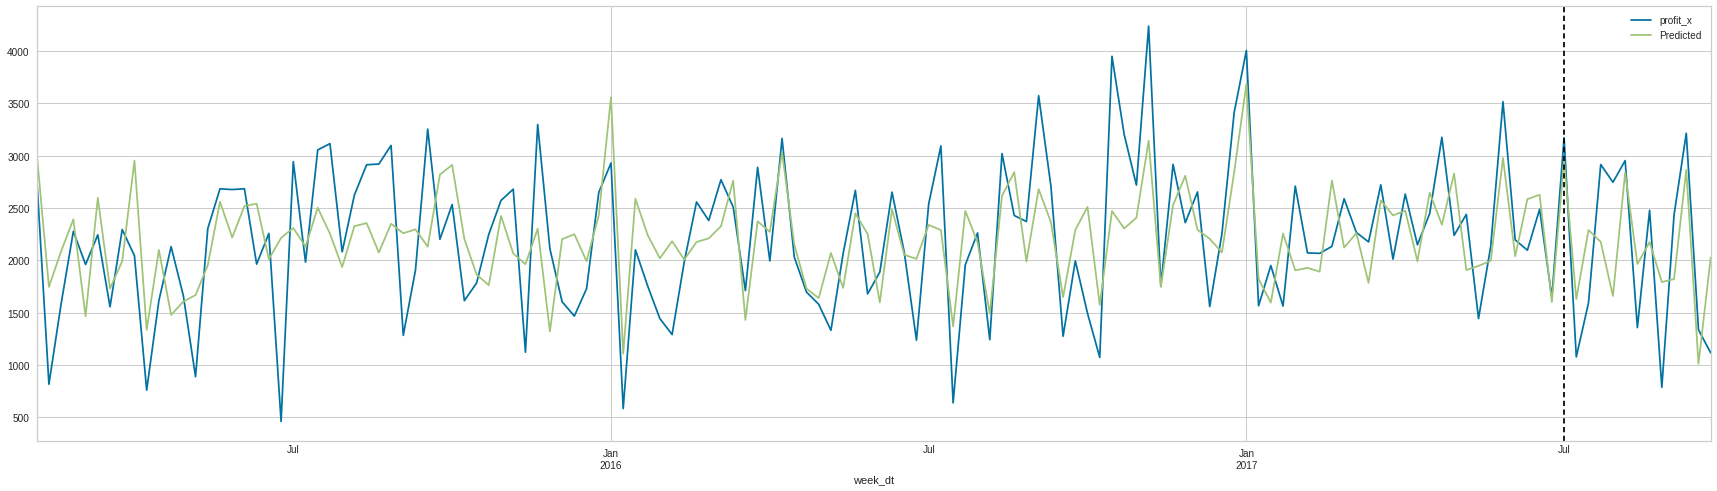

In [ ]:
fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

In [ ]:
# df_fc_pred.reset_index()[['week_dt','profit_x','profit_y','Predicted']].to_excel('predict.xlsx')

In [ ]:
# from google.colab import files
# files.download('predict.xlsx')

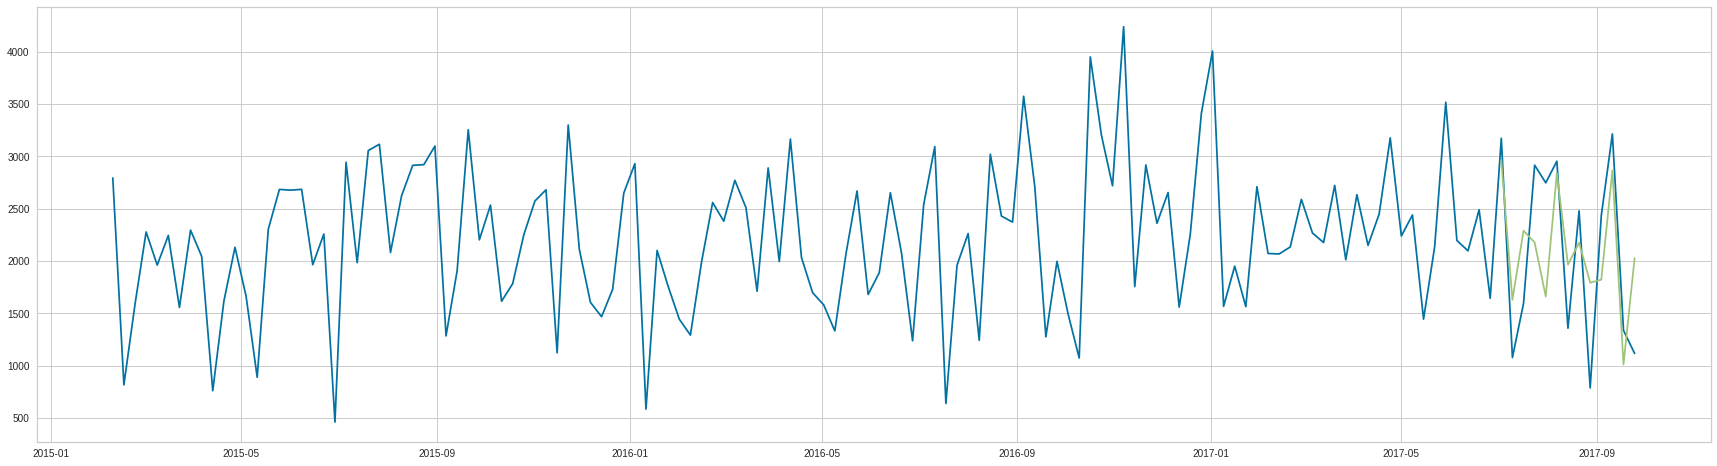

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_fc_pred['profit_x'])
plt.plot(df_fc_pred[df_fc_pred.index >= '2017-07-01']['Predicted'])
plt.show()

In [ ]:
# Mean Absolute Percent Error
print('MAPE: ',str(round(sum(abs(df_fc_pred['profit_x'] - df_fc_pred['Predicted'])/df_fc_pred['profit_x'])/1004*100,2)),'%')
print('MAE : ',str(round(sum(abs(df_fc_pred['profit_x'] - df_fc_pred['Predicted']))/1004,2)))

MAPE:  3.79 %
MAE :  64.47


In [ ]:
print(df_fc_pred['profit_x'].sum())
print(df_fc_pred['Predicted'].sum())

303826.180219932
303857.98138011334


In [ ]:
100*(df_fc_pred['Predicted'].sum()-df_fc_pred['profit_x'].sum())/df_fc_pred['profit_x'].sum()

0.010466892668146186

###Weekly - best - qty

In [ ]:
item_1_weekly = item_1.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()
item_1_weekly_fc = item_1_weekly.sort_values(by = ['week_dt']).copy()

item_1_weekly_fc['dayname'] = item_1_weekly_fc['week_dt'].dt.day_name()
item_1_weekly_fc = pd.get_dummies(item_1_weekly_fc, drop_first = True)

item_1_weekly_fc = item_1_weekly_fc.set_index(['week_dt'])

item_1_weekly_fc['lag1_profit']  = item_1_weekly_fc['profit'].shift(1)
item_1_weekly_fc['lag2_profit']  = item_1_weekly_fc['profit'].shift(2)
item_1_weekly_fc['lag3_profit']  = item_1_weekly_fc['profit'].shift(3)
item_1_weekly_fc['lag1_cust']    = item_1_weekly_fc['cust'].shift(1)
item_1_weekly_fc['lag2_cust']    = item_1_weekly_fc['cust'].shift(2)
item_1_weekly_fc['lag3_cust']    = item_1_weekly_fc['cust'].shift(3)
item_1_weekly_fc['lag1_order']   = item_1_weekly_fc['order'].shift(1)
item_1_weekly_fc['lag2_order']   = item_1_weekly_fc['order'].shift(2)
item_1_weekly_fc['lag3_order']   = item_1_weekly_fc['order'].shift(3)
item_1_weekly_fc['lag1_item']    = item_1_weekly_fc['item'].shift(1)
item_1_weekly_fc['lag2_item']    = item_1_weekly_fc['item'].shift(2)
item_1_weekly_fc['lag3_item']    = item_1_weekly_fc['item'].shift(3)
item_1_weekly_fc['lag4_item']    = item_1_weekly_fc['item'].shift(4)
item_1_weekly_fc['lag5_item']    = item_1_weekly_fc['item'].shift(5)
item_1_weekly_fc['lag1_price']   = item_1_weekly_fc['price'].shift(1)
item_1_weekly_fc['lag2_price']   = item_1_weekly_fc['price'].shift(2)
item_1_weekly_fc['lag3_price']   = item_1_weekly_fc['price'].shift(3)
item_1_weekly_fc['lag1_disc']    = item_1_weekly_fc['disc'].shift(1)
item_1_weekly_fc['lag2_disc']    = item_1_weekly_fc['disc'].shift(2)
item_1_weekly_fc['lag3_disc']    = item_1_weekly_fc['disc'].shift(3)

item_1_weekly_fc_mdl = item_1_weekly_fc.copy()
item_1_weekly_fc_mdl = item_1_weekly_fc_mdl[~item_1_weekly_fc_mdl.isna().any(axis=1)]

item_1_weekly_fc_mdl.columns

Index(['cust', 'order', 'item', 'price', 'disc', 'profit', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag4_item', 'lag5_item', 'lag1_price', 'lag2_price',
       'lag3_price', 'lag1_disc', 'lag2_disc', 'lag3_disc'],
      dtype='object')

In [ ]:
# Define predictor and 
X = item_1_weekly_fc_mdl[['cust', 'order', 'profit', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 
      #  'lag4_profit', 'lag5_profit',
      #  'lag6_profit', 'lag7_profit', 
       'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag4_item', 'lag5_item', 
       'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = item_1_weekly_fc_mdl[['item']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

In [ ]:
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

df_fc_pred = item_1_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

In [ ]:
df_fc_pred.head()

cust  order  item_x               price                disc  \
week_dt                                                                   
2015-02-09   149    149     189     22,078.60983956     2,489.499992631   
2015-02-16   126    126     145     16,929.74987728 1,918.7999935359999   
2015-02-23   121    121     143 16,711.369872479998     1,877.199995056   
2015-03-02   137    137     170     19,849.29984974     2,248.999993109   
2015-03-09   114    114     131 15,348.439887419998      1,680.24999477   

                      profit       lag1_profit         lag2_profit  \
week_dt                                                              
2015-02-09   2,793.809987668     714.549999418 1,164.9099830960001   
2015-02-16 816.2199961070002   2,793.809987668       714.549999418   
2015-02-23   1,586.579971001 816.2199961070002     2,793.809987668   
2015-03-02   2,277.540020222   1,586.579971001   816.2199961070002   
2015-03-09   1,961.189984263   2,277.540020222     1,586.579971001   

                   lag3_profit  lag1_cust  lag2_cust  lag3_cust  lag1_order  \
week_dt                                                                       
2015-02-09     3,120.080002564      124.0      105.0      119.0       124.0   
2015-02-16 1,164.9099830960001      149.0      124.0      105.0       149.0   
2015-02-23       714.549999418      126.0      149.0      124.0       126.0   
2015-03-02     2,793.809987668      121.0      126.0      149.0       121.0   
2015-03-09   816.2199961070002      137.0      121.0      126.0       137.0   

            lag2_order  lag3_order  lag1_item  lag2_item  lag3_item  \
week_dt                                                               
2015-02-09       105.0       119.0      148.0      128.0      140.0   
2015-02-16       124.0       105.0      189.0      148.0      128.0   
2015-02-23       149.0       124.0      145.0      189.0      148.0   
2015-03-02       126.0       149.0      143.0      145.0      189.0   
2015-03-09       121.0       126.0      170.0      143.0      145.0   

            lag4_item  lag5_item          lag1_price          lag2_price  \
week_dt                                                                    
2015-02-09      147.0       77.0     17,306.06986938     14,949.36988782   
2015-02-16      140.0      147.0     22,078.60983956     17,306.06986938   
2015-02-23      128.0      140.0     16,929.74987728     22,078.60983956   
2015-03-02      148.0      128.0 16,711.369872479998     16,929.74987728   
2015-03-09      189.0      148.0     19,849.29984974 16,711.369872479998   

                    lag3_price           lag1_disc           lag2_disc  \
week_dt                                                                  
2015-02-09 16,349.999877279999     1,932.449994582     1,689.349995389   
2015-02-16     14,949.36988782     2,489.499992631     1,932.449994582   
2015-02-23     17,306.06986938 1,918.7999935359999     2,489.499992631   
2015-03-02     22,078.60983956     1,877.199995056 1,918.7999935359999   
2015-03-09     16,929.74987728     2,248.999993109     1,877.199995056   

                     lag3_disc  item_y          Predicted  
week_dt                                                    
2015-02-09     1,848.599993725     189  189.0000000280107  
2015-02-16     1,689.349995389     145  145.0000000258175  
2015-02-23     1,932.449994582     143   142.999999983449  
2015-03-02     2,489.499992631     170 169.99999998748058  
2015-03-09 1,918.7999935359999     131 130.99999997680496

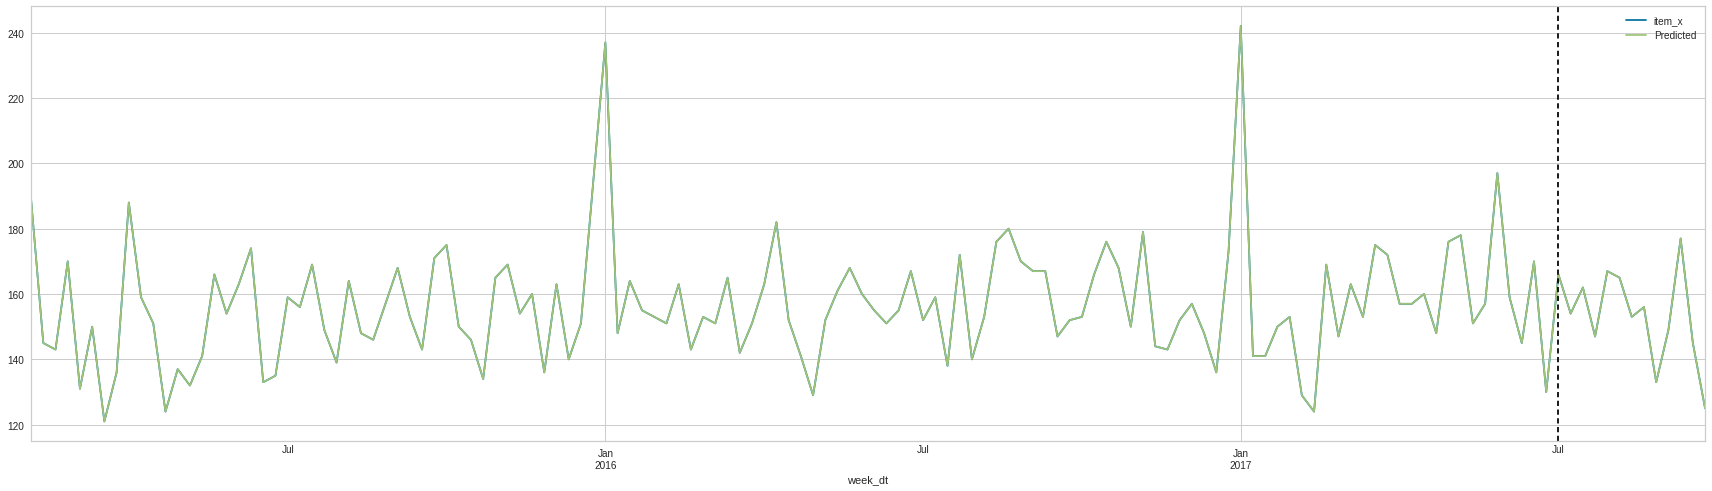

In [ ]:
fig = df_fc_pred[['item_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

###Monthly

In [ ]:
item_1.head(2)

order_dt                                item_name  cust  order  item  \
0 2015-01-01  Nike Men's CJ Elite 2 TD Football Cleat    16     16    19   
1 2015-01-02  Nike Men's CJ Elite 2 TD Football Cleat    19     19    20   

           price          disc         profit  year  month  week    week_dt  
0 2,210.45998376 259.349999667  452.210003421  2015      1     1 2015-01-05  
1 2,322.24998466 277.549998527 -390.930004339  2015      1     1 2015-01-05

In [ ]:
item_1['month'] = pd.to_datetime(item_1['order_dt'].dt.strftime('%Y-%m-01'))

In [ ]:
item_1_monthly = item_1.groupby('month')[['cust','order','item','price','disc','profit']].sum().reset_index()
item_1_monthly.head(3)

month  cust  order  item           price            disc  \
0 2015-01-01   529    529   620 72,398.59946184 8,195.199975569   
1 2015-02-01   528    528   642 74,998.37944516 8,455.199974141   
2 2015-03-01   527    527   618 72,181.51946004 8,152.299975949   

           profit  
0 7,821.069961414  
1  7,350.35998651  
2 8,563.909996338

In [ ]:
#wont work, week date shows only monday
# Order df_fc
item_1_monthly_fc = item_1_monthly.sort_values(by = ['month']).copy()

# Day dummies
item_1_monthly_fc['dayname'] = item_1_monthly_fc['month'].dt.day_name()
item_1_monthly_fc = pd.get_dummies(item_1_monthly_fc, drop_first = True)

# # Set Date as index
item_1_monthly_fc = item_1_monthly_fc.set_index(['month'])
item_1_monthly_fc.head(3)


cust  order  item           price            disc          profit  \
month                                                                           
2015-01-01   529    529   620 72,398.59946184 8,195.199975569 7,821.069961414   
2015-02-01   528    528   642 74,998.37944516 8,455.199974141  7,350.35998651   
2015-03-01   527    527   618 72,181.51946004 8,152.299975949 8,563.909996338   

            dayname_Monday  dayname_Saturday  dayname_Sunday  \
month                                                          
2015-01-01               0                 0               0   
2015-02-01               0                 0               1   
2015-03-01               0                 0               1   

            dayname_Thursday  dayname_Tuesday  dayname_Wednesday  
month                                                             
2015-01-01                 1                0                  0  
2015-02-01                 0                0                  0  
2015-03-01                 0                0                  0

In [ ]:
# Lagged_variables
item_1_monthly_fc['lag1_profit']  = item_1_monthly_fc['profit'].shift(1)
item_1_monthly_fc['lag2_profit']  = item_1_monthly_fc['profit'].shift(2)
item_1_monthly_fc['lag3_profit']  = item_1_monthly_fc['profit'].shift(3)
# item_1_monthly_fc['lag4_profit']  = item_1_monthly_fc['profit'].shift(4)
# item_1_monthly_fc['lag5_profit']  = item_1_monthly_fc['profit'].shift(5)
# item_1_monthly_fc['lag6_profit']  = item_1_monthly_fc['profit'].shift(6)
# item_1_monthly_fc['lag7_profit']  = item_1_monthly_fc['profit'].shift(7)
item_1_monthly_fc['lag1_cust']    = item_1_monthly_fc['cust'].shift(1)
item_1_monthly_fc['lag2_cust']    = item_1_monthly_fc['cust'].shift(2)
item_1_monthly_fc['lag3_cust']    = item_1_monthly_fc['cust'].shift(3)
item_1_monthly_fc['lag1_order']   = item_1_monthly_fc['order'].shift(1)
item_1_monthly_fc['lag2_order']   = item_1_monthly_fc['order'].shift(2)
item_1_monthly_fc['lag3_order']   = item_1_monthly_fc['order'].shift(3)
item_1_monthly_fc['lag1_item']    = item_1_monthly_fc['item'].shift(1)
item_1_monthly_fc['lag2_item']    = item_1_monthly_fc['item'].shift(2)
item_1_monthly_fc['lag3_item']    = item_1_monthly_fc['item'].shift(3)
item_1_monthly_fc['lag1_price']   = item_1_monthly_fc['price'].shift(1)
item_1_monthly_fc['lag2_price']   = item_1_monthly_fc['price'].shift(2)
item_1_monthly_fc['lag3_price']   = item_1_monthly_fc['price'].shift(3)
item_1_monthly_fc['lag1_disc']    = item_1_monthly_fc['disc'].shift(1)
item_1_monthly_fc['lag2_disc']    = item_1_monthly_fc['disc'].shift(2)
item_1_monthly_fc['lag3_disc']    = item_1_monthly_fc['disc'].shift(3)
item_1_monthly_fc.head(3)

cust  order  item           price            disc          profit  \
month                                                                           
2015-01-01   529    529   620 72,398.59946184 8,195.199975569 7,821.069961414   
2015-02-01   528    528   642 74,998.37944516 8,455.199974141  7,350.35998651   
2015-03-01   527    527   618 72,181.51946004 8,152.299975949 8,563.909996338   

            dayname_Monday  dayname_Saturday  dayname_Sunday  \
month                                                          
2015-01-01               0                 0               0   
2015-02-01               0                 0               1   
2015-03-01               0                 0               1   

            dayname_Thursday  dayname_Tuesday  dayname_Wednesday  \
month                                                              
2015-01-01                 1                0                  0   
2015-02-01                 0                0                  0   
2015-03-01                 0                0                  0   

               lag1_profit     lag2_profit  lag3_profit  lag1_cust  lag2_cust  \
month                                                                           
2015-01-01             NaN             NaN          NaN        NaN        NaN   
2015-02-01 7,821.069961414             NaN          NaN      529.0        NaN   
2015-03-01  7,350.35998651 7,821.069961414          NaN      528.0      529.0   

            lag3_cust  lag1_order  lag2_order  lag3_order  lag1_item  \
month                                                                  
2015-01-01        NaN         NaN         NaN         NaN        NaN   
2015-02-01        NaN       529.0         NaN         NaN      620.0   
2015-03-01        NaN       528.0       529.0         NaN      642.0   

            lag2_item  lag3_item      lag1_price      lag2_price  lag3_price  \
month                                                                          
2015-01-01        NaN        NaN             NaN             NaN         NaN   
2015-02-01        NaN        NaN 72,398.59946184             NaN         NaN   
2015-03-01      620.0        NaN 74,998.37944516 72,398.59946184         NaN   

                 lag1_disc       lag2_disc  lag3_disc  
month                                                  
2015-01-01             NaN             NaN        NaN  
2015-02-01 8,195.199975569             NaN        NaN  
2015-03-01 8,455.199974141 8,195.199975569        NaN

In [ ]:
# Data for forecasting
item_1_monthly_fc_mdl = item_1_monthly_fc.copy()

# Remove NA
item_1_monthly_fc_mdl = item_1_monthly_fc_mdl[~item_1_monthly_fc_mdl.isna().any(axis=1)]

item_1_monthly_fc_mdl.columns

Index(['cust', 'order', 'item', 'price', 'disc', 'profit', 'dayname_Monday',
       'dayname_Saturday', 'dayname_Sunday', 'dayname_Thursday',
       'dayname_Tuesday', 'dayname_Wednesday', 'lag1_profit', 'lag2_profit',
       'lag3_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust', 'lag1_order',
       'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item', 'lag3_item',
       'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc', 'lag2_disc',
       'lag3_disc'],
      dtype='object')

In [ ]:
# Define predictor and 
X = item_1_monthly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'dayname_Monday',
       'dayname_Saturday', 'dayname_Sunday', 'dayname_Thursday',
       'dayname_Tuesday', 'dayname_Wednesday', 'lag1_profit', 'lag2_profit',
       'lag3_profit', 
      #  'lag4_profit', 'lag5_profit', 'lag6_profit', 'lag7_profit', 
       'lag1_cust', 'lag2_cust', 'lag3_cust', 'lag1_order',
       'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item', 'lag3_item',
       'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc', 'lag2_disc',
       'lag3_disc']]
y = item_1_monthly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

In [ ]:
from sklearn.linear_model import LinearRegression # model lin. reg

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Daily   - 0.11180955886232002
# Weekly  - 0.3978376486486339
# Monthly - 0.9999999975787626
model.score(X_train,y_train)

0.9915242084542595

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = item_1_monthly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)
df_fc_pred.head(3)

cust  order  item           price            disc  \
month                                                           
2015-04-01   564    564   653 76,317.11942776 8,566.349974236   
2015-05-01   546    546   644 75,190.75944246 8,522.799974523   
2015-06-01   547    547   666 77,795.08942132 8,778.249973619   

                   profit_x  dayname_Monday  dayname_Saturday  dayname_Sunday  \
month                                                                           
2015-04-01  6,208.910050155               0                 0               0   
2015-05-01 10,143.269972876               0                 0               0   
2015-06-01  8,428.060019426               1                 0               0   

            dayname_Thursday  dayname_Tuesday  dayname_Wednesday  \
month                                                              
2015-04-01                 0                0                  1   
2015-05-01                 0                0                  0   
2015-06-01                 0                0                  0   

                lag1_profit     lag2_profit     lag3_profit  lag1_cust  \
month                                                                    
2015-04-01  8,563.909996338  7,350.35998651 7,821.069961414      527.0   
2015-05-01  6,208.910050155 8,563.909996338  7,350.35998651      564.0   
2015-06-01 10,143.269972876 6,208.910050155 8,563.909996338      546.0   

            lag2_cust  lag3_cust  lag1_order  lag2_order  lag3_order  \
month                                                                  
2015-04-01      528.0      529.0       527.0       528.0       529.0   
2015-05-01      527.0      528.0       564.0       527.0       528.0   
2015-06-01      564.0      527.0       546.0       564.0       527.0   

            lag1_item  lag2_item  lag3_item      lag1_price      lag2_price  \
month                                                                         
2015-04-01      618.0      642.0      620.0 72,181.51946004 74,998.37944516   
2015-05-01      653.0      618.0      642.0 76,317.11942776 72,181.51946004   
2015-06-01      644.0      653.0      618.0 75,190.75944246 76,317.11942776   

                lag3_price       lag1_disc       lag2_disc       lag3_disc  \
month                                                                        
2015-04-01 72,398.59946184 8,152.299975949 8,455.199974141 8,195.199975569   
2015-05-01 74,998.37944516 8,566.349974236 8,152.299975949 8,455.199974141   
2015-06-01 72,181.51946004 8,522.799974523 8,566.349974236 8,152.299975949   

                   profit_y           Predicted  
month                                            
2015-04-01  6,208.910050155  5,967.641924400925  
2015-05-01 10,143.269972876 10,192.442705650925  
2015-06-01  8,428.060019426  8,323.866045494675

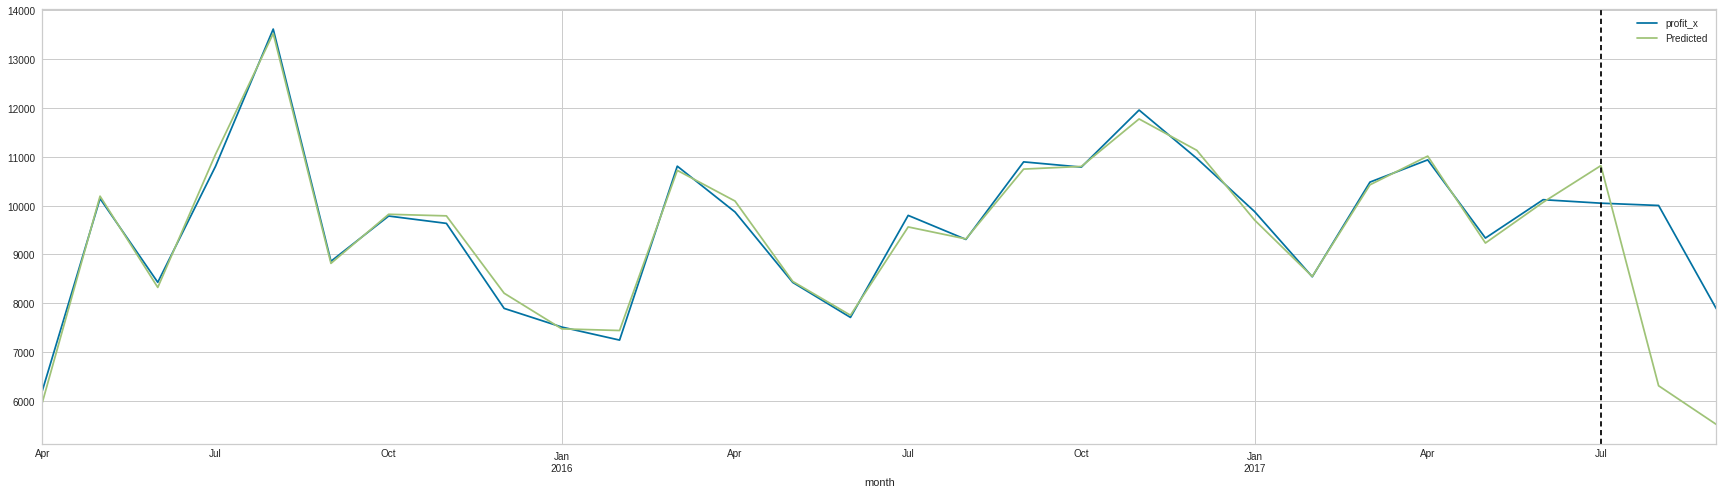

In [ ]:
fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

#Item 2

In [ ]:
item_2[item_2['week_dt']>'2017-10-01']

order_dt                                      item_name  cust  order  \
16303 2017-01-01  Diamondback Women's Serene Classic Comfort Bi    11     11   

       item        price  disc            profit  year  month  week    week_dt  
16303    14 3,682.230072 517.5 49.63998391999996  2017      1    52 2017-12-25

In [ ]:
item_2.at[16303,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
item_2_weekly = item_2.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

item_2_weekly_fc = item_2_weekly.sort_values(by = ['week_dt']).copy()
item_2_weekly_fc['dayname'] = item_2_weekly_fc['week_dt'].dt.day_name()
item_2_weekly_fc = pd.get_dummies(item_2_weekly_fc, drop_first = True)
item_2_weekly_fc = item_2_weekly_fc.set_index(['week_dt'])

item_2_weekly_fc['lag1_profit']  = item_2_weekly_fc['profit'].shift(1)
item_2_weekly_fc['lag2_profit']  = item_2_weekly_fc['profit'].shift(2)
item_2_weekly_fc['lag3_profit']  = item_2_weekly_fc['profit'].shift(3)
item_2_weekly_fc['lag4_profit']  = item_2_weekly_fc['profit'].shift(4)
item_2_weekly_fc['lag5_profit']  = item_2_weekly_fc['profit'].shift(5)
item_2_weekly_fc['lag6_profit']  = item_2_weekly_fc['profit'].shift(6)
item_2_weekly_fc['lag7_profit']  = item_2_weekly_fc['profit'].shift(7)
item_2_weekly_fc['lag1_cust']    = item_2_weekly_fc['cust'].shift(1)
item_2_weekly_fc['lag2_cust']    = item_2_weekly_fc['cust'].shift(2)
item_2_weekly_fc['lag3_cust']    = item_2_weekly_fc['cust'].shift(3)
item_2_weekly_fc['lag1_order']   = item_2_weekly_fc['order'].shift(1)
item_2_weekly_fc['lag2_order']   = item_2_weekly_fc['order'].shift(2)
item_2_weekly_fc['lag3_order']   = item_2_weekly_fc['order'].shift(3)
item_2_weekly_fc['lag1_item']    = item_2_weekly_fc['item'].shift(1)
item_2_weekly_fc['lag2_item']    = item_2_weekly_fc['item'].shift(2)
item_2_weekly_fc['lag3_item']    = item_2_weekly_fc['item'].shift(3)
item_2_weekly_fc['lag1_price']   = item_2_weekly_fc['price'].shift(1)
item_2_weekly_fc['lag2_price']   = item_2_weekly_fc['price'].shift(2)
item_2_weekly_fc['lag3_price']   = item_2_weekly_fc['price'].shift(3)
item_2_weekly_fc['lag1_disc']    = item_2_weekly_fc['disc'].shift(1)
item_2_weekly_fc['lag2_disc']    = item_2_weekly_fc['disc'].shift(2)
item_2_weekly_fc['lag3_disc']    = item_2_weekly_fc['disc'].shift(3)

item_2_weekly_fc_mdl = item_2_weekly_fc.copy()
item_2_weekly_fc_mdl = item_2_weekly_fc_mdl[~item_2_weekly_fc_mdl.isna().any(axis=1)]

X = item_2_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = item_2_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.21057372690354914

In [ ]:
#Item 0 - 0.21913858220715
#Item 1 - 0.3978376486486339

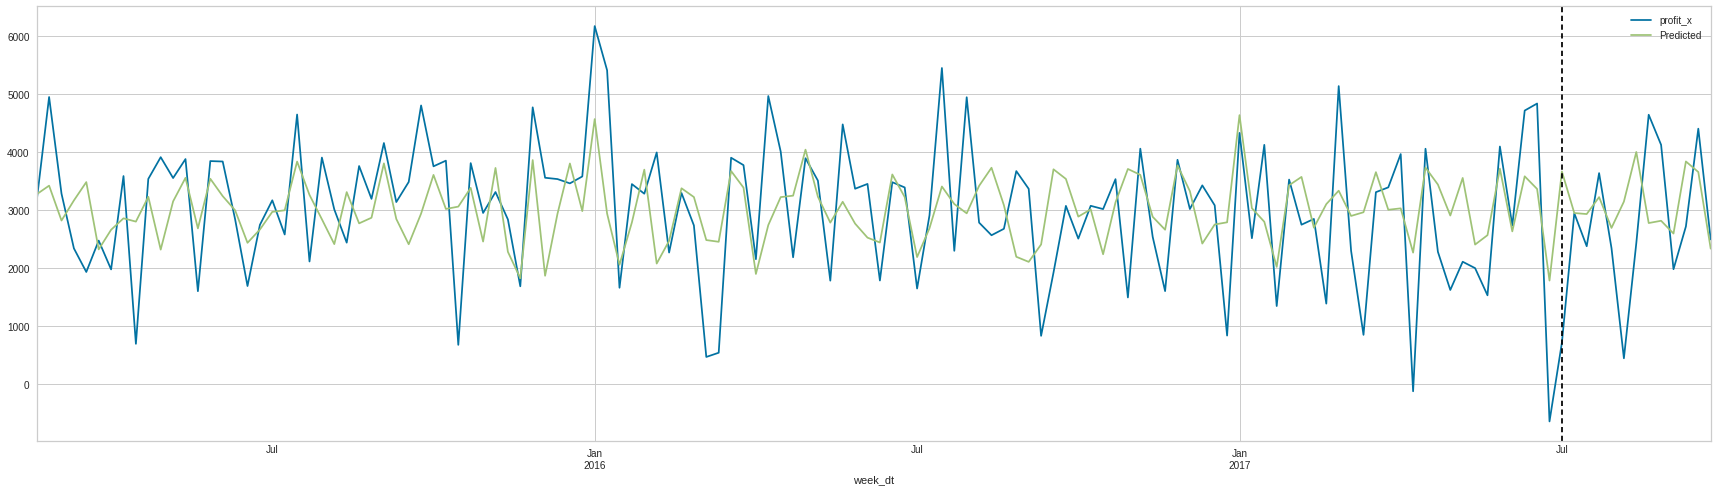

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = item_2_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

#Item 3

In [ ]:
item_3[item_3['week_dt']>'2017-10-01']

order_dt                             item_name  cust  order  item  \
16308 2017-01-01  Nike Men's Dri-FIT Victory Golf Polo    19     19    83   

        price  disc        profit  year  month  week    week_dt  
16308 3,704.5 445.5 -77.589991991  2017      1    52 2017-12-25

In [ ]:
item_3.at[16308,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
item_3_weekly = item_3.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

item_3_weekly_fc = item_3_weekly.sort_values(by = ['week_dt']).copy()
item_3_weekly_fc['dayname'] = item_3_weekly_fc['week_dt'].dt.day_name()
item_3_weekly_fc = pd.get_dummies(item_3_weekly_fc, drop_first = True)
item_3_weekly_fc = item_3_weekly_fc.set_index(['week_dt'])

item_3_weekly_fc['lag1_profit']  = item_3_weekly_fc['profit'].shift(1)
item_3_weekly_fc['lag2_profit']  = item_3_weekly_fc['profit'].shift(2)
item_3_weekly_fc['lag3_profit']  = item_3_weekly_fc['profit'].shift(3)
item_3_weekly_fc['lag4_profit']  = item_3_weekly_fc['profit'].shift(4)
item_3_weekly_fc['lag5_profit']  = item_3_weekly_fc['profit'].shift(5)
item_3_weekly_fc['lag6_profit']  = item_3_weekly_fc['profit'].shift(6)
item_3_weekly_fc['lag7_profit']  = item_3_weekly_fc['profit'].shift(7)
item_3_weekly_fc['lag1_cust']    = item_3_weekly_fc['cust'].shift(1)
item_3_weekly_fc['lag2_cust']    = item_3_weekly_fc['cust'].shift(2)
item_3_weekly_fc['lag3_cust']    = item_3_weekly_fc['cust'].shift(3)
item_3_weekly_fc['lag1_order']   = item_3_weekly_fc['order'].shift(1)
item_3_weekly_fc['lag2_order']   = item_3_weekly_fc['order'].shift(2)
item_3_weekly_fc['lag3_order']   = item_3_weekly_fc['order'].shift(3)
item_3_weekly_fc['lag1_item']    = item_3_weekly_fc['item'].shift(1)
item_3_weekly_fc['lag2_item']    = item_3_weekly_fc['item'].shift(2)
item_3_weekly_fc['lag3_item']    = item_3_weekly_fc['item'].shift(3)
item_3_weekly_fc['lag1_price']   = item_3_weekly_fc['price'].shift(1)
item_3_weekly_fc['lag2_price']   = item_3_weekly_fc['price'].shift(2)
item_3_weekly_fc['lag3_price']   = item_3_weekly_fc['price'].shift(3)
item_3_weekly_fc['lag1_disc']    = item_3_weekly_fc['disc'].shift(1)
item_3_weekly_fc['lag2_disc']    = item_3_weekly_fc['disc'].shift(2)
item_3_weekly_fc['lag3_disc']    = item_3_weekly_fc['disc'].shift(3)

item_3_weekly_fc_mdl = item_3_weekly_fc.copy()
item_3_weekly_fc_mdl = item_3_weekly_fc_mdl[~item_3_weekly_fc_mdl.isna().any(axis=1)]

X = item_3_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = item_3_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.2681712677581929

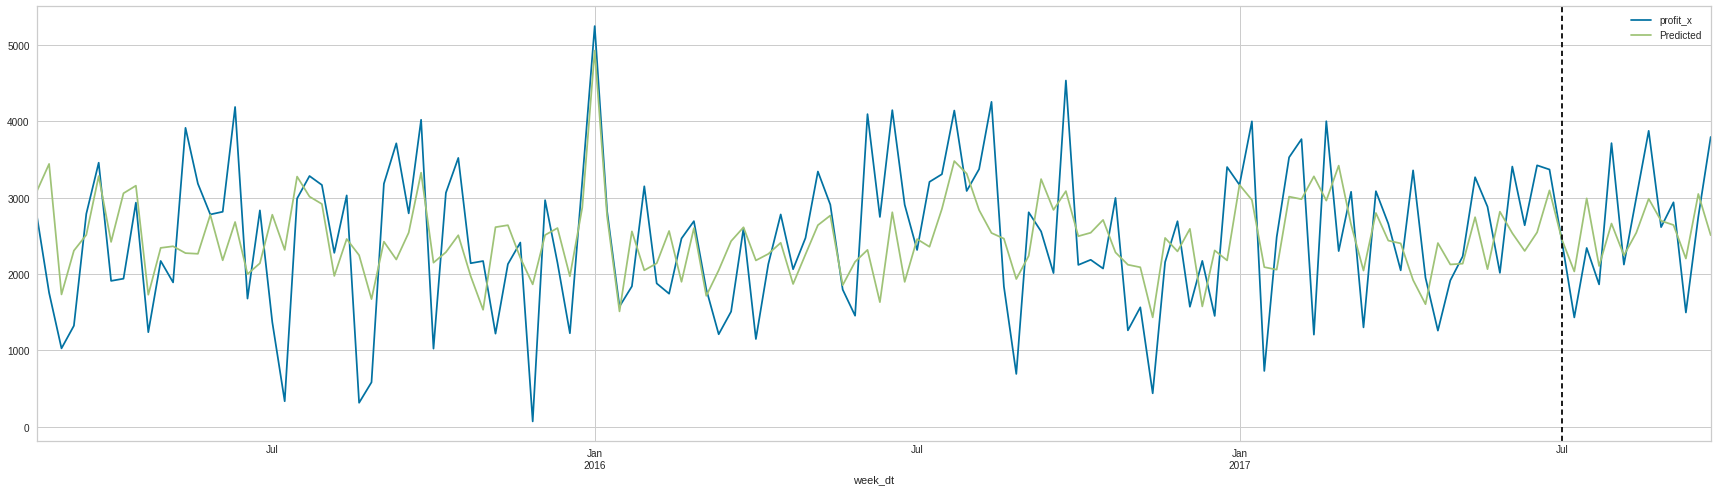

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = item_3_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

#Item 4

In [ ]:
item_4[item_4['week_dt']>'2017-10-01']

order_dt                    item_name  cust  order  item        price  \
16312 2017-01-01  Pelican Sunstream 100 Kayak     6      6     6 1,001.940033   

       disc       profit  year  month  week    week_dt  
16312 198.0 327.64999962  2017      1    52 2017-12-25

In [ ]:
item_4.at[16312,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
item_4_weekly = item_4.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

item_4_weekly_fc = item_4_weekly.sort_values(by = ['week_dt']).copy()
item_4_weekly_fc['dayname'] = item_4_weekly_fc['week_dt'].dt.day_name()
item_4_weekly_fc = pd.get_dummies(item_4_weekly_fc, drop_first = True)
item_4_weekly_fc = item_4_weekly_fc.set_index(['week_dt'])

item_4_weekly_fc['lag1_profit']  = item_4_weekly_fc['profit'].shift(1)
item_4_weekly_fc['lag2_profit']  = item_4_weekly_fc['profit'].shift(2)
item_4_weekly_fc['lag3_profit']  = item_4_weekly_fc['profit'].shift(3)
item_4_weekly_fc['lag4_profit']  = item_4_weekly_fc['profit'].shift(4)
item_4_weekly_fc['lag5_profit']  = item_4_weekly_fc['profit'].shift(5)
item_4_weekly_fc['lag6_profit']  = item_4_weekly_fc['profit'].shift(6)
item_4_weekly_fc['lag7_profit']  = item_4_weekly_fc['profit'].shift(7)
item_4_weekly_fc['lag1_cust']    = item_4_weekly_fc['cust'].shift(1)
item_4_weekly_fc['lag2_cust']    = item_4_weekly_fc['cust'].shift(2)
item_4_weekly_fc['lag3_cust']    = item_4_weekly_fc['cust'].shift(3)
item_4_weekly_fc['lag1_order']   = item_4_weekly_fc['order'].shift(1)
item_4_weekly_fc['lag2_order']   = item_4_weekly_fc['order'].shift(2)
item_4_weekly_fc['lag3_order']   = item_4_weekly_fc['order'].shift(3)
item_4_weekly_fc['lag1_item']    = item_4_weekly_fc['item'].shift(1)
item_4_weekly_fc['lag2_item']    = item_4_weekly_fc['item'].shift(2)
item_4_weekly_fc['lag3_item']    = item_4_weekly_fc['item'].shift(3)
item_4_weekly_fc['lag1_price']   = item_4_weekly_fc['price'].shift(1)
item_4_weekly_fc['lag2_price']   = item_4_weekly_fc['price'].shift(2)
item_4_weekly_fc['lag3_price']   = item_4_weekly_fc['price'].shift(3)
item_4_weekly_fc['lag1_disc']    = item_4_weekly_fc['disc'].shift(1)
item_4_weekly_fc['lag2_disc']    = item_4_weekly_fc['disc'].shift(2)
item_4_weekly_fc['lag3_disc']    = item_4_weekly_fc['disc'].shift(3)

item_4_weekly_fc_mdl = item_4_weekly_fc.copy()
item_4_weekly_fc_mdl = item_4_weekly_fc_mdl[~item_4_weekly_fc_mdl.isna().any(axis=1)]

X = item_4_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = item_4_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.2163552095523682

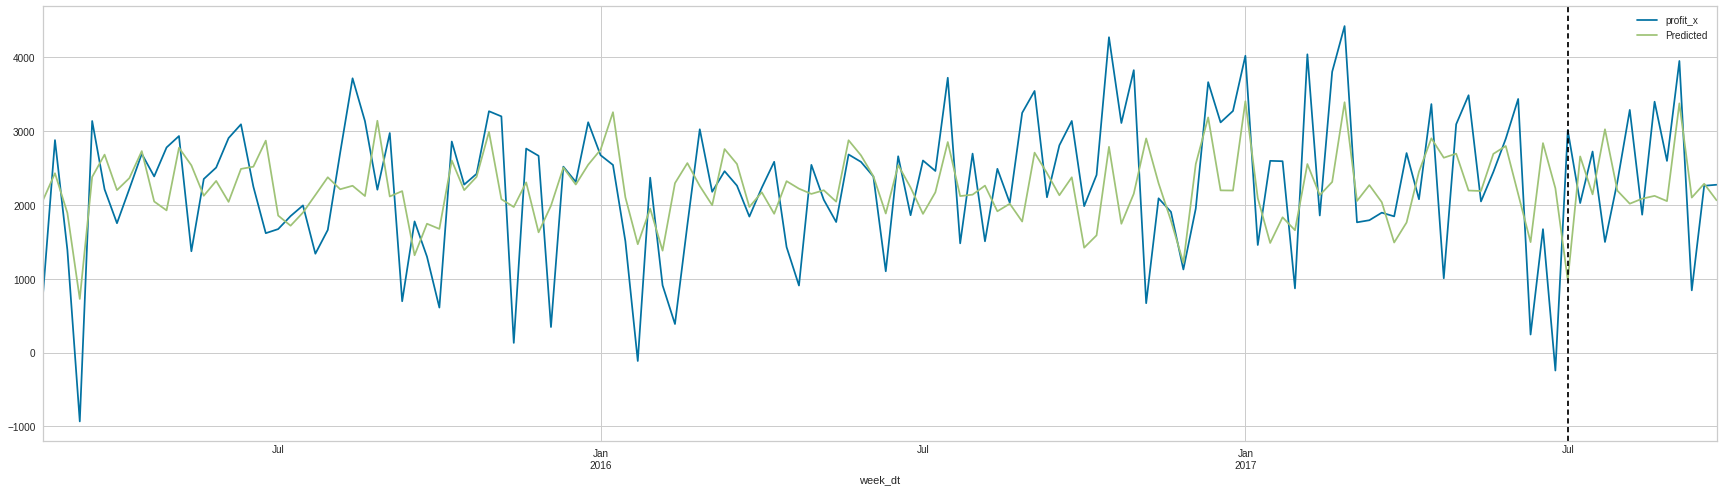

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = item_4_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

#Item 0

In [ ]:
item_0[item_0['week_dt']>'2017-10-01']

order_dt                         item_name  cust  order  item  \
16311 2017-01-01  O'Brien Men's Neoprene Life Vest    11     11    42   

               price         disc            profit  year  month  week  \
16311 1,824.77997982 274.38999938 72.76001359900002  2017      1    52   

         week_dt  
16311 2017-12-25

In [ ]:
item_0.at[16312,'week_dt'] = pd.to_datetime('2016-12-26')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


In [ ]:
item_0_weekly = item_0.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

item_0_weekly_fc = item_0_weekly.sort_values(by = ['week_dt']).copy()
item_0_weekly_fc['dayname'] = item_0_weekly_fc['week_dt'].dt.day_name()
item_0_weekly_fc = pd.get_dummies(item_0_weekly_fc, drop_first = True)
item_0_weekly_fc = item_0_weekly_fc.set_index(['week_dt'])

item_0_weekly_fc['lag1_profit']  = item_0_weekly_fc['profit'].shift(1)
item_0_weekly_fc['lag2_profit']  = item_0_weekly_fc['profit'].shift(2)
item_0_weekly_fc['lag3_profit']  = item_0_weekly_fc['profit'].shift(3)
item_0_weekly_fc['lag4_profit']  = item_0_weekly_fc['profit'].shift(4)
item_0_weekly_fc['lag5_profit']  = item_0_weekly_fc['profit'].shift(5)
item_0_weekly_fc['lag6_profit']  = item_0_weekly_fc['profit'].shift(6)
item_0_weekly_fc['lag7_profit']  = item_0_weekly_fc['profit'].shift(7)
item_0_weekly_fc['lag1_cust']    = item_0_weekly_fc['cust'].shift(1)
item_0_weekly_fc['lag2_cust']    = item_0_weekly_fc['cust'].shift(2)
item_0_weekly_fc['lag3_cust']    = item_0_weekly_fc['cust'].shift(3)
item_0_weekly_fc['lag1_order']   = item_0_weekly_fc['order'].shift(1)
item_0_weekly_fc['lag2_order']   = item_0_weekly_fc['order'].shift(2)
item_0_weekly_fc['lag3_order']   = item_0_weekly_fc['order'].shift(3)
item_0_weekly_fc['lag1_item']    = item_0_weekly_fc['item'].shift(1)
item_0_weekly_fc['lag2_item']    = item_0_weekly_fc['item'].shift(2)
item_0_weekly_fc['lag3_item']    = item_0_weekly_fc['item'].shift(3)
item_0_weekly_fc['lag1_price']   = item_0_weekly_fc['price'].shift(1)
item_0_weekly_fc['lag2_price']   = item_0_weekly_fc['price'].shift(2)
item_0_weekly_fc['lag3_price']   = item_0_weekly_fc['price'].shift(3)
item_0_weekly_fc['lag1_disc']    = item_0_weekly_fc['disc'].shift(1)
item_0_weekly_fc['lag2_disc']    = item_0_weekly_fc['disc'].shift(2)
item_0_weekly_fc['lag3_disc']    = item_0_weekly_fc['disc'].shift(3)

item_0_weekly_fc_mdl = item_0_weekly_fc.copy()
item_0_weekly_fc_mdl = item_0_weekly_fc_mdl[~item_0_weekly_fc_mdl.isna().any(axis=1)]

X = item_0_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = item_0_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.22156612657036223

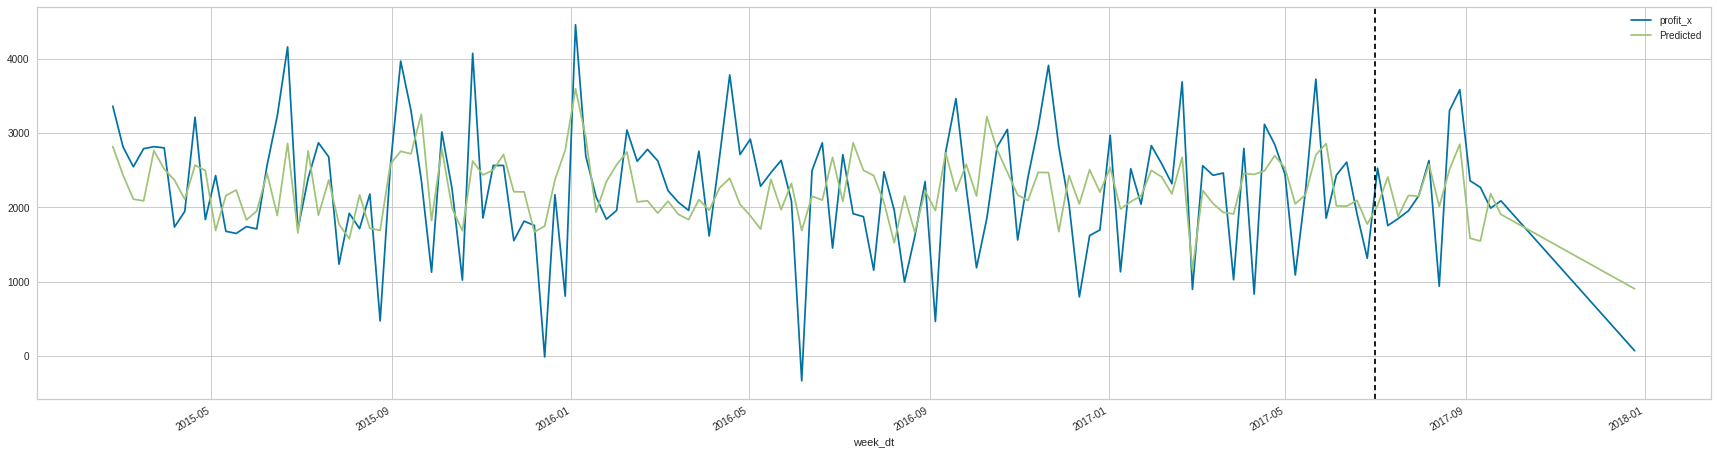

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = item_0_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

#Item 5

In [ ]:
item_5[item_5['week_dt']>'2017-10-01']

order_dt                                  item_name  cust  order  \
16304 2017-01-01  Field & Stream Sportsman 16 Gun Fire Safe    13     13   

       item         price  disc         profit  year  month  week    week_dt  
16304    13 4,643.7501222 556.0 1,275.58000184  2017      1    52 2017-12-25

In [ ]:
item_5.at[16304,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
item_5_weekly = item_5.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

item_5_weekly_fc = item_5_weekly.sort_values(by = ['week_dt']).copy()
item_5_weekly_fc['dayname'] = item_5_weekly_fc['week_dt'].dt.day_name()
item_5_weekly_fc = pd.get_dummies(item_5_weekly_fc, drop_first = True)
item_5_weekly_fc = item_5_weekly_fc.set_index(['week_dt'])

item_5_weekly_fc['lag1_profit']  = item_5_weekly_fc['profit'].shift(1)
item_5_weekly_fc['lag2_profit']  = item_5_weekly_fc['profit'].shift(2)
item_5_weekly_fc['lag3_profit']  = item_5_weekly_fc['profit'].shift(3)
item_5_weekly_fc['lag4_profit']  = item_5_weekly_fc['profit'].shift(4)
item_5_weekly_fc['lag5_profit']  = item_5_weekly_fc['profit'].shift(5)
item_5_weekly_fc['lag6_profit']  = item_5_weekly_fc['profit'].shift(6)
item_5_weekly_fc['lag7_profit']  = item_5_weekly_fc['profit'].shift(7)
item_5_weekly_fc['lag1_cust']    = item_5_weekly_fc['cust'].shift(1)
item_5_weekly_fc['lag2_cust']    = item_5_weekly_fc['cust'].shift(2)
item_5_weekly_fc['lag3_cust']    = item_5_weekly_fc['cust'].shift(3)
item_5_weekly_fc['lag1_order']   = item_5_weekly_fc['order'].shift(1)
item_5_weekly_fc['lag2_order']   = item_5_weekly_fc['order'].shift(2)
item_5_weekly_fc['lag3_order']   = item_5_weekly_fc['order'].shift(3)
item_5_weekly_fc['lag1_item']    = item_5_weekly_fc['item'].shift(1)
item_5_weekly_fc['lag2_item']    = item_5_weekly_fc['item'].shift(2)
item_5_weekly_fc['lag3_item']    = item_5_weekly_fc['item'].shift(3)
item_5_weekly_fc['lag1_price']   = item_5_weekly_fc['price'].shift(1)
item_5_weekly_fc['lag2_price']   = item_5_weekly_fc['price'].shift(2)
item_5_weekly_fc['lag3_price']   = item_5_weekly_fc['price'].shift(3)
item_5_weekly_fc['lag1_disc']    = item_5_weekly_fc['disc'].shift(1)
item_5_weekly_fc['lag2_disc']    = item_5_weekly_fc['disc'].shift(2)
item_5_weekly_fc['lag3_disc']    = item_5_weekly_fc['disc'].shift(3)

item_5_weekly_fc_mdl = item_5_weekly_fc.copy()
item_5_weekly_fc_mdl = item_5_weekly_fc_mdl[~item_5_weekly_fc_mdl.isna().any(axis=1)]

X = item_5_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = item_5_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.2368439356245925

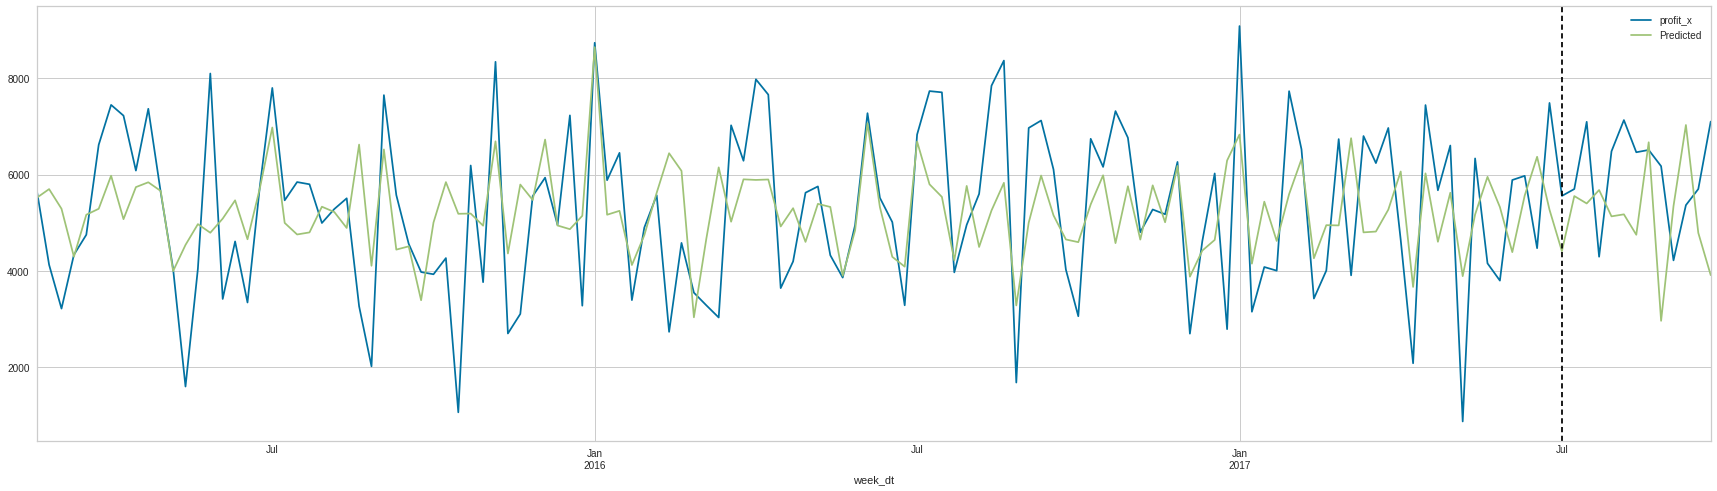

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = item_5_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

#cust segment

In [ ]:
profit_summary_seg = df.groupby(['order_dt','cust_segment','cust_id','order_id']).agg(
                       total_item  = ('qty','sum'),
                       total_price = ('final_price','sum'),
                       total_disc  = ('discount','sum'),
                       total_profit= ('profit','sum')
                   ).reset_index()
profit_summary_seg = profit_summary_seg[profit_summary_seg['order_dt']<'2017-10-01']
profit_summary_seg.head(3)

order_dt cust_segment  cust_id  order_id  total_item  total_price  \
0 2015-01-01     Consumer      256         2           7  529.3800049   
1 2015-01-01     Consumer     1148        63           4 878.92002108   
2 2015-01-01     Consumer     1792        66           5  573.2399902   

     total_disc  total_profit  
0   50.60000038  195.90000153  
1          21.0  258.29000469  
2 106.700000048  176.02000046

In [ ]:
profit_summary_seg1 =  profit_summary_seg.groupby(['order_dt','cust_segment']).agg(
                      cust    = ('cust_id','count'),
                      order   = ('order_id','count'),
                      item    = ('total_item','sum'),
                      price   = ('total_price','sum'),
                      disc    = ('total_disc','sum'),
                      profit  = ('total_profit','sum')  
                    ).reset_index()
profit_summary_seg1.head(3)

order_dt cust_segment  cust  order  item           price            disc  \
0 2015-01-01     Consumer    37     37   187 17,415.53023919 1,937.390005106   
1 2015-01-01    Corporate    13     13   100  6,946.95009457   908.910000137   
2 2015-01-01  Home Office     8      8    68  5,017.22006418   580.099998945   

             profit  
0   2,887.919980097  
1     696.560036521  
2 849.0000082060001

In [ ]:
seg_freq = profit_summary_seg1[profit_summary_seg1['order_dt']<'2017-10-01'].groupby('cust_segment')['order_dt'].count().reset_index().sort_values(by='order_dt')
seg_freq[seg_freq['order_dt']==1004]

cust_segment  order_dt
0     Consumer      1004
1    Corporate      1004
2  Home Office      1004

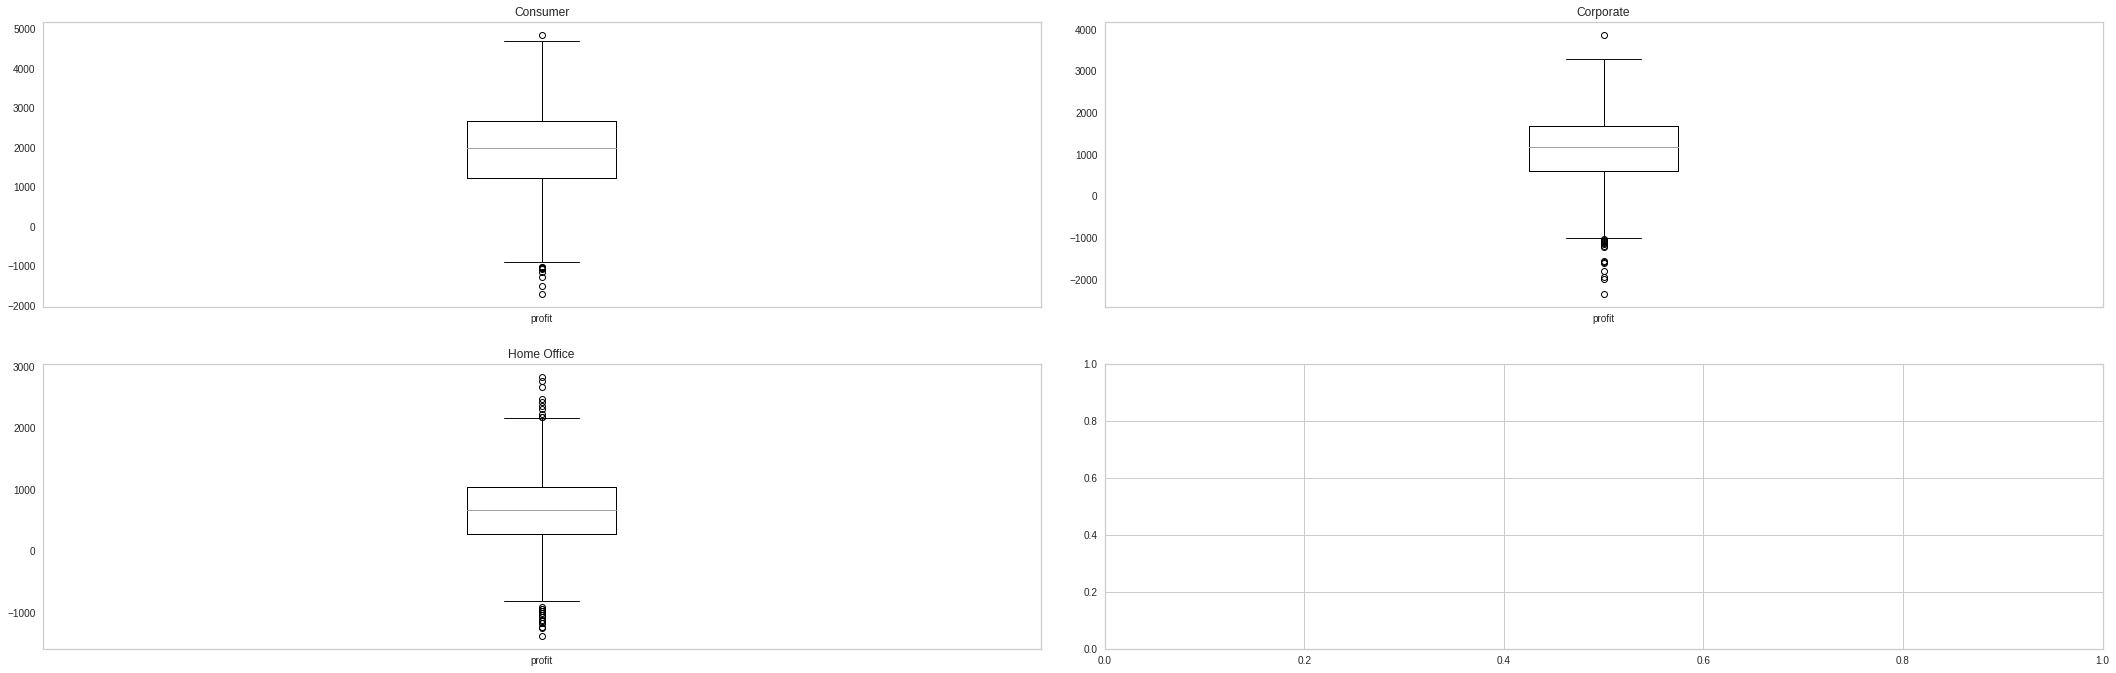

In [ ]:
item = list(seg_freq[seg_freq['order_dt']==1004]['cust_segment'])
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(30,10))
fig.tight_layout(pad=3)

for i,j in enumerate(range(0,3)):
    a = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[j]].boxplot(column=['profit'], ax=axes.flatten()[i],grid=False)

    title = list(seg_freq[seg_freq['order_dt']==1004]['cust_segment'])[j]
    axes.flatten()[i].set_title(title)

plt.show()

In [ ]:
a = 0
Q1 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_seg1[(profit_summary_seg1['cust_segment']==item[a])&
                            ((profit_summary_seg1['profit']<boxplot_min)|
                             (profit_summary_seg1['profit']>boxplot_max))]['item'].count()

print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 1
Q1 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_seg1[(profit_summary_seg1['cust_segment']==item[a])&
                            ((profit_summary_seg1['profit']<boxplot_min)|
                             (profit_summary_seg1['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 2
Q1 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_seg1[(profit_summary_seg1['cust_segment']==item[a])&
                            ((profit_summary_seg1['profit']<boxplot_min)|
                             (profit_summary_seg1['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

Consumer
Outliers:  10
Total Data:  1004
Percent Out:  1.0 %


Corporate
Outliers:  17
Total Data:  1004
Percent Out:  1.69 %


Home Office
Outliers:  26
Total Data:  1004
Percent Out:  2.59 %


In [ ]:
profit_summary_seg1['year'] = profit_summary_seg1['order_dt'].dt.year
profit_summary_seg1['month'] = profit_summary_seg1['order_dt'].dt.month
profit_summary_seg1['week'] = profit_summary_seg1['order_dt'].dt.week
profit_summary_seg1 = profit_summary_seg1.reset_index(drop=True)

<ipython-input-708-4678ddfd13c5>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  profit_summary_seg1['week'] = profit_summary_seg1['order_dt'].dt.week


In [ ]:
profit_summary_seg1['week_dt'] = profit_summary_seg1['year'].astype(str) + profit_summary_seg1['week'].astype(str)
profit_summary_seg1['week_dt'] = profit_summary_seg1['week_dt'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y%W-%w").date())
profit_summary_seg1['week_dt'] = profit_summary_seg1['week_dt'].apply(lambda x: pd.to_datetime(x))
profit_summary_seg1.head(3)

order_dt cust_segment  cust  order  item           price            disc  \
0 2015-01-01     Consumer    37     37   187 17,415.53023919 1,937.390005106   
1 2015-01-01    Corporate    13     13   100  6,946.95009457   908.910000137   
2 2015-01-01  Home Office     8      8    68  5,017.22006418   580.099998945   

             profit  year  month  week    week_dt  
0   2,887.919980097  2015      1     1 2015-01-05  
1     696.560036521  2015      1     1 2015-01-05  
2 849.0000082060001  2015      1     1 2015-01-05

In [ ]:
cust_0 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[0]]
cust_1 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[1]]
cust_2 = profit_summary_seg1[profit_summary_seg1['cust_segment']==item[2]]

##cust 0

In [ ]:
cust_0[cust_0['week_dt']>'2017-10-01']

order_dt cust_segment  cust  order  item           price  \
2193 2017-01-01     Consumer    20     20   125 10,520.43011458   

                disc             profit  year  month  week    week_dt  
2193 1,200.550000309 315.85996799500003  2017      1    52 2017-12-25

In [ ]:
cust_0.at[2193,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
cust_0_weekly = cust_0.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

cust_0_weekly_fc = cust_0_weekly.sort_values(by = ['week_dt']).copy()
cust_0_weekly_fc['dayname'] = cust_0_weekly_fc['week_dt'].dt.day_name()
cust_0_weekly_fc = pd.get_dummies(cust_0_weekly_fc, drop_first = True)
cust_0_weekly_fc = cust_0_weekly_fc.set_index(['week_dt'])

cust_0_weekly_fc['lag1_profit']  = cust_0_weekly_fc['profit'].shift(1)
cust_0_weekly_fc['lag2_profit']  = cust_0_weekly_fc['profit'].shift(2)
cust_0_weekly_fc['lag3_profit']  = cust_0_weekly_fc['profit'].shift(3)
cust_0_weekly_fc['lag4_profit']  = cust_0_weekly_fc['profit'].shift(4)
cust_0_weekly_fc['lag5_profit']  = cust_0_weekly_fc['profit'].shift(5)
cust_0_weekly_fc['lag6_profit']  = cust_0_weekly_fc['profit'].shift(6)
cust_0_weekly_fc['lag7_profit']  = cust_0_weekly_fc['profit'].shift(7)
cust_0_weekly_fc['lag1_cust']    = cust_0_weekly_fc['cust'].shift(1)
cust_0_weekly_fc['lag2_cust']    = cust_0_weekly_fc['cust'].shift(2)
cust_0_weekly_fc['lag3_cust']    = cust_0_weekly_fc['cust'].shift(3)
cust_0_weekly_fc['lag1_order']   = cust_0_weekly_fc['order'].shift(1)
cust_0_weekly_fc['lag2_order']   = cust_0_weekly_fc['order'].shift(2)
cust_0_weekly_fc['lag3_order']   = cust_0_weekly_fc['order'].shift(3)
cust_0_weekly_fc['lag1_item']    = cust_0_weekly_fc['item'].shift(1)
cust_0_weekly_fc['lag2_item']    = cust_0_weekly_fc['item'].shift(2)
cust_0_weekly_fc['lag3_item']    = cust_0_weekly_fc['item'].shift(3)
cust_0_weekly_fc['lag1_price']   = cust_0_weekly_fc['price'].shift(1)
cust_0_weekly_fc['lag2_price']   = cust_0_weekly_fc['price'].shift(2)
cust_0_weekly_fc['lag3_price']   = cust_0_weekly_fc['price'].shift(3)
cust_0_weekly_fc['lag1_disc']    = cust_0_weekly_fc['disc'].shift(1)
cust_0_weekly_fc['lag2_disc']    = cust_0_weekly_fc['disc'].shift(2)
cust_0_weekly_fc['lag3_disc']    = cust_0_weekly_fc['disc'].shift(3)

cust_0_weekly_fc_mdl = cust_0_weekly_fc.copy()
cust_0_weekly_fc_mdl = cust_0_weekly_fc_mdl[~cust_0_weekly_fc_mdl.isna().any(axis=1)]

X = cust_0_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = cust_0_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.30572469149699544

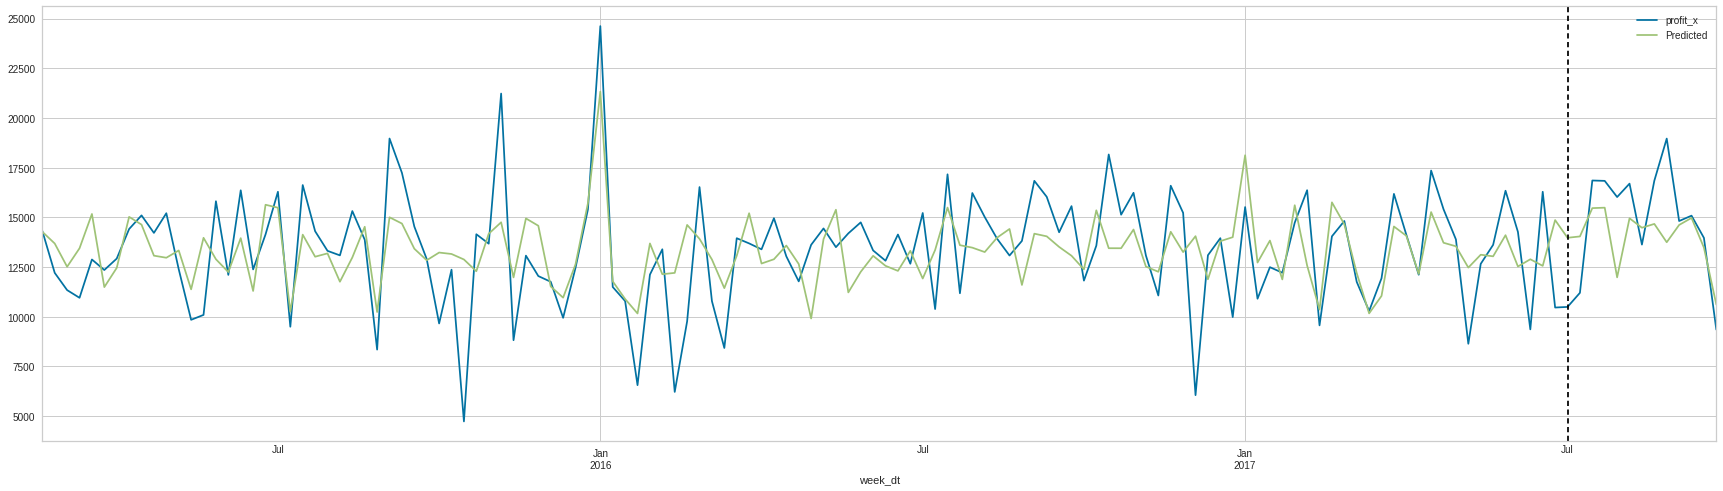

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = cust_0_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

##cust 1

In [ ]:
cust_1[cust_1['week_dt']>'2017-10-01']

order_dt cust_segment  cust  order  item          price  \
2194 2017-01-01    Corporate    18     18   155 11,790.9200899   

                disc          profit  year  month  week    week_dt  
2194 1,367.650003429 1,237.710022956  2017      1    52 2017-12-25

In [ ]:
cust_1.at[2194,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
cust_1_weekly = cust_1.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

cust_1_weekly_fc = cust_1_weekly.sort_values(by = ['week_dt']).copy()
cust_1_weekly_fc['dayname'] = cust_1_weekly_fc['week_dt'].dt.day_name()
cust_1_weekly_fc = pd.get_dummies(cust_1_weekly_fc, drop_first = True)
cust_1_weekly_fc = cust_1_weekly_fc.set_index(['week_dt'])

cust_1_weekly_fc['lag1_profit']  = cust_1_weekly_fc['profit'].shift(1)
cust_1_weekly_fc['lag2_profit']  = cust_1_weekly_fc['profit'].shift(2)
cust_1_weekly_fc['lag3_profit']  = cust_1_weekly_fc['profit'].shift(3)
cust_1_weekly_fc['lag4_profit']  = cust_1_weekly_fc['profit'].shift(4)
cust_1_weekly_fc['lag5_profit']  = cust_1_weekly_fc['profit'].shift(5)
cust_1_weekly_fc['lag6_profit']  = cust_1_weekly_fc['profit'].shift(6)
cust_1_weekly_fc['lag7_profit']  = cust_1_weekly_fc['profit'].shift(7)
cust_1_weekly_fc['lag1_cust']    = cust_1_weekly_fc['cust'].shift(1)
cust_1_weekly_fc['lag2_cust']    = cust_1_weekly_fc['cust'].shift(2)
cust_1_weekly_fc['lag3_cust']    = cust_1_weekly_fc['cust'].shift(3)
cust_1_weekly_fc['lag1_order']   = cust_1_weekly_fc['order'].shift(1)
cust_1_weekly_fc['lag2_order']   = cust_1_weekly_fc['order'].shift(2)
cust_1_weekly_fc['lag3_order']   = cust_1_weekly_fc['order'].shift(3)
cust_1_weekly_fc['lag1_item']    = cust_1_weekly_fc['item'].shift(1)
cust_1_weekly_fc['lag2_item']    = cust_1_weekly_fc['item'].shift(2)
cust_1_weekly_fc['lag3_item']    = cust_1_weekly_fc['item'].shift(3)
cust_1_weekly_fc['lag1_price']   = cust_1_weekly_fc['price'].shift(1)
cust_1_weekly_fc['lag2_price']   = cust_1_weekly_fc['price'].shift(2)
cust_1_weekly_fc['lag3_price']   = cust_1_weekly_fc['price'].shift(3)
cust_1_weekly_fc['lag1_disc']    = cust_1_weekly_fc['disc'].shift(1)
cust_1_weekly_fc['lag2_disc']    = cust_1_weekly_fc['disc'].shift(2)
cust_1_weekly_fc['lag3_disc']    = cust_1_weekly_fc['disc'].shift(3)

cust_1_weekly_fc_mdl = cust_1_weekly_fc.copy()
cust_1_weekly_fc_mdl = cust_1_weekly_fc_mdl[~cust_1_weekly_fc_mdl.isna().any(axis=1)]

X = cust_1_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = cust_1_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.3407264552810607

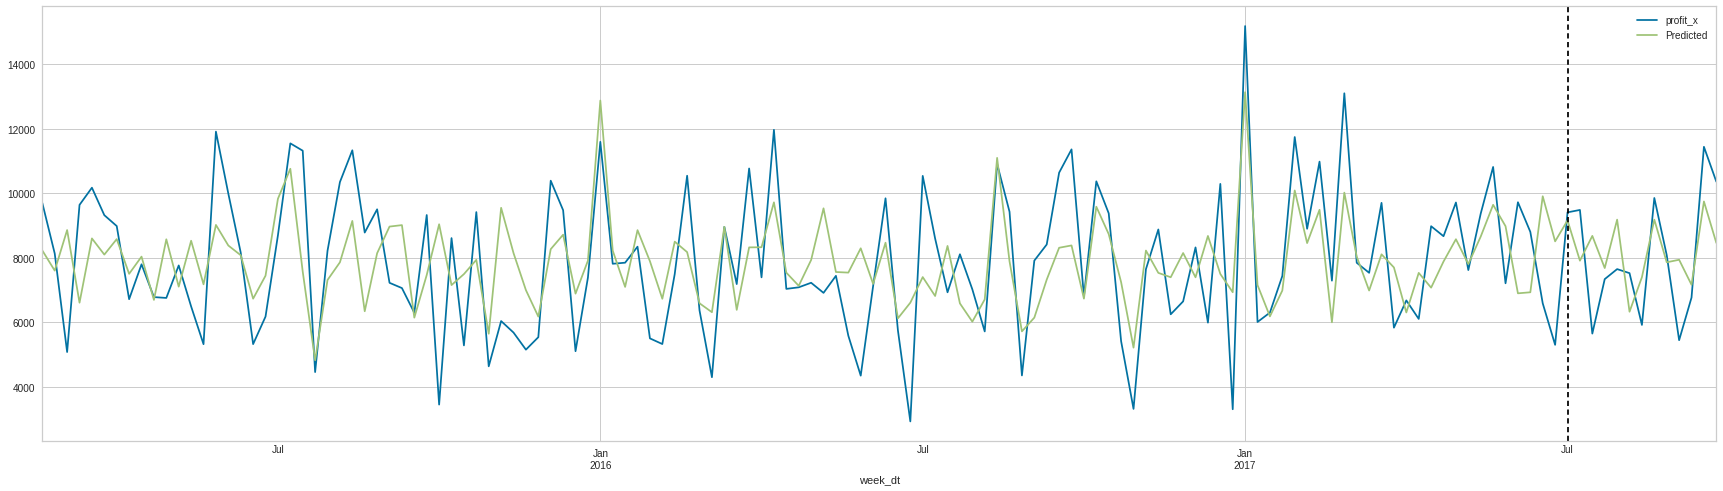

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = cust_1_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

##cust 2 - best

In [ ]:
cust_2[cust_2['week_dt']>'2017-10-01']

order_dt cust_segment  cust  order  item               price  \
2195 2017-01-01  Home Office     9      9    51 4,116.2500648899995   

              disc              profit  year  month  week    week_dt  
2195 475.190001246 1,022.6499972419999  2017      1    52 2017-12-25

In [ ]:
cust_2.at[2195,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
cust_2_weekly = cust_2.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

cust_2_weekly_fc = cust_2_weekly.sort_values(by = ['week_dt']).copy()
cust_2_weekly_fc['dayname'] = cust_2_weekly_fc['week_dt'].dt.day_name()
cust_2_weekly_fc = pd.get_dummies(cust_2_weekly_fc, drop_first = True)
cust_2_weekly_fc = cust_2_weekly_fc.set_index(['week_dt'])

cust_2_weekly_fc['lag1_profit']  = cust_2_weekly_fc['profit'].shift(1)
cust_2_weekly_fc['lag2_profit']  = cust_2_weekly_fc['profit'].shift(2)
cust_2_weekly_fc['lag3_profit']  = cust_2_weekly_fc['profit'].shift(3)
cust_2_weekly_fc['lag4_profit']  = cust_2_weekly_fc['profit'].shift(4)
cust_2_weekly_fc['lag5_profit']  = cust_2_weekly_fc['profit'].shift(5)
cust_2_weekly_fc['lag6_profit']  = cust_2_weekly_fc['profit'].shift(6)
cust_2_weekly_fc['lag7_profit']  = cust_2_weekly_fc['profit'].shift(7)
cust_2_weekly_fc['lag1_cust']    = cust_2_weekly_fc['cust'].shift(1)
cust_2_weekly_fc['lag2_cust']    = cust_2_weekly_fc['cust'].shift(2)
cust_2_weekly_fc['lag3_cust']    = cust_2_weekly_fc['cust'].shift(3)
cust_2_weekly_fc['lag1_order']   = cust_2_weekly_fc['order'].shift(1)
cust_2_weekly_fc['lag2_order']   = cust_2_weekly_fc['order'].shift(2)
cust_2_weekly_fc['lag3_order']   = cust_2_weekly_fc['order'].shift(3)
cust_2_weekly_fc['lag1_item']    = cust_2_weekly_fc['item'].shift(1)
cust_2_weekly_fc['lag2_item']    = cust_2_weekly_fc['item'].shift(2)
cust_2_weekly_fc['lag3_item']    = cust_2_weekly_fc['item'].shift(3)
cust_2_weekly_fc['lag1_price']   = cust_2_weekly_fc['price'].shift(1)
cust_2_weekly_fc['lag2_price']   = cust_2_weekly_fc['price'].shift(2)
cust_2_weekly_fc['lag3_price']   = cust_2_weekly_fc['price'].shift(3)
cust_2_weekly_fc['lag1_disc']    = cust_2_weekly_fc['disc'].shift(1)
cust_2_weekly_fc['lag2_disc']    = cust_2_weekly_fc['disc'].shift(2)
cust_2_weekly_fc['lag3_disc']    = cust_2_weekly_fc['disc'].shift(3)

cust_2_weekly_fc_mdl = cust_2_weekly_fc.copy()
cust_2_weekly_fc_mdl = cust_2_weekly_fc_mdl[~cust_2_weekly_fc_mdl.isna().any(axis=1)]

X = cust_2_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = cust_2_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.41111782322139023

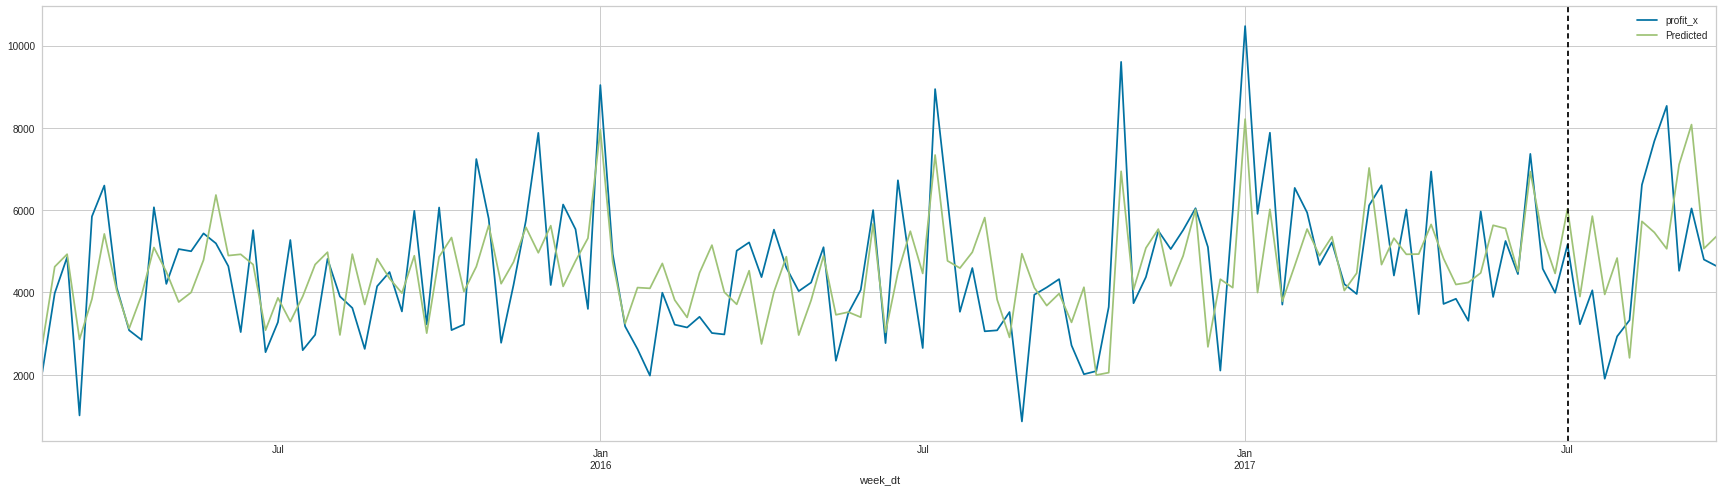

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = cust_2_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

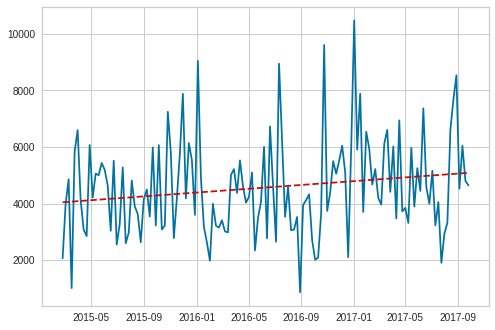

In [ ]:
x = mdates.date2num(df_fc_pred['profit_x'].reset_index()['week_dt'].tolist())
y = df_fc_pred['profit_x'].reset_index()['profit_x'].astype(float).tolist()
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#then the plot
# df_fc_pred.reset_index().plot('week_dt', 'profit_x')
plt.plot(df_fc_pred['profit_x'].reset_index()['week_dt'].tolist(),
         df_fc_pred['profit_x'].reset_index()['profit_x'].astype(float).tolist())
plt.plot(df_fc_pred['profit_x'].reset_index()['week_dt'].tolist(), p(x), "r--")

#type

In [ ]:
profit_summary_type = df.groupby(['order_dt','type','cust_id','order_id']).agg(
                       total_item  = ('qty','sum'),
                       total_price = ('final_price','sum'),
                       total_disc  = ('discount','sum'),
                       total_profit= ('profit','sum')
                   ).reset_index()
profit_summary_type = profit_summary_type[profit_summary_type['order_dt']<'2017-10-01']
profit_summary_type.head(3)

order_dt  type  cust_id  order_id  total_item   total_price   total_disc  \
0 2015-01-01  CASH     1205        18           4   394.4599991 55.499999525   
1 2015-01-01  CASH     1837        12          18 1,196.3800048 103.48999977   
2 2015-01-01  CASH     4791        61           8   617.9199906         22.0   

   total_profit  
0  151.97999955  
1  406.86001021  
2   49.91999817

In [ ]:
profit_summary_type1 =  profit_summary_type.groupby(['order_dt','type']).agg(
                      cust    = ('cust_id','count'),
                      order   = ('order_id','count'),
                      item    = ('total_item','sum'),
                      price   = ('total_price','sum'),
                      disc    = ('total_disc','sum'),
                      profit  = ('total_profit','sum')  
                    ).reset_index()
profit_summary_type1.head(3)

order_dt     type  cust  order  item          price          disc  \
0 2015-01-01     CASH    11     11    76  6,373.6100731 643.689998146   
1 2015-01-01    DEBIT    13     13    86 7,167.26007846 912.699999213   
2 2015-01-01  PAYMENT    18     18   105 8,683.20011537  963.63000076   

             profit  
0     899.309999932  
1   1,035.750012754  
2 912.4800203750001

In [ ]:
seg_freq = profit_summary_type1[profit_summary_type1['order_dt']<'2017-10-01'].groupby('type')['order_dt'].count().reset_index().sort_values(by='order_dt')
seg_freq[seg_freq['order_dt']==1004]

type  order_dt
1     DEBIT      1004
2   PAYMENT      1004
3  TRANSFER      1004

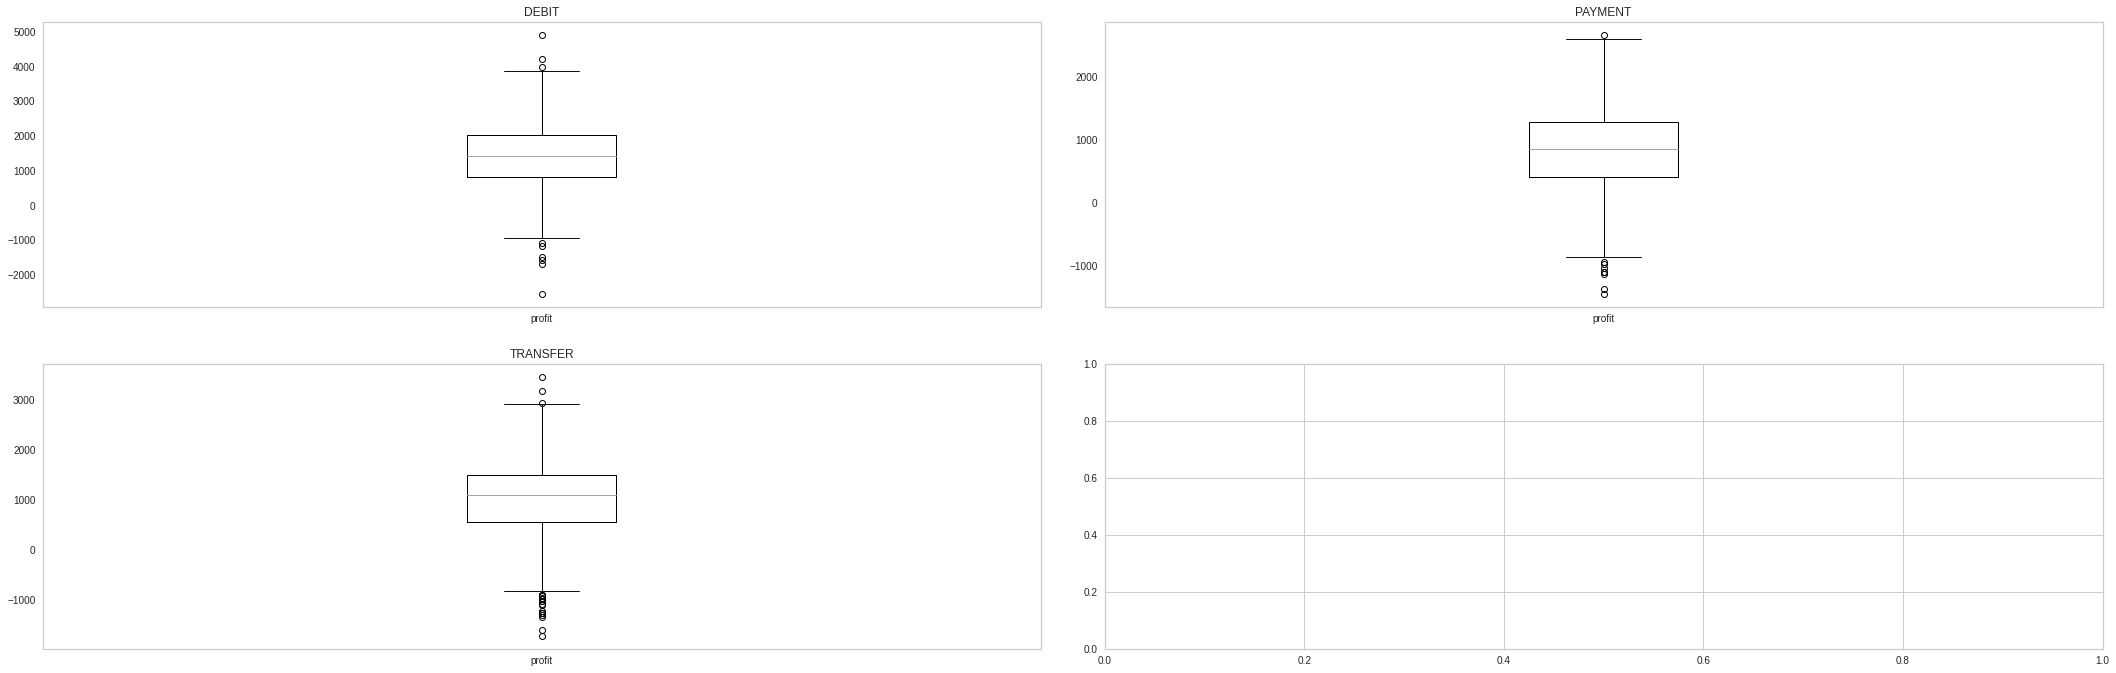

In [ ]:
item = list(seg_freq[seg_freq['order_dt']==1004]['type'])
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(30,10))
fig.tight_layout(pad=3)

for i,j in enumerate(range(0,3)):
    a = profit_summary_type1[profit_summary_type1['type']==item[j]].boxplot(column=['profit'], ax=axes.flatten()[i],grid=False)

    title = list(seg_freq[seg_freq['order_dt']==1004]['type'])[j]
    axes.flatten()[i].set_title(title)

plt.show()

In [ ]:
a = 0
Q1 = profit_summary_type1[profit_summary_type1['type']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_type1[profit_summary_type1['type']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_type1[(profit_summary_type1['type']==item[a])&
                            ((profit_summary_type1['profit']<boxplot_min)|
                             (profit_summary_type1['profit']>boxplot_max))]['item'].count()

print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 1
Q1 = profit_summary_type1[profit_summary_type1['type']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_type1[profit_summary_type1['type']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_type1[(profit_summary_type1['type']==item[a])&
                            ((profit_summary_type1['profit']<boxplot_min)|
                             (profit_summary_type1['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

a = 2
Q1 = profit_summary_type1[profit_summary_type1['type']==item[a]]['profit'].quantile(0.25)
Q3 = profit_summary_type1[profit_summary_type1['type']==item[a]]['profit'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

outliers = profit_summary_type1[(profit_summary_type1['type']==item[a])&
                            ((profit_summary_type1['profit']<boxplot_min)|
                             (profit_summary_type1['profit']>boxplot_max))]['item'].count()

print('\n')
print(item[a])
print('Outliers: ',outliers)
print('Total Data: ',1004)
print('Percent Out: ',str(round(outliers/1004*100,2)),'%')

DEBIT
Outliers:  9
Total Data:  1004
Percent Out:  0.9 %


PAYMENT
Outliers:  9
Total Data:  1004
Percent Out:  0.9 %


TRANSFER
Outliers:  21
Total Data:  1004
Percent Out:  2.09 %


In [ ]:
profit_summary_type1['year'] = profit_summary_type1['order_dt'].dt.year
profit_summary_type1['month'] = profit_summary_type1['order_dt'].dt.month
profit_summary_type1['week'] = profit_summary_type1['order_dt'].dt.week
profit_summary_type1 = profit_summary_type1.reset_index(drop=True)

<ipython-input-729-663e4c126aaf>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  profit_summary_type1['week'] = profit_summary_type1['order_dt'].dt.week


In [ ]:
profit_summary_type1['week_dt'] = profit_summary_type1['year'].astype(str) + profit_summary_type1['week'].astype(str)
profit_summary_type1['week_dt'] = profit_summary_type1['week_dt'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y%W-%w").date())
profit_summary_type1['week_dt'] = profit_summary_type1['week_dt'].apply(lambda x: pd.to_datetime(x))
profit_summary_type1.head(3)

order_dt     type  cust  order  item          price          disc  \
0 2015-01-01     CASH    11     11    76  6,373.6100731 643.689998146   
1 2015-01-01    DEBIT    13     13    86 7,167.26007846 912.699999213   
2 2015-01-01  PAYMENT    18     18   105 8,683.20011537  963.63000076   

             profit  year  month  week    week_dt  
0     899.309999932  2015      1     1 2015-01-05  
1   1,035.750012754  2015      1     1 2015-01-05  
2 912.4800203750001  2015      1     1 2015-01-05

In [ ]:
type_0 = profit_summary_type1[profit_summary_type1['type']==item[0]]
type_1 = profit_summary_type1[profit_summary_type1['type']==item[1]]
type_2 = profit_summary_type1[profit_summary_type1['type']==item[2]]

##type 0

In [ ]:
type_0[type_0['week_dt']>'2017-10-01']

order_dt   type  cust  order  item          price           disc  \
2924 2017-01-01  DEBIT    23     23   184 14,527.3801727 1,630.04000604   

                profit  year  month  week    week_dt  
2924 68.10997879999994  2017      1    52 2017-12-25

In [ ]:
type_0.at[2924,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
type_0_weekly = type_0.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

type_0_weekly_fc = type_0_weekly.sort_values(by = ['week_dt']).copy()
type_0_weekly_fc['dayname'] = type_0_weekly_fc['week_dt'].dt.day_name()
type_0_weekly_fc = pd.get_dummies(type_0_weekly_fc, drop_first = True)
type_0_weekly_fc = type_0_weekly_fc.set_index(['week_dt'])

type_0_weekly_fc['lag1_profit']  = type_0_weekly_fc['profit'].shift(1)
type_0_weekly_fc['lag2_profit']  = type_0_weekly_fc['profit'].shift(2)
type_0_weekly_fc['lag3_profit']  = type_0_weekly_fc['profit'].shift(3)
type_0_weekly_fc['lag4_profit']  = type_0_weekly_fc['profit'].shift(4)
type_0_weekly_fc['lag5_profit']  = type_0_weekly_fc['profit'].shift(5)
type_0_weekly_fc['lag6_profit']  = type_0_weekly_fc['profit'].shift(6)
type_0_weekly_fc['lag7_profit']  = type_0_weekly_fc['profit'].shift(7)
type_0_weekly_fc['lag1_cust']    = type_0_weekly_fc['cust'].shift(1)
type_0_weekly_fc['lag2_cust']    = type_0_weekly_fc['cust'].shift(2)
type_0_weekly_fc['lag3_cust']    = type_0_weekly_fc['cust'].shift(3)
type_0_weekly_fc['lag1_order']   = type_0_weekly_fc['order'].shift(1)
type_0_weekly_fc['lag2_order']   = type_0_weekly_fc['order'].shift(2)
type_0_weekly_fc['lag3_order']   = type_0_weekly_fc['order'].shift(3)
type_0_weekly_fc['lag1_item']    = type_0_weekly_fc['item'].shift(1)
type_0_weekly_fc['lag2_item']    = type_0_weekly_fc['item'].shift(2)
type_0_weekly_fc['lag3_item']    = type_0_weekly_fc['item'].shift(3)
type_0_weekly_fc['lag1_price']   = type_0_weekly_fc['price'].shift(1)
type_0_weekly_fc['lag2_price']   = type_0_weekly_fc['price'].shift(2)
type_0_weekly_fc['lag3_price']   = type_0_weekly_fc['price'].shift(3)
type_0_weekly_fc['lag1_disc']    = type_0_weekly_fc['disc'].shift(1)
type_0_weekly_fc['lag2_disc']    = type_0_weekly_fc['disc'].shift(2)
type_0_weekly_fc['lag3_disc']    = type_0_weekly_fc['disc'].shift(3)

type_0_weekly_fc_mdl = type_0_weekly_fc.copy()
type_0_weekly_fc_mdl = type_0_weekly_fc_mdl[~type_0_weekly_fc_mdl.isna().any(axis=1)]

X = type_0_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = type_0_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.3212607462928886

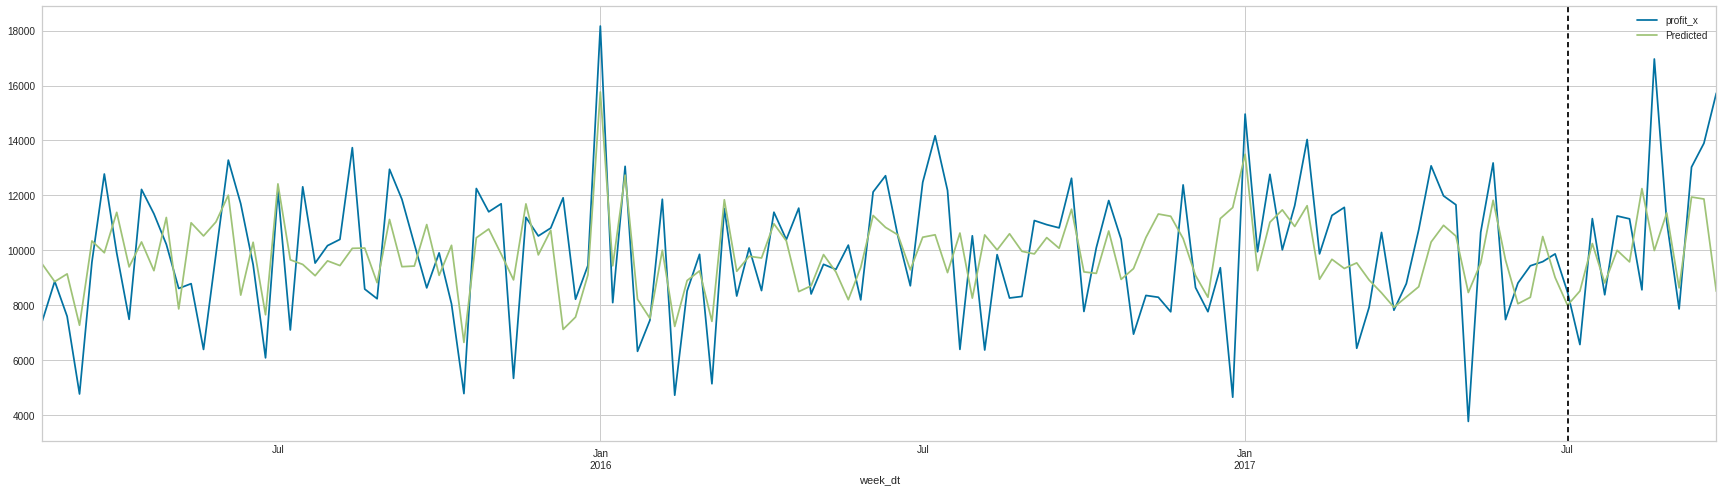

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = type_0_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

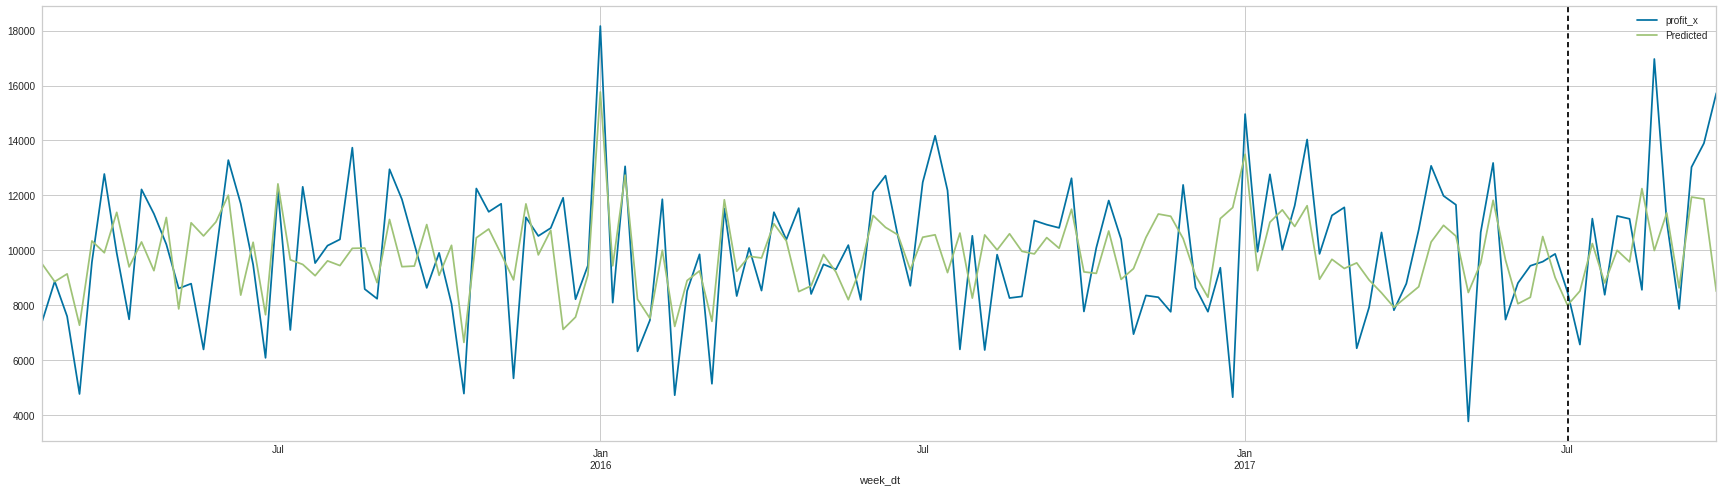

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = type_0_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig



##type 1 - best

In [ ]:
type_1[type_1['week_dt']>'2017-10-01']

order_dt     type  cust  order  item          price          disc  \
2925 2017-01-01  PAYMENT    10     10    65 4,249.25001912 440.159999364   

            profit  year  month  week    week_dt  
2925 640.510010974  2017      1    52 2017-12-25

In [ ]:
type_1.at[2925,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
type_1_weekly = type_1.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

type_1_weekly_fc = type_1_weekly.sort_values(by = ['week_dt']).copy()
type_1_weekly_fc['dayname'] = type_1_weekly_fc['week_dt'].dt.day_name()
type_1_weekly_fc = pd.get_dummies(type_1_weekly_fc, drop_first = True)
type_1_weekly_fc = type_1_weekly_fc.set_index(['week_dt'])

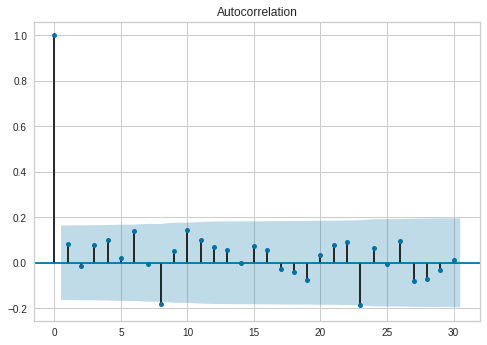

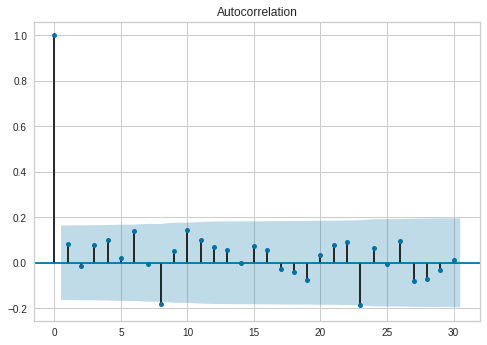

In [ ]:
sm.graphics.tsa.plot_acf(type_1_weekly_fc['profit'], lags = 30)
# sm.graphics.tsa.plot_acf(type_1_weekly_fc['cust'], lags = 30)
# sm.graphics.tsa.plot_acf(type_1_weekly_fc['order'], lags = 30)
# sm.graphics.tsa.plot_acf(type_1_weekly_fc['item'], lags = 30)
# sm.graphics.tsa.plot_acf(type_1_weekly_fc['price'], lags = 30)
# sm.graphics.tsa.plot_acf(type_1_weekly_fc['disc'], lags = 30)
# sm.graphics.tsa.plot_pacf(type_1_weekly_fc['disc'], lags = 30)

In [ ]:
type_1_weekly_fc['lag1_profit']  = type_1_weekly_fc['profit'].shift(1)
type_1_weekly_fc['lag2_profit']  = type_1_weekly_fc['profit'].shift(2)
type_1_weekly_fc['lag3_profit']  = type_1_weekly_fc['profit'].shift(3)
type_1_weekly_fc['lag4_profit']  = type_1_weekly_fc['profit'].shift(4)
type_1_weekly_fc['lag5_profit']  = type_1_weekly_fc['profit'].shift(5)
type_1_weekly_fc['lag6_profit']  = type_1_weekly_fc['profit'].shift(6)
type_1_weekly_fc['lag7_profit']  = type_1_weekly_fc['profit'].shift(7)
type_1_weekly_fc['lag1_cust']    = type_1_weekly_fc['cust'].shift(1)
type_1_weekly_fc['lag2_cust']    = type_1_weekly_fc['cust'].shift(2)
type_1_weekly_fc['lag3_cust']    = type_1_weekly_fc['cust'].shift(3)
type_1_weekly_fc['lag1_order']   = type_1_weekly_fc['order'].shift(1)
type_1_weekly_fc['lag2_order']   = type_1_weekly_fc['order'].shift(2)
type_1_weekly_fc['lag3_order']   = type_1_weekly_fc['order'].shift(3)
type_1_weekly_fc['lag1_item']    = type_1_weekly_fc['item'].shift(1)
type_1_weekly_fc['lag2_item']    = type_1_weekly_fc['item'].shift(2)
type_1_weekly_fc['lag3_item']    = type_1_weekly_fc['item'].shift(3)
type_1_weekly_fc['lag1_price']   = type_1_weekly_fc['price'].shift(1)
type_1_weekly_fc['lag2_price']   = type_1_weekly_fc['price'].shift(2)
type_1_weekly_fc['lag3_price']   = type_1_weekly_fc['price'].shift(3) #12
type_1_weekly_fc['lag1_disc']    = type_1_weekly_fc['disc'].shift(1)
type_1_weekly_fc['lag2_disc']    = type_1_weekly_fc['disc'].shift(2)
type_1_weekly_fc['lag3_disc']    = type_1_weekly_fc['disc'].shift(3)
type_1_weekly_fc['lag4_disc']    = type_1_weekly_fc['disc'].shift(4)

type_1_weekly_fc_mdl = type_1_weekly_fc.copy()
type_1_weekly_fc_mdl = type_1_weekly_fc_mdl[~type_1_weekly_fc_mdl.isna().any(axis=1)]

X = type_1_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = type_1_weekly_fc_mdl[['profit']]

# X = type_1_weekly_fc[['cust', 'order', 'item', 'price', 'disc']]
# y = type_1_weekly_fc[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.3335890970250739

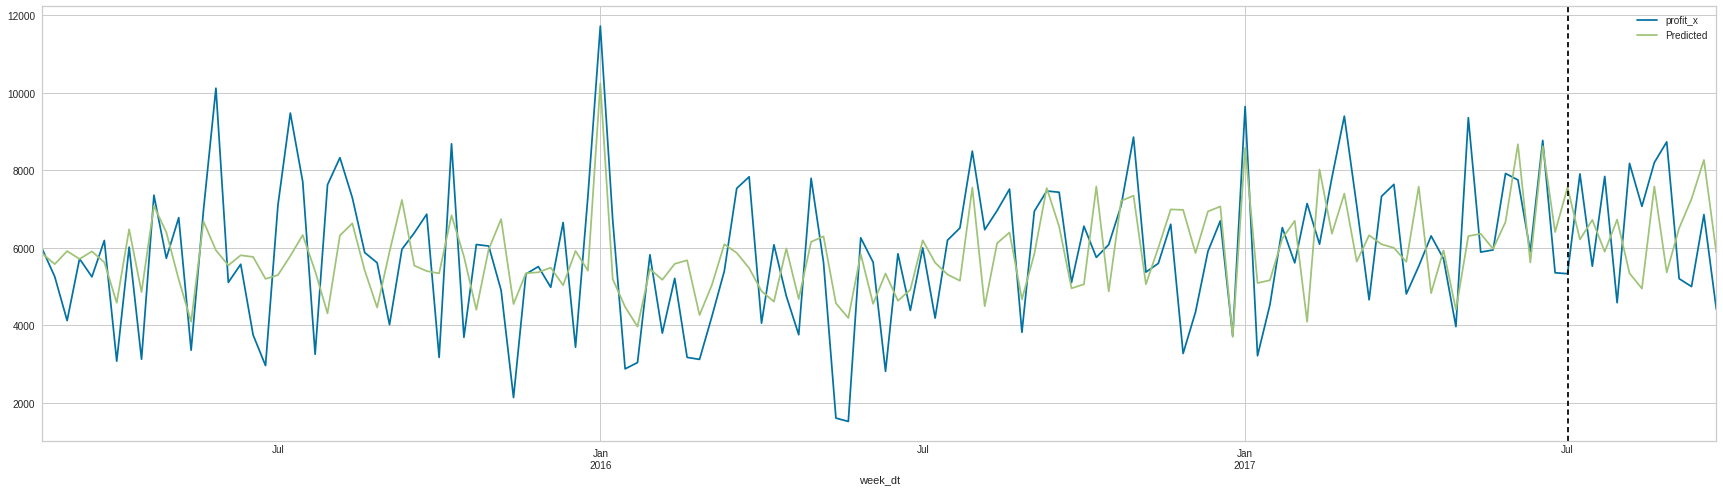

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = type_1_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

In [ ]:
# Mean Absolute Percent Error
print('MAPE: ',str(round(sum(abs(df_fc_pred['profit_x'] - df_fc_pred['Predicted'])/df_fc_pred['profit_x'])/1004*100,2)),'%')
print('MAE : ',str(round(sum(abs(df_fc_pred['profit_x'] - df_fc_pred['Predicted']))/1004,2)))

MAPE:  3.62 %
MAE :  176.91


In [ ]:
# Mean Absolute Percent Error
print('MAPE: ',str(round(sum(abs(df_fc_pred.reset_index()[df_fc_pred.reset_index()['week_dt']>'2017-07-01']['profit_x'] - df_fc_pred.reset_index()[df_fc_pred.reset_index()['week_dt']>'2017-07-01']['Predicted'])/df_fc_pred.reset_index()[df_fc_pred.reset_index()['week_dt']>'2017-07-01']['profit_x'])/1004*100,2)),'%')
print('MAE : ',str(round(sum(abs(df_fc_pred.reset_index()[df_fc_pred.reset_index()['week_dt']>'2017-07-01']['profit_x'] - df_fc_pred.reset_index()[df_fc_pred.reset_index()['week_dt']>'2017-07-01']['Predicted']))/1004,2)))

MAPE:  0.39 %
MAE :  24.49


##type 2

In [ ]:
type_2[type_2['week_dt']>'2017-10-01']

order_dt      type  cust  order  item         price          disc  \
2926 2017-01-01  TRANSFER    10     10    64 5,298.5100671 620.840000624   

             profit  year  month  week    week_dt  
2926 1,126.29000083  2017      1    52 2017-12-25

In [ ]:
type_2.at[2926,'week_dt'] = pd.to_datetime('2016-12-26')

In [ ]:
type_2_weekly = type_2.groupby('week_dt')[['cust','order','item','price','disc','profit']].sum().reset_index()

type_2_weekly_fc = type_2_weekly.sort_values(by = ['week_dt']).copy()
type_2_weekly_fc['dayname'] = type_2_weekly_fc['week_dt'].dt.day_name()
type_2_weekly_fc = pd.get_dummies(type_2_weekly_fc, drop_first = True)
type_2_weekly_fc = type_2_weekly_fc.set_index(['week_dt'])

type_2_weekly_fc['lag1_profit']  = type_2_weekly_fc['profit'].shift(1)
type_2_weekly_fc['lag2_profit']  = type_2_weekly_fc['profit'].shift(2)
type_2_weekly_fc['lag3_profit']  = type_2_weekly_fc['profit'].shift(3)
type_2_weekly_fc['lag4_profit']  = type_2_weekly_fc['profit'].shift(4)
type_2_weekly_fc['lag5_profit']  = type_2_weekly_fc['profit'].shift(5)
type_2_weekly_fc['lag6_profit']  = type_2_weekly_fc['profit'].shift(6)
type_2_weekly_fc['lag7_profit']  = type_2_weekly_fc['profit'].shift(7)
type_2_weekly_fc['lag1_cust']    = type_2_weekly_fc['cust'].shift(1)
type_2_weekly_fc['lag2_cust']    = type_2_weekly_fc['cust'].shift(2)
type_2_weekly_fc['lag3_cust']    = type_2_weekly_fc['cust'].shift(3)
type_2_weekly_fc['lag1_order']   = type_2_weekly_fc['order'].shift(1)
type_2_weekly_fc['lag2_order']   = type_2_weekly_fc['order'].shift(2)
type_2_weekly_fc['lag3_order']   = type_2_weekly_fc['order'].shift(3)
type_2_weekly_fc['lag1_item']    = type_2_weekly_fc['item'].shift(1)
type_2_weekly_fc['lag2_item']    = type_2_weekly_fc['item'].shift(2)
type_2_weekly_fc['lag3_item']    = type_2_weekly_fc['item'].shift(3)
type_2_weekly_fc['lag1_price']   = type_2_weekly_fc['price'].shift(1)
type_2_weekly_fc['lag2_price']   = type_2_weekly_fc['price'].shift(2)
type_2_weekly_fc['lag3_price']   = type_2_weekly_fc['price'].shift(3)
type_2_weekly_fc['lag1_disc']    = type_2_weekly_fc['disc'].shift(1)
type_2_weekly_fc['lag2_disc']    = type_2_weekly_fc['disc'].shift(2)
type_2_weekly_fc['lag3_disc']    = type_2_weekly_fc['disc'].shift(3)

type_2_weekly_fc_mdl = type_2_weekly_fc.copy()
type_2_weekly_fc_mdl = type_2_weekly_fc_mdl[~type_2_weekly_fc_mdl.isna().any(axis=1)]

X = type_2_weekly_fc_mdl[['cust', 'order', 'item', 'price', 'disc', 'lag1_profit',
       'lag2_profit', 'lag3_profit', 'lag4_profit', 'lag5_profit',
       'lag6_profit', 'lag7_profit', 'lag1_cust', 'lag2_cust', 'lag3_cust',
       'lag1_order', 'lag2_order', 'lag3_order', 'lag1_item', 'lag2_item',
       'lag3_item', 'lag1_price', 'lag2_price', 'lag3_price', 'lag1_disc',
       'lag2_disc', 'lag3_disc']]
y = type_2_weekly_fc_mdl[['profit']]

X_train = X[X.index < '2017-07-01']
X_test = X[X.index >= '2017-07-01']

y_train = y[y.index < '2017-07-01']
y_test = y[y.index >= '2017-07-01']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.2726698617116

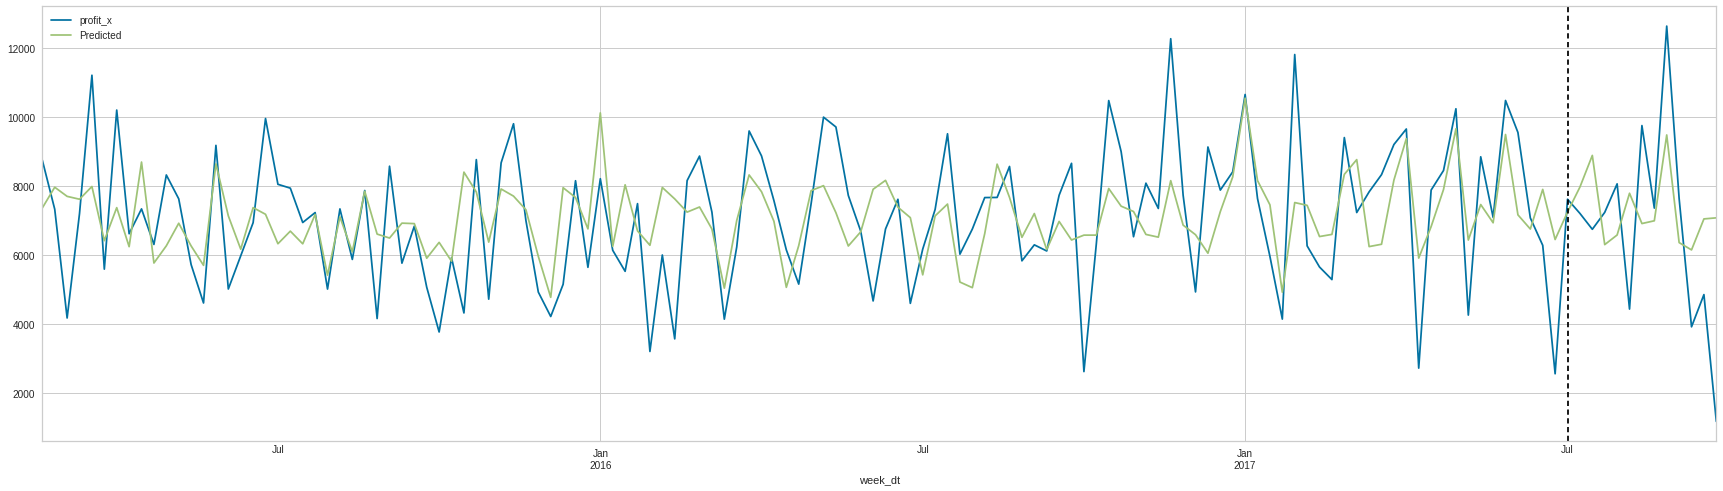

In [ ]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = type_2_weekly_fc_mdl.merge(df_prediction, how='left', left_index = True, right_index = True)

fig = df_fc_pred[['profit_x','Predicted']].plot(kind = 'line', figsize = (30,8))
fig.axvline(x = '2017-07-01',color = 'black', dashes = (3,2))
fig

#Fraud + Late Prediction

##Decision Tree

In [ ]:
from sklearn import cluster
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import warnings
import matplotlib
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score

#Hiding the warnings
warnings.filterwarnings('ignore')

In [ ]:
df_ori.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0              91.25         314.6400146  Advance shipping   
1       -249.0899963         311.3599854     Late delivery   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   

   Customer Zipcode  Department Id Department Name    Latitude    Longitude  \
0             725.0              2         Fitness  18.2514534 -66.03705597   
1             725.0              2         Fitness 18.27945137  -66.0370636   

         Market Order City Order Country  Order Customer Id  \
0  Pacific Asia     Bekasi     Indonesia              20755   
1  Pacific Asia    Bikaner         India              19492   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0           1/31/18 22:56     77202                    1360   
1           1/13/18 12:27     75939                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0          13.10999966               0.039999999         180517   
1          16.38999939               0.050000001         179254   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75              0.289999992                    1   
1                    327.75             -0.800000012                    1   

   Sales  Order Item Total  Order Profit Per Order    Order Region  \
0 327.75       314.6400146                   91.25  Southeast Asia   
1 327.75       311.3599854            -249.0899963      South Asia   

       Order State Order Status  Order Zipcode  Product Card Id  \
0  Java Occidental     COMPLETE            NaN             1360   
1         Rajastán      PENDING            NaN             1360   

   Product Category Id  Product Description  \
0                   73                  NaN   
1                   73                  NaN   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

   Product Status shipping date (DateOrders)   Shipping Mode  
0               0               2/3/18 22:56  Standard Class  
1               0              1/18/18 12:27  Standard Class

In [ ]:
data = df_ori.copy()

data['fraud'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
data['late_delivery']=np.where(data['Delivery Status'] == 'Late delivery', 1, 0)
data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_week_day'] = data['order date (DateOrders)'].apply(lambda x: pd.to_datetime(x.split(' ')[0])).dt.dayofweek
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')
data['Customer Full Name'] = data['Customer Fname']+data['Customer Lname']
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)

data.drop(['Days for shipping (real)','Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname','Latitude','Longitude',
                 'Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1,inplace=True)

In [ ]:
data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

In [ ]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)

In [ ]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
data['Customer Country']  = le.fit_transform(data['Customer Country'])
data['Market']            = le.fit_transform(data['Market'])
data['Type']              = le.fit_transform(data['Type'])
data['Product Name']      = le.fit_transform(data['Product Name'])
data['Customer Segment']  = le.fit_transform(data['Customer Segment'])
data['Customer State']    = le.fit_transform(data['Customer State'])
data['Order Region']      = le.fit_transform(data['Order Region'])
data['Order City']        = le.fit_transform(data['Order City'])
data['Category Name']     = le.fit_transform(data['Category Name'])
data['Customer City']     = le.fit_transform(data['Customer City'])
data['Department Name']   = le.fit_transform(data['Department Name'])
data['Order State']       = le.fit_transform(data['Order State'])
data['Shipping Mode']     = le.fit_transform(data['Shipping Mode'])
data['order_week_day']    = le.fit_transform(data['order_week_day'])
data['Order Country']     = le.fit_transform(data['Order Country'])
data['Customer Full Name']= le.fit_transform(data['Customer Full Name'])

In [ ]:
xfraud=data.loc[:, data.columns != 'fraud']
yfraud=data['fraud']
xfraud_train, xfraud_test,yfraud_train,yfraud_test = train_test_split(xfraud,yfraud,test_size = 0.2,random_state = 42)

xlate=data.loc[:, data.columns != 'late_delivery']
ylate=data['late_delivery']
xlate_train, xlate_test,ylate_train,ylate_test = train_test_split(xlate,ylate,test_size = 0.2, random_state = 42)

In [ ]:
sc = StandardScaler()
xfraud_train=sc.fit_transform(xfraud_train)
xfraud_test=sc.transform(xfraud_test)
xlate_train=sc.fit_transform(xlate_train)
xlate_test=sc.transform(xlate_test)

In [ ]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    model_l=model_l.fit(xl_train,yl_train) # Fitting train data for predection of late delivery
    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)  
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

In [ ]:
model_fraud = tree.DecisionTreeClassifier()
model_late = tree.DecisionTreeClassifier()
classifiermodel(model_fraud,model_late,xfraud_train, xfraud_test,yfraud_train,yfraud_test,xlate_train, xlate_test,ylate_train,ylate_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is        : 98.88101041435851 %
Recall score of fraud status is        : 75.87006960556845 %
Conf Matrix of fraud status is        :
 [[35046   208]
 [  196   654]]
F1 score of fraud status is        : 76.4018691588785 %
Accuracy of late delivery status is: 83.83835586084645 %
Recall score of late delivery status is: 85.07687669580946 %
Conf Matrix of late delivery status is: 
 [[13337  2970]
 [ 2865 16932]]
F1 score of late delivery status is: 85.30189677321846 %


In [ ]:
important_col=model_fraud.feature_importances_.argsort()
fraud_comp=pd.DataFrame({'Variables':xfraud.columns[important_col],'importance':model_fraud.feature_importances_[important_col]})
fraud_comp=fraud_comp.sort_values(by='importance',ascending=False)
fraud_comp

Variables            importance
41             Customer Full Name   0.08965305767867697
40                  late_delivery     0.078275883625897
39                     Order City   0.07410716402668667
38                           Type   0.05976496881630705
37                    Order State    0.0553469379572345
36                  Customer City   0.05386937764679457
35                  Shipping Mode   0.05380683798419585
34                     order_hour   0.05090930861197075
33              Order Customer Id  0.049908712363056815
32                    Customer Id  0.049372699888958906
31                  Order Item Id   0.04840652913738083
30               Customer Zipcode   0.04455113792797851
29                  Order Country   0.03915116891837068
28                       Order Id  0.035473827192804716
27                 order_week_day  0.030537589833169027
26                    order_month  0.026312252144441977
25                 Customer State    0.0254058240739945
24                   Order Region  0.016476873365704355
23               Customer Segment  0.011818512029171085
22                         Market  0.010678692974526744
21             Sales per customer  0.009998537643804593
20        Order Item Profit Ratio  0.009608467284600164
19            Order Item Discount  0.008308814046422693
18       Order Item Discount Rate  0.006976536690166103
17         Order Profit Per Order  0.006510289697550785
16               Order Item Total 0.0062116312228072635
15                  Category Name  0.005421564678588293
14                   Product Name  0.005155776337177387
13              Benefit per order  0.005011503680525978
12               Customer Country  0.004224536703591823
11                    Category Id 0.0033498235557105024
10                Department Name  0.003194160450084734
9                           Sales 0.0028967815007213764
8                      order_year 0.0028248604636063753
7             Product Category Id 0.0026016769855542266
6   Days for shipment (scheduled)   0.00254553268328774
5        Order Item Product Price  0.002435418142667639
4             Order Item Quantity 0.0023125290610808125
3                 Product Card Id  0.002183988093564138
2                   Product Price  0.002061544599936686
1                   Department Id 0.0012729813204456289
0          Order Item Cardprod Id  0.001065688960783334

In [ ]:
important_col=model_late.feature_importances_.argsort()
late_comp=pd.DataFrame({'features':xlate.columns[important_col],'importance':model_late.feature_importances_[important_col]})
late_comp=late_comp.sort_values(by='importance',ascending=False)
late_comp

features            importance
41                  Shipping Mode    0.1691650891635267
40                     order_hour   0.09552132078147033
39             Customer Full Name    0.0691222857624951
38                     Order City   0.05662663743521656
37                    Order State   0.04994837976481992
36  Days for shipment (scheduled)   0.04201486541708267
35                    Customer Id  0.040454698133785404
34                  Customer City   0.03909279980072066
33              Order Customer Id  0.038312032448331236
32               Customer Zipcode  0.037874475071420124
31                       Order Id   0.03665942205815594
30                  Order Item Id  0.034618593858790944
29                          fraud  0.033117741395525646
28                  Order Country  0.028853433474393772
27                 order_week_day  0.026381588777098557
26                    order_month  0.022673156814578384
25                   Order Region  0.019094955453025014
24                 Customer State  0.018658770607476827
23        Order Item Profit Ratio  0.013270496871251975
22               Customer Segment  0.011435353318753052
21            Order Item Discount  0.011311777226814191
20         Order Profit Per Order  0.011144420495811484
19                           Type   0.01105834779559251
18              Benefit per order  0.010061665538127752
17       Order Item Discount Rate  0.008987097965238524
16               Order Item Total  0.008330049111502086
15             Sales per customer  0.007840331980195587
14                         Market  0.007102790487727381
13                   Product Name  0.006408961304419267
12                  Category Name  0.005677168551620024
11                          Sales  0.004261657834305641
10                  Product Price  0.003006587143201995
9             Product Category Id 0.0026282069859066893
8        Order Item Product Price 0.0025560535484634157
7                     Category Id 0.0025382071164461407
6                 Department Name 0.0024666325086149486
5          Order Item Cardprod Id 0.0023937004942893073
4             Order Item Quantity 0.0023873017774998996
3                 Product Card Id 0.0023540674669060655
2                   Department Id 0.0016532970901869297
1                      order_year 0.0015514152618759255
0                Customer Country 0.0013841659073353016

In [ ]:
df_ori.head()
ppt = df_ori.groupby(['order date (DateOrders)','Customer Id','Delivery Status'])['Order Id'].count().reset_index()
ppt.head()

order date (DateOrders)  Customer Id   Delivery Status  Order Id
0             1/1/15 0:00        11599  Advance shipping         1
1             1/1/15 0:21          256  Advance shipping         3
2            1/1/15 10:09        10039     Late delivery         1
3            1/1/15 10:30         6983  Advance shipping         1
4            1/1/15 11:12         5793     Late delivery         4

In [ ]:
ppt['date']  = ppt['order date (DateOrders)'].apply(lambda x: pd.to_datetime(x.split(' ')[0]))
ppt.head(2)

order date (DateOrders)  Customer Id   Delivery Status  Order Id       date
0             1/1/15 0:00        11599  Advance shipping         1 2015-01-01
1             1/1/15 0:21          256  Advance shipping         3 2015-01-01

In [ ]:
ppt1 = ppt.groupby(['date','Delivery Status'])['Order Id'].sum().reset_index()
ppt1.head(2)

date   Delivery Status  Order Id
0 2015-01-01  Advance shipping        44
1 2015-01-01     Late delivery        91

In [ ]:
ppt1['month'] = ppt1['date'].dt.to_period('M').dt.to_timestamp()

In [ ]:
ppt1.head()

date    Delivery Status  Order Id      month
0 2015-01-01   Advance shipping        44 2015-01-01
1 2015-01-01      Late delivery        91 2015-01-01
2 2015-01-01  Shipping canceled         3 2015-01-01
3 2015-01-01   Shipping on time        30 2015-01-01
4 2015-01-02   Advance shipping        51 2015-01-01

In [ ]:
ppt1.groupby(['month'])['Order Id'].sum().reset_index

<bound method Series.reset_index of month
2015-01-01    5322
2015-02-01    4729
2015-03-01    5362
2015-04-01    5126
2015-05-01    5357
2015-06-01    5134
2015-07-01    5299
2015-08-01    5273
2015-09-01    5140
2015-10-01    5302
2015-11-01    5235
2015-12-01    5371
2016-01-01    5317
2016-02-01    4894
2016-03-01    5210
2016-04-01    5097
2016-05-01    5302
2016-06-01    5054
2016-07-01    5305
2016-08-01    5334
2016-09-01    5160
2016-10-01    5398
2016-11-01    5210
2016-12-01    5269
2017-01-01    5217
2017-02-01    4906
2017-03-01    5347
2017-04-01    5212
2017-05-01    5317
2017-06-01    4951
2017-07-01    5318
2017-08-01    5305
2017-09-01    5189
2017-10-01    2255
2017-11-01    2055
2017-12-01    2124
2018-01-01    2123
Name: Order Id, dtype: int64>

In [ ]:
ppt1[ppt1['Delivery Status']=='Late delivery'].groupby(['month'])['Order Id'].sum().reset_index

<bound method Series.reset_index of month
2015-01-01    2880
2015-02-01    2594
2015-03-01    2936
2015-04-01    2760
2015-05-01    2951
2015-06-01    2778
2015-07-01    2939
2015-08-01    2936
2015-09-01    2914
2015-10-01    2906
2015-11-01    2841
2015-12-01    2937
2016-01-01    2955
2016-02-01    2650
2016-03-01    2905
2016-04-01    2815
2016-05-01    2951
2016-06-01    2873
2016-07-01    2755
2016-08-01    2948
2016-09-01    2837
2016-10-01    2957
2016-11-01    2846
2016-12-01    2954
2017-01-01    2797
2017-02-01    2682
2017-03-01    2955
2017-04-01    2803
2017-05-01    2843
2017-06-01    2649
2017-07-01    2913
2017-08-01    2994
2017-09-01    2814
2017-10-01    1210
2017-11-01    1132
2017-12-01    1172
2018-01-01    1195
Name: Order Id, dtype: int64>

In [ ]:
4062/180519

0.02250178651554684